## Automating Regional Briefings
Author: Smitha Mahesh, Eric Englin, Sophie Son

Purpose: To complete the analyses and visualizations required for the region-level briefings. 

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import docx

In [19]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\DOT OST\volpe-proj-VU16A100 - Transportation Safety Program\Region Briefing"
os.chdir(myworkingdirectory)

In [20]:
analysis_2022 = pd.read_csv(".//Data//Output Data//analysis_database_2022.csv")

In [21]:
park_info = pd.read_csv(".//Data//Reference Data/Park_Info_Table.csv")
park_info = park_info.rename(columns={'UNIT_CODE':'Park','REGION':'RGN'})

In [22]:
#analysis_2022.columns

## Available Data Fields

In [23]:
#analysis_2022.database.value_counts()

In [24]:
safety_studies = pd.read_excel(".//Safety Studies//NPS_TSP_Safety_Study_Catalog_2010-2020.xlsx",  "Safety Studies 2010-2020 ")
safety_studies['RGN'] = safety_studies['Legacy Region Abbreviation']
safety_studies['INCID_NO']=1

In [25]:
safety_analyst_parks = pd.read_excel(".//Data//Safety Analyst//Safety Analyst Parks.xlsx")
safety_analyst_parks['Safety Analyst Park']=1

In [26]:
analysis_2022_merge = analysis_2022.merge(safety_analyst_parks, on="Park", how = "left")

In [27]:
analysis_2022_merge.shape, analysis_2022.shape

((206111, 55), (206111, 53))

### Table 1: Overview of Data Sources

In [28]:
def pull_source_table_data(df, region, field, filter_value):
    df = df.loc[df['RGN']==region]
    df = df.loc[df[field]==filter_value]
    parks, crashes = df.groupby("Park").agg({
        'INCID_NO':'count',
    }).reset_index().agg({
        "Park":"count",
        'INCID_NO':sum,
    })
    
    parks = str(parks) + " Park Units"
    crashes = "{:,}".format(crashes) + " Crash Reports"
    
    return parks, crashes

def make_source_table(region):
    CDS_parks, CDS_crash_reports = pull_source_table_data(analysis_2022_merge, region, 'database', 'CDS')
    IMARS_parks, IMARS_crash_reports = pull_source_table_data(analysis_2022_merge, region, 'database', 'IMARS')
    SA_parks, SA_crash_reports = pull_source_table_data(analysis_2022_merge, region, 'Safety Analyst Park', 1)
    SS_parks, SS_crash_reports = pull_source_table_data(safety_studies, region, 'INCID_NO', 1)
    source_list = []
    parks_list = [CDS_parks, IMARS_parks, SA_parks, SS_parks]
    crash_reports_list = [CDS_crash_reports, IMARS_crash_reports, SA_crash_reports, SS_crash_reports]

    final_df = pd.DataFrame({
        "Source":["Crash Data System (CDS)", 
                  "Incident Management Analysis and Reporting System (IMARS)",
                  'Safety Analyst', "Safety Studies"],
        "Locations": parks_list,
        'Years': ["1989-2013", "2012-present", "2005-2014", "2010-present"],
        "Quantity of Data": crash_reports_list
    })
    
    return final_df

## Data Quality Tables

### CDS

In [29]:
#cds_crash = pd.read_excel('./Data/New CDS/New CDS Excel Files/ALL_CRASH.xlsx')
#cds_crash = cds_crash.rename(columns={'PARK_ALPHA' : 'Park'})

In [30]:
## add RGN column from lookup table to CDS crash database, joining the two datasets based on park name
#cds_crash = pd.merge(cds_crash, park_info[['RGN','Park']], how='left', on='Park')
## resulting dataframe after join should have one additional column and no additional rows
#cds_crash = cds_crash.drop_duplicates() 
#cds_crash.shape

In [31]:
#cds_crash.columns

In [32]:
#cds_unit = pd.read_excel('./Data/New CDS/New CDS Excel Files/ALL_UNIT.xlsx')

In [33]:
#cds_unit.columns

In [34]:
#cds_unit = cds_unit.merge(cds_crash[['INCID_NO','Park','RGN']], on = 'INCID_NO', how = 'left')

In [35]:
#cds_df_crash to find lat/long
#cds_df_unit to find speed

In [36]:
#def make_data_quality_table_cds(region):
#    not_linked_table = pd.DataFrame({
#        "Area":["National", "NCR", "IMR",'SER','PWR','NER','MWR','AKR'],
#        'Total': [203909, 97838, 33076,27262, 24419,18642, 2435, 237], 
#        "Unlinked": [9602, 7988, 183, 1221, 117, 73,19, 1]
#    })
#    not_linked_table["Unlinked Percent"]=round(not_linked_table["Unlinked"]/not_linked_table['Total']*100,2)
#    
#    df = not_linked_table.loc[(not_linked_table['Area']=="National")|(not_linked_table['Area']==region)]
#    
#    cds_crash_region = cds_crash.loc[cds_crash['RGN']==region[:2]]
#    
#    df['Missing coordinates'] = (len(cds_crash.loc[cds_crash['LATITUDE'].isnull()==True]),
#                                len(cds_crash_region.loc[cds_crash_region['LATITUDE'].isnull()==True]))
#    
#    cds_unit_region = cds_unit.loc[cds_unit['RGN']==region[:2]]
#    df['Missing speed'] = (len(cds_unit.loc[(cds_unit['SPEED_LIMIT'].isnull()==True)|(cds_unit['SPEED_LIMIT']==99)]),
#                                len(cds_unit_region.loc[(cds_unit_region['SPEED_LIMIT'].isnull()==True)|(cds_unit_region['SPEED_LIMIT']==99)]))
#    
#    no_ConFact1 = cds_crash.loc[cds_crash['CON_FACT1'].isnull()==True]
#    no_ConFact1_2 = no_ConFact1.loc[no_ConFact1['CON_FACT2'].isnull()==True]
#    no_ConFact1_3 = no_ConFact1_2.loc[no_ConFact1_2['CON_FACT3'].isnull()==True]
#    no_ConFact1_4 = no_ConFact1_3.loc[no_ConFact1_3['CON_FACT4'].isnull()==True]
#    no_ConFact1_5 = no_ConFact1_4.loc[no_ConFact1_4['CON_FACT5'].isnull()==True]
#    no_ConFact_any = no_ConFact1_5.loc[no_ConFact1_5['CON_FACT6'].isnull()==True]
#    
#    no_ConFact_any_region = no_ConFact_any.loc[no_ConFact_any['RGN']==region[:2]]
#    df['Missing contributing factors']= (len(no_ConFact_any),
#                                len(no_ConFact_any_region))
#    
#    return df

In [37]:
#make_data_quality_table_cds("NCR")

### IMARS

In [38]:
#imars_crash = pd.read_excel("./Data/New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Location")
#imars_passenger = pd.read_excel("./Data/New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Person")
#imars_vehicle = pd.read_excel("./Data/New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Vehicle")
#imars_crash_details = pd.read_excel("./Data/New IMARS/IMARS 2012 - 2021.xlsx", sheet_name = "Classification")

In [39]:
#imars_vehicle = imars_vehicle.merge(imars_crash[['IMARS_Record_No','Park','Region']], on = 'IMARS_Record_No', how = 'left')

In [40]:
#imars_crash.head()

In [41]:
#imars_vehicle.columns

In [42]:
#imars_vehicle.Posted_Speed.value_counts().sort_index()[-2:]

In [43]:
#len(imars_vehicle.loc[imars_vehicle['Posted_Speed']=="98. Not posted"])+\
#len(imars_vehicle.loc[imars_vehicle['Posted_Speed']=="99. Unknown"])+\
#len(imars_vehicle.loc[imars_vehicle['Posted_Speed'].isnull()])


In [44]:
#imars_crash.Region.value_counts()

In [45]:
#def make_data_quality_table_imars(region):
#    not_linked_table = pd.DataFrame({
#        "Area":["National", "NCR", "IMR",'SER','PWR','NER','MWR','AKR'],
#        'Total': [12790,3541,2656,2642,2293,1206,372,80], 
#        "Unlinked": [986,213,267,210,201,72,19,4]
#    })
#    not_linked_table["Unlinked Percent"]=round(not_linked_table["Unlinked"]/not_linked_table['Total']*100,2)
    
    
#    df = not_linked_table.loc[(not_linked_table['Area']=="National")|(not_linked_table['Area']==region)]
    
#    imars_crash_region = imars_crash.loc[imars_crash['Region']==region]
    
##    df['Total_2'] = (len(imars_crash),
##                            len(imars_crash_region)) #there is a problem with the totals

    
#    df['Missing coordinates'] = (len(imars_crash.loc[imars_crash['Latitude'].isnull()==True]),
#                                len(imars_crash_region.loc[imars_crash_region['Latitude'].isnull()==True]))
    
#    df['Missing coordinates percent'] = (round(len(imars_crash.loc[imars_crash['Latitude'].isnull()==True])/len(imars_crash),2)*100,
#                            round(len(imars_crash_region.loc[imars_crash_region['Latitude'].isnull()==True])/len(imars_crash_region),2)*100)


#   imars_vehicle_region = imars_vehicle.loc[imars_vehicle['Region']==region]

#    national_missing_speed = (len(imars_vehicle.loc[imars_vehicle['Posted_Speed']=="98. Not posted"])+\
#    len(imars_vehicle.loc[imars_vehicle['Posted_Speed']=="99. Unknown"])+\
#    len(imars_vehicle.loc[imars_vehicle['Posted_Speed'].isnull()]))

#    regional_missing_speed = (len(imars_vehicle_region.loc[imars_vehicle_region['Posted_Speed']=="98. Not posted"])+\
#    len(imars_vehicle_region.loc[imars_vehicle_region['Posted_Speed']=="99. Unknown"])+\
#    len(imars_vehicle_region.loc[imars_vehicle_region['Posted_Speed'].isnull()]))


#    df['Missing speed'] = (national_missing_speed, regional_missing_speed)    

#    return df

In [46]:
#len(imars_crash.loc[imars_crash['Latitude'].isnull()==True]), len(imars_crash)

In [47]:
#make_data_quality_table_imars("NCR")

## Yearly count of crashes by database

In [48]:
#analysis_2022.columns

### Figures 1 and 2. Annual Regional Serious Injuries/Fatalities by Data System and Georeference Quality

In [49]:
def make_yearly_crash_fig(region):
    df = analysis_2022.loc[analysis_2022['RGN']==region]
    df['ones'] = 1
    df_year_origin=df.groupby(['database', "CRASH_YEAR"]).sum()
    df_year_origin=df_year_origin.reset_index()
    df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']<2022]
    df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']>1988]

    df_year_origin_coords = df.loc[df['LATITUDE'].notnull()]
    df_year_origin_coords = df_year_origin_coords.groupby(['database', "CRASH_YEAR"]).sum()
    df_year_origin_coords=df_year_origin_coords.reset_index()
    df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']<2022]
    df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']>1988]
    
    cds_year = df_year_origin.loc[df_year_origin['database']=='CDS']
    imars_year = df_year_origin.loc[df_year_origin['database']=='IMARS']
    cds_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='CDS']
    imars_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='IMARS']
    
    plt.style.use('seaborn')
    tick_spacing = 2 
    sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
    fig,ax = plt.subplots(1,1, figsize=(14, 7))

    ax.set_title('Annual Regional Serious Injuries by Data System and Georeference Quality', fontsize=20)
    ax.fill_between(cds_year["CRASH_YEAR"], cds_year['Incapacitating Injury'], label = 'CDS', 
       hatch = ".", facecolor = "steelblue")
    ax.fill_between(cds_year_coords["CRASH_YEAR"], cds_year_coords['Incapacitating Injury'], label = 'CDS with lat/long coordinates', 
       hatch = 'x', facecolor = "skyblue")
    ax.fill_between(imars_year["CRASH_YEAR"], imars_year['Incapacitating Injury'], label = 'IMARS', 
       hatch = "/", facecolor = "orangered")
    ax.fill_between(imars_year_coords["CRASH_YEAR"], imars_year_coords['Incapacitating Injury'], label = 'IMARS with lat/long coordinates', 
        hatch = "+", facecolor = "darksalmon")
    
    legend = plt.legend(frameon = 2,fontsize=20)
    frame = legend.get_frame()
    frame.set_color('white')
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.xlim([1990,2021])
    #ymax = round(max(cds_year['Incapacitating Injury']),-3)
    #plt.ylim([0,ymax])
    #ax.set_yticks([0,100,200,300,400,500,600,700])
    ax.grid('off')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
    ax.tick_params(axis='y', which='major', labelsize=23)
    ax.tick_params(axis='both', which='minor', labelsize=23)
    ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 1, color = "grey")
    ax.set_xlabel("Year", fontsize=26)
    ax.set_ylabel("Number of Serious Injuries", fontsize=26)
    
    doc_name = './22-23\Drafted Deliverables\Figures/Yearly injury/' + region + ".png"
    
    plt.savefig(doc_name)

    plt.style.use('seaborn')
    tick_spacing = 2 
    sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
    fig,ax = plt.subplots(1,1, figsize=(14, 7))

    ax.set_title('Annual Regional Fatalities by Data System and Georeference Quality', fontsize=20)
    ax.fill_between(cds_year["CRASH_YEAR"], cds_year['Num_Fatalities'], label = 'CDS', 
       hatch = ".", facecolor = "steelblue")
    ax.fill_between(cds_year_coords["CRASH_YEAR"], cds_year_coords['Num_Fatalities'], label = 'CDS with lat/long coordinates', 
       hatch = 'x', facecolor = "skyblue")
    ax.fill_between(imars_year["CRASH_YEAR"], imars_year['Num_Fatalities'], label = 'IMARS', 
       hatch = "/", facecolor = "orangered")
    ax.fill_between(imars_year_coords["CRASH_YEAR"], imars_year_coords['Num_Fatalities'], label = 'IMARS with lat/long coordinates', 
        hatch = "+", facecolor = "darksalmon")

    legend = plt.legend(frameon = 2,fontsize=20)
    frame = legend.get_frame()
    frame.set_color('white')
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.xlim([1990,2021])
    #ymax = round(max(cds_year['Num_Fatalities']),-1)
    #plt.ylim([0,ymax])
    #ax.set_yticks([0,10,20,30,40,50,60,70,80])
    ax.grid('off')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
    ax.tick_params(axis='y', which='major', labelsize=23)
    ax.tick_params(axis='both', which='minor', labelsize=23)
    ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 1, color = "grey")
    ax.set_xlabel("Year", fontsize=26)
    ax.set_ylabel("Number of Fatalities", fontsize=26)
    
    doc_name = './22-23\Drafted Deliverables\Figures/Yearly fatality/' + region + ".png"
    plt.savefig(doc_name)
    

<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


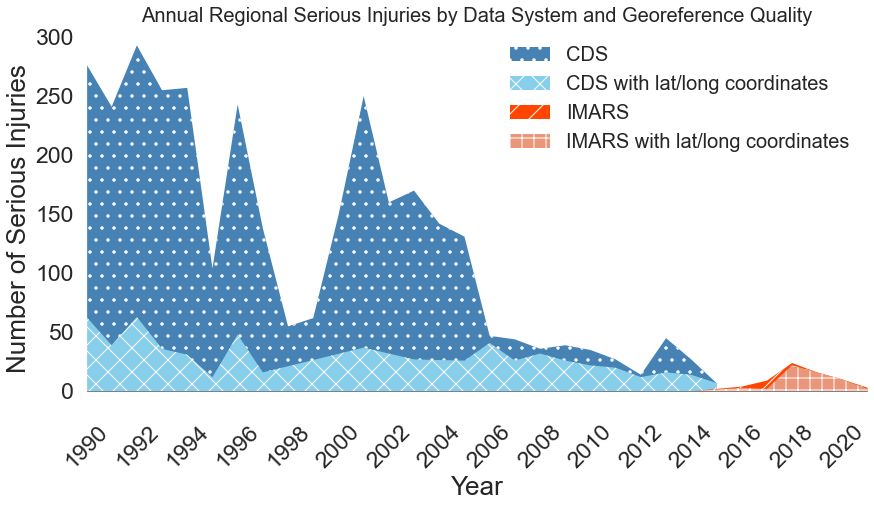

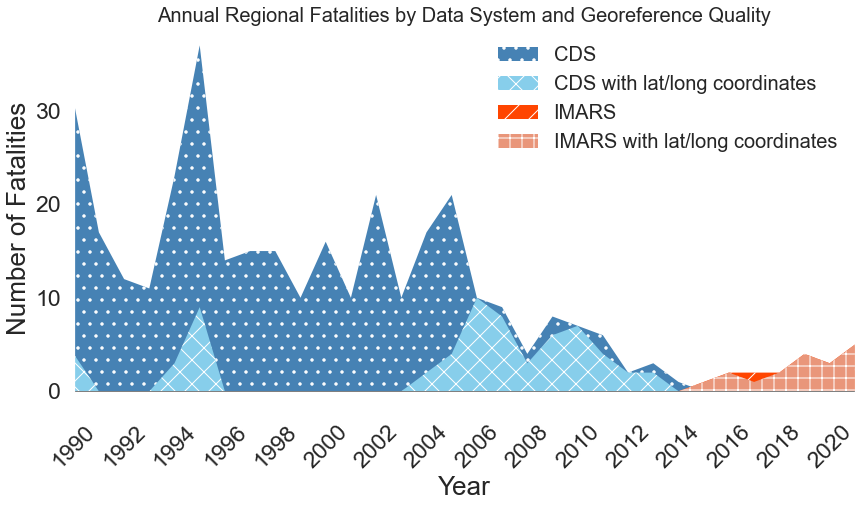

In [50]:
make_yearly_crash_fig("NCR")

## Regional Trends

### Injury & Fatality at all Parks

In [51]:
## the following cells are to test out table creation for a single region 

In [52]:
# number of crashes that resulted in an injury or fatality by park
df = analysis_2022.loc[analysis_2022['RGN']=="AKR"]
df_inj_or_fatal = df.loc[df['Injury or Fatal']==1]
inj_or_fatal_crashes = df_inj_or_fatal.groupby("Park", as_index=False).agg({'INCID_NO':'count'})
inj_or_fatal_crashes

Park  INCID_NO
0  DENA        38
1  KEFJ         1
2  KLGO         1
3  SITK         1

In [116]:
# number of serious injuries and fatalities by park
injuries_and_fatals = df.groupby("Park", as_index=False).agg({'Num_Fatalities':'sum', 'Incapacitating Injury':'sum'})
injuries_and_fatals['Number of Fatalities'] = injuries_and_fatals['Num_Fatalities'].astype(int)
injuries_and_fatals['Number of Serious Injuries'] = injuries_and_fatals['Incapacitating Injury'].astype(int)
injuries_and_fatals = injuries_and_fatals.drop(columns=['Incapacitating Injury','Num_Fatalities'])
injuries_and_fatals

Park  Number of Fatalities  Number of Serious Injuries
0  DENA                     4                           8
1  GLBA                     0                           0
2  KATM                     0                           0
3  KEFJ                     0                           0
4  KLGO                     0                           0
5  SITK                     0                           2
6  WRST                     0                           0

In [117]:
full_table = injuries_and_fatals.merge(inj_or_fatal_crashes, how='left', on='Park')
full_table

Park  Number of Fatalities  Number of Serious Injuries  INCID_NO
0  DENA                     4                           8      38.0
1  GLBA                     0                           0       NaN
2  KATM                     0                           0       NaN
3  KEFJ                     0                           0       1.0
4  KLGO                     0                           0       1.0
5  SITK                     0                           2       1.0
6  WRST                     0                           0       NaN

In [118]:
full_table.fillna(0, inplace=True)
full_table['INCID_NO'] = full_table['INCID_NO'].astype(int)
full_table = full_table.rename(columns={'INCID_NO':'Number of Crashes Resulting in an Injury or Fatality'})
full_table

Park  Number of Fatalities  Number of Serious Injuries  \
0  DENA                     4                           8   
1  GLBA                     0                           0   
2  KATM                     0                           0   
3  KEFJ                     0                           0   
4  KLGO                     0                           0   
5  SITK                     0                           2   
6  WRST                     0                           0   

   Number of Crashes Resulting in an Injury or Fatality  
0                                                 38     
1                                                  0     
2                                                  0     
3                                                  1     
4                                                  1     
5                                                  1     
6                                                  0

### Table 4: Crash Outcomes by Park

In [56]:
def create_park_table(region):
    # create dataframe for number of serious injuries, number of fatalities, number of crashes that resulted in an injury or fatality by park   
    df = analysis_2022.loc[analysis_2022['RGN']==region]
    df_inj_or_fatal = df.loc[df['Injury or Fatal']==1]
    inj_or_fatal_crashes = df_inj_or_fatal.groupby("Park").agg({'INCID_NO':'count'})
    injuries_and_fatals = df.groupby("Park", as_index=False).agg({'Num_Fatalities':'sum', 'Incapacitating Injury':'sum'})
    injuries_and_fatals['Number of Fatalities'] = injuries_and_fatals['Num_Fatalities'].astype(int)
    injuries_and_fatals['Number of Serious Injuries'] = injuries_and_fatals['Incapacitating Injury'].astype(int)
    injuries_and_fatals = injuries_and_fatals.drop(columns=['Incapacitating Injury','Num_Fatalities'])
    full_table = injuries_and_fatals.merge(inj_or_fatal_crashes, how='left', on='Park')
    full_table.fillna(0, inplace=True)
    full_table['INCID_NO'] = full_table['INCID_NO'].astype(int)
    df_final = full_table.rename(columns={'INCID_NO':'Number of Crashes Resulting in an Injury or Fatality'})
   
    return df_final

In [57]:
def make_park_table(region):
    df = create_park_table(region)
    doc_name = './22-23/Drafted Deliverables/NPS TSP Regional Briefing Draft 22-23 - blank.docx' # start wtih blank Volpe template
    doc = docx.Document(doc_name)
    doc.add_heading("Injury & fatality, at All Region Park Units")
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 1") # blue alternating

    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc_name_new = './22-23\Drafted Deliverables\Figures/Park level tables/' + region + ".docx"
    doc.save(doc_name_new)

In [58]:
# test table; once satisfied, run all seven to save separately from companion document
make_park_table("IMR")

### All Crashes

In [59]:
#def create_speed_table(region = 1, crash_group=1, injury_type=1, injury_type2 = 1):
    #create dataframe to have number of crashes by crash groups (e.g. animals involved, VRUs, etc.)
    #can also add in filters for different injury severity. These can be combined as well. 
    
 #   df = analysis_2022.loc[analysis_2022['RGN']==region]
    
  #  if crash_group != 1:
   #     df = df.loc[df[crash_group]==1]
    #else: 
     #   df = df
        
        
    #if injury_type !=1:
     #   if injury_type2 != 1:
      #      df = df.loc[(df[injury_type]>0)|(df[injury_type2]>0)]
       # else:
        #    df = df.loc[df[injury_type]>0]
    
    #speed_list = []
    
    #for x in ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph',
     #  '30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph',
      # '65_mph', '70_mph', '75_mph']:
       # speed_list.append(df[x].sum())
        
    
    
    #df_final = pd.DataFrame({'Posted Speed':[5,10,15,20,25,30,35,40,45,50,55, 60, 65, 70, 75], 
     #                          'Total Crashes':speed_list})
    
    #return df_final


### Figure 3: All Crashes by Speed Limit

In [60]:
def create_posted_speed_fig(region):
    from matplotlib.ticker import MaxNLocator
    df = analysis_2022.loc[analysis_2022['RGN']==region]
    speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
    speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
    fatalities = []
    serious_injuries = []
    crashes = []
    
    for i in speed_columns:
        num_fatalities = df.loc[df[i]==1]['Num_Fatalities'].sum()
        fatalities.append(num_fatalities)
        num_serious_injuries = df.loc[df[i]==1]['Incapacitating Injury'].sum()
        serious_injuries.append(num_serious_injuries)    
        num_crashes = df.loc[df[i]==1].shape[0]
        crashes.append(num_crashes)
    
    # set up main figure with three subplots
    plt.style.use('seaborn')
    sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
    fig, ax = plt.subplots(3,1,figsize=(20,15))
    tick_spacing = 5
    fig.suptitle('All Crashes by Speed Limit', fontsize=30)

    # subplot data
    ax[0].bar(speed_list, fatalities, width = 5, hatch = "\\", edgecolor = "black", linewidth=2)
    ax[1].bar(speed_list, serious_injuries, width = 5, hatch = "/", edgecolor = "black", linewidth=2)
    ax[2].bar(speed_list, crashes, width = 5, hatch = "x", edgecolor = "black", linewidth=2)

    # annotate all plots with bar totals
    rects = ax[0].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[0].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[1].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[1].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[2].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[2].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    # format each subplot
    ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
    #ax[0].set_ylim([0, 300])
    ax[0].set_xlim([2, 78])
    ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
    ax[0].tick_params(axis='x', which='major', labelsize=16)
    ax[0].tick_params(axis='y', which='major', labelsize=16)
    ax[0].tick_params(axis='both', which='minor', labelsize=8)

    ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
    #ax[1].set_ylim([0, 3000])
    ax[1].set_xlim([2, 78])
    ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
    ax[1].tick_params(axis='x', which='major', labelsize=16)
    ax[1].tick_params(axis='y', which='major', labelsize=16)
    ax[1].tick_params(axis='both', which='minor', labelsize=8)

    ax[2].set_title("Crash Reports",fontsize= 22, pad = 20)
    #ax[2].set_ylim([0, 40000])
    ax[2].set_xlim([2, 78])
    ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[2].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
    ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
    ax[2].tick_params(axis='x', which='major', labelsize=16)
    ax[2].tick_params(axis='y', which='major', labelsize=16)
    ax[2].tick_params(axis='both', which='minor', labelsize=8)

    # set the spacing between subplots
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
    
    doc_name = './22-23\Drafted Deliverables\Figures/Posted Speed Figures/' + region + ".png"
    
    plt.savefig(doc_name)


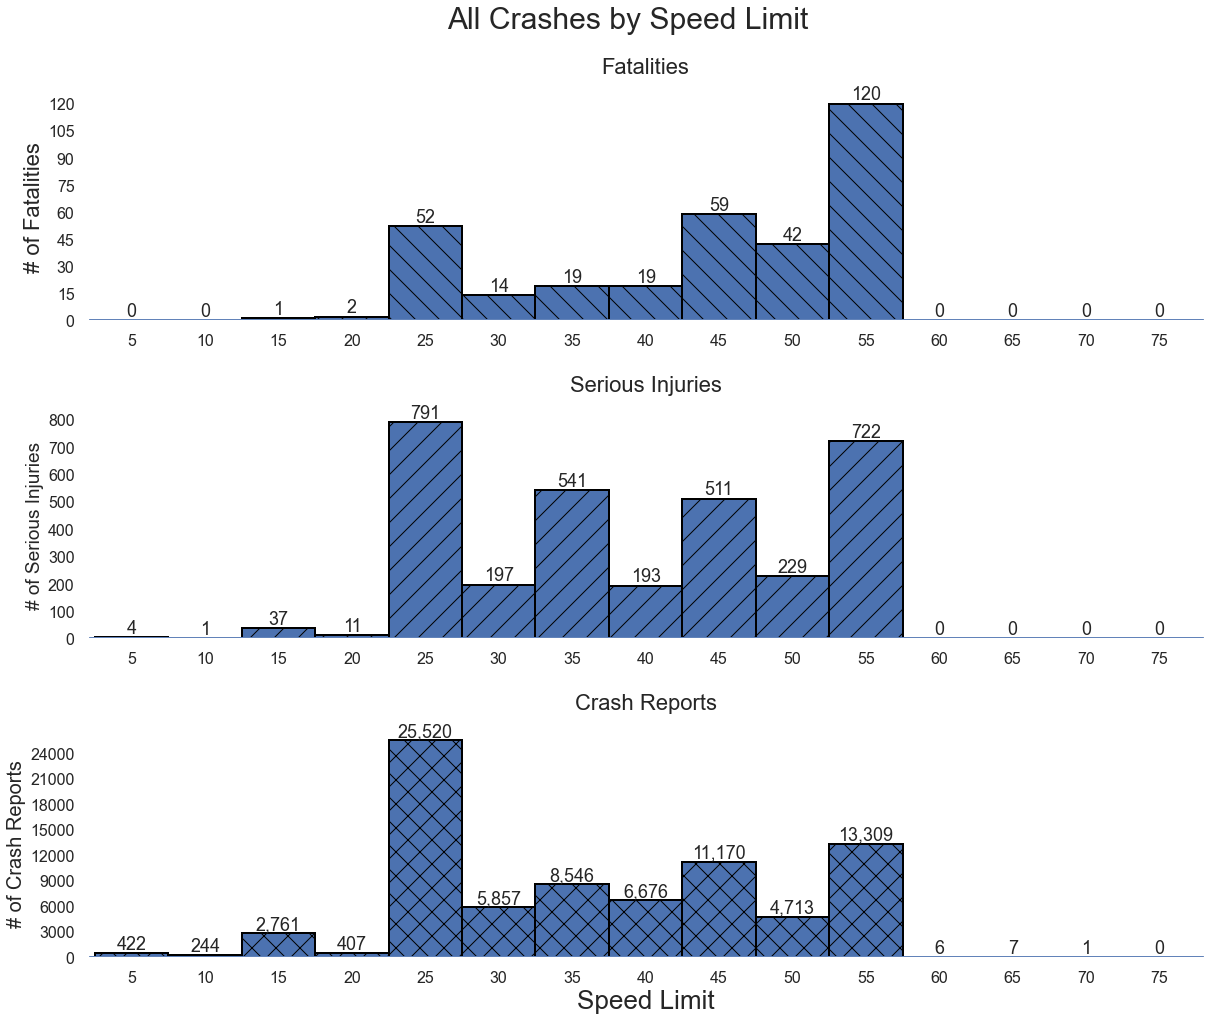

In [61]:
create_posted_speed_fig("NCR")

### Figure 4: All Crashes Resulting in an Injury or Fatality

In [62]:
def create_inj_or_fatal_fig(region):
    from matplotlib.ticker import MaxNLocator
    df = analysis_2022.loc[analysis_2022['RGN']==region]
    speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
    speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
    inj_or_fatal = df.loc[df['Injury or Fatal']==1]
    vru_inj_or_fatal = inj_or_fatal.loc[inj_or_fatal['VRU']==1]
    animal_inj_or_fatal = inj_or_fatal.loc[inj_or_fatal['Involving Animal']==1]
    VRU_crashes = []
    wildlife_crashes = []
    all_crashes = []

    for i in speed_columns:
        num_VRU_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
        VRU_crashes.append(num_VRU_crashes)
        num_wildlife_crashes = animal_inj_or_fatal.loc[animal_inj_or_fatal[i]==1].shape[0]
        wildlife_crashes.append(num_wildlife_crashes)    
        num_all_crashes = inj_or_fatal.loc[inj_or_fatal[i]==1].shape[0]
        all_crashes.append(num_all_crashes)
    
   # set up main figure with three subplots
    plt.style.use('seaborn')
    sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
    fig, ax = plt.subplots(3,1,figsize=(20,15))
    tick_spacing = 5
    fig.suptitle('Crashes Resulting in an Injury or Fatality', fontsize=30)

    # subplot data
    ax[0].bar(speed_list, VRU_crashes, width = 5, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
    ax[1].bar(speed_list, wildlife_crashes, width = 5, hatch = "/", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
    ax[2].bar(speed_list, all_crashes, width = 5, hatch = "x", edgecolor = "black", linewidth=2)

    # annotate all plots with bar totals
    rects = ax[0].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[0].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[1].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[1].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[2].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[2].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    # format each subplot
    ax[0].set_title("Crashes Involving VRUs",fontsize= 22, pad = 20)
    #ax[0].set_ylim([0, 500])
    ax[0].set_xlim([2, 78])
    ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[0].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
    ax[0].tick_params(axis='x', which='major', labelsize=16)
    ax[0].tick_params(axis='y', which='major', labelsize=16)
    ax[0].tick_params(axis='both', which='minor', labelsize=8)

    ax[1].set_title("Crashes Involving Wildlife",fontsize= 22, pad = 20)
    #ax[1].set_ylim([0, 800])
    ax[1].set_xlim([2, 78])
    ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
    ax[1].tick_params(axis='x', which='major', labelsize=16)
    ax[1].tick_params(axis='y', which='major', labelsize=16)
    ax[1].tick_params(axis='both', which='minor', labelsize=8)

    ax[2].set_title("All Crashes",fontsize= 22, pad = 20)
    #ax[2].set_ylim([0, 10000])
    ax[2].set_xlim([2, 78])
    ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[2].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
    ax[2].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
    ax[2].tick_params(axis='x', which='major', labelsize=16)
    ax[2].tick_params(axis='y', which='major', labelsize=16)
    ax[2].tick_params(axis='both', which='minor', labelsize=8)

    # set the spacing between subplots
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
    
    doc_name = './22-23\Drafted Deliverables\Figures/Injury or Fatal Figures/' + region + ".png"
    
    plt.savefig(doc_name)


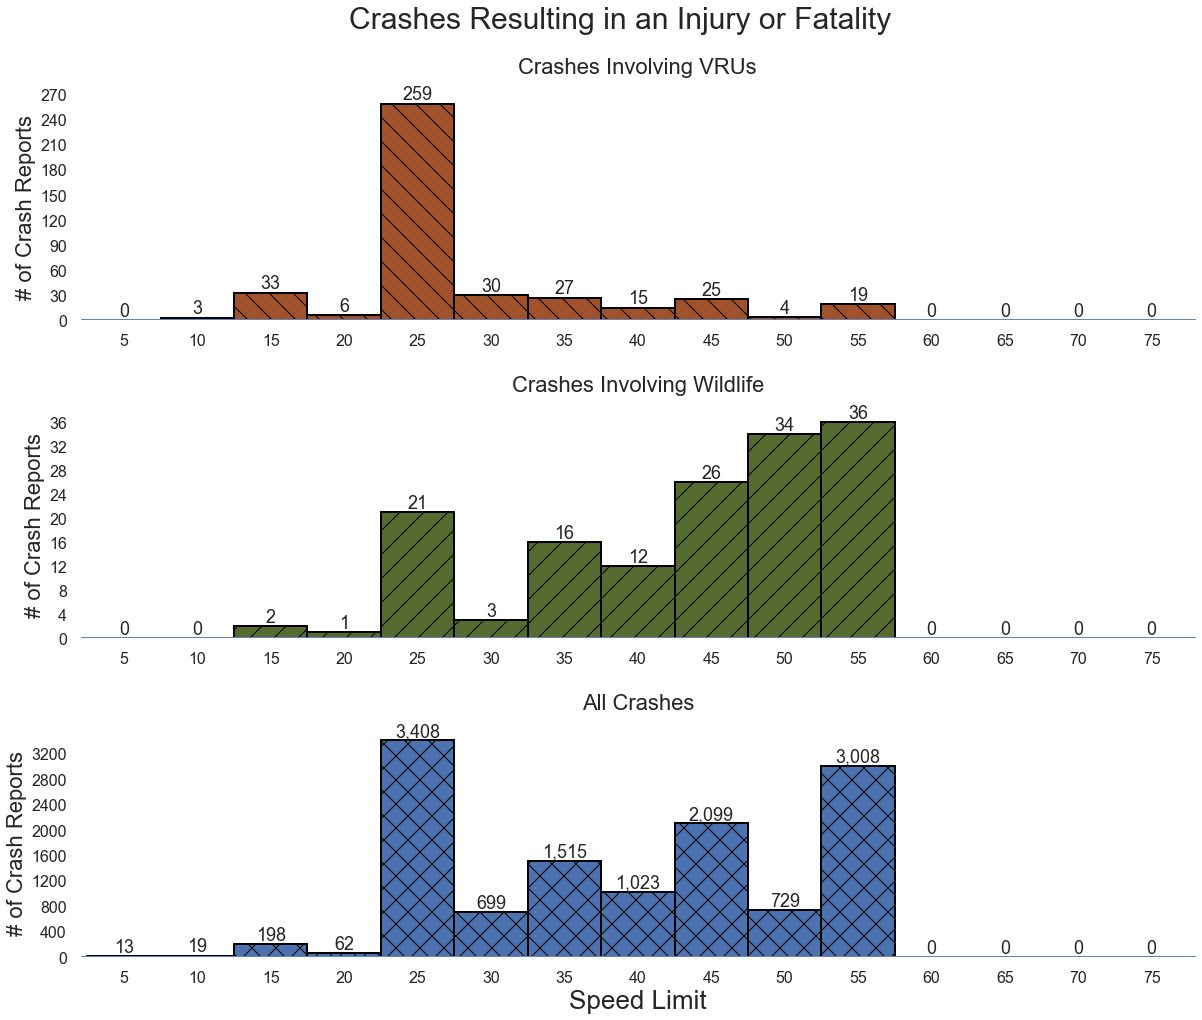

In [63]:
create_inj_or_fatal_fig("NCR")

### Wildlife crashes

In [64]:
#print(round(len(analysis_2022.loc[analysis_2022['Involving Animal']==1])/len(analysis_2022)*100,2), "% of total crashes involve Animals")

#animal_serious_injury = sum(analysis_2022.loc[(analysis_2022['Incapacitating Injury']==1)&(analysis_2022['Involving Animal']==1)]['Num_Injuries'])
#animal_injury = sum(analysis_2022.loc[(analysis_2022['Injury or Fatal']==1)&(analysis_2022['Involving Animal']==1)]['Num_Injuries'])
#animal_fatals = sum(analysis_2022.loc[(analysis_2022['Fatality']==1)&(analysis_2022['Involving Animal']==1)]['Num_Fatalities'])

#print(int(animal_injury+animal_fatals), "injuries or fatalities")
#print(int(animal_serious_injury), "serious injuries")
#print(int(animal_fatals), "fatalities")


In [65]:
#def create_wildlife_crashes_table(region):
#    percent_animal = round(len(analysis_2022.loc[analysis_2022['Involving Animal']==1])/len(analysis_2022)*100,2)
#    animal_serious_injury = sum(analysis_2022.loc[(analysis_2022['Incapacitating Injury']==1)&(analysis_2022['Involving Animal']==1)]['Num_Injuries'])
#    animal_injury = sum(analysis_2022.loc[(analysis_2022['Injury or Fatal']==1)&(analysis_2022['Involving Animal']==1)]['Num_Injuries'])
#    animal_fatals = sum(analysis_2022.loc[(analysis_2022['Fatality']==1)&(analysis_2022['Involving Animal']==1)]['Num_Fatalities'])


#    df = analysis_2022.loc[analysis_2022['RGN']==region]
#    percent_animal_region = round(len(df.loc[df['Involving Animal']==1])/len(df)*100,2)
#    animal_serious_injury_region = sum(df.loc[(df['Incapacitating Injury']==1)&(df['Involving Animal']==1)]['Num_Injuries'])
#    animal_injury_region = sum(df.loc[(df['Injury or Fatal']==1)&(df['Involving Animal']==1)]['Num_Injuries'])
#    animal_fatals_region = sum(df.loc[(df['Fatality']==1)&(df['Involving Animal']==1)]['Num_Fatalities'])
    
#    df_final = pd.DataFrame({
#        "Fields": ["% of Total Crashes", "Number of Total Injuries", "Number of Serious Injuries", "Number of Fatalities"],
#        "Region": [str(percent_animal_region) + "%", str(int(animal_injury_region)), int(animal_serious_injury_region), int(animal_fatals_region)], 
#        "National": [str(percent_animal) + "%", str(int(animal_injury)), int(animal_serious_injury), int(animal_fatals)]
#    })
    
#    return df_final

### Table 5: Crashes Involving Wildlife, Regional and National 

In [119]:
def create_wildlife_crashes_table(region):
    # create dataframe for % of total crashes involving wildlife, % of wildlife crashes resulting in an injury or fatality, serious injuries and fatalities in wildlife crashes   

    rgn = analysis_2022.loc[analysis_2022['RGN']==region]
    animal = analysis_2022.loc[analysis_2022['Involving Animal']==1]
    animal_inj_or_fatal = animal.loc[animal['Injury or Fatal']==1]
    animal_region = animal.loc[animal['RGN']==region]
    animal_inj_or_fatal_region = animal_region.loc[animal_region['Injury or Fatal']==1]
    #animal_total_crashes_region = animal_inj_or_fatal_region.shape[0]
    animal_percent_region = round(animal_region.shape[0]/rgn.shape[0]*100,2)
    animal_inj_or_fatal_percent_region = round(animal_inj_or_fatal_region.shape[0]/animal_region.shape[0]*100,2)
    #animal_injury_region = int(animal_region['Num_Injuries'].sum())
    animal_serious_injury_region = int(animal_region['Incapacitating Injury'].sum())
    animal_fatals_region = int(animal_region['Num_Fatalities'].sum())
        
    #animal_total_crashes = animal_inj_or_fatal.shape[0]
    animal_percent = round(animal.shape[0]/analysis_2022.shape[0]*100,2)
    animal_inj_or_fatal_percent = round(animal_inj_or_fatal.shape[0]/animal.shape[0]*100,2)
    #animal_injury = int(animal['Num_Injuries'].sum())
    animal_serious_injury = int(animal['Incapacitating Injury'].sum())
    animal_fatals = int(animal['Num_Fatalities'].sum())
    
    df_final = pd.DataFrame({
    "Fields": ["Percent of Total Crashes", "Percent of Wildlife Crashes that Resulted in an Injury/Fatality", "Number of Serious Injuries", "Number of Fatalities"],
    "Region": [str(animal_percent_region) + "%", str(animal_inj_or_fatal_percent_region) + "%", animal_serious_injury_region, animal_fatals_region], 
    "National": [str(animal_percent) + "%", str(animal_inj_or_fatal_percent) + "%", animal_serious_injury, animal_fatals]
     })
    
    return df_final

In [120]:
def make_wildlife_crashes_table(region):
    df = create_wildlife_crashes_table(region)
    doc_name = './22-23/Drafted Deliverables/NPS TSP Regional Briefing Draft 22-23 - blank.docx' # start with blank Volpe template
    doc = docx.Document(doc_name)
    doc.add_heading("Crashes Involving Wildlife, Regional and National")
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 6") # green alternating

    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc_name_new = './22-23\Drafted Deliverables\Figures/Wildlife Tables/' + region + ".docx"
    doc.save(doc_name_new)

In [128]:
# test table; once satisfied, run all seven to save separately from companion document
make_wildlife_crashes_table("NCR")

### Figure 5: Wildlife Crashes by Speed Limit

In [96]:
def create_posted_speed_fig_animals(region):
    from matplotlib.ticker import MaxNLocator
    df = analysis_2022.loc[analysis_2022['RGN']==region]   
    speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
    speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
    animal = df.loc[df['Involving Animal']==1]
    animal_inj_or_fatal = animal.loc[animal['Injury or Fatal']==1]
    animal_fatalities = []
    animal_serious_injuries = []
    animal_crashes = []

    for i in speed_columns:
        num_animal_fatalities = animal.loc[animal[i]==1]['Num_Fatalities'].sum()
        animal_fatalities.append(num_animal_fatalities)
        num_animal_serious_injuries = animal.loc[animal[i]==1]['Incapacitating Injury'].sum()
        animal_serious_injuries.append(num_animal_serious_injuries)    
        num_animal_crashes = animal_inj_or_fatal.loc[animal_inj_or_fatal[i]==1].shape[0]
        animal_crashes.append(num_animal_crashes)
        
    # set up main figure with three subplots
    plt.style.use('seaborn')
    sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
    fig, ax = plt.subplots(3,1,figsize=(20,15))
    tick_spacing = 5
    fig.suptitle('Wildlife Crashes by Speed Limit', fontsize=30)

    # subplot data
    ax[0].bar(speed_list, animal_fatalities, width = 5, hatch = "\\", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
    ax[1].bar(speed_list, animal_serious_injuries, width = 5, hatch = "/", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
    ax[2].bar(speed_list, animal_crashes, width = 5, hatch = "x", color = 'darkolivegreen', edgecolor = "black", linewidth=2)

    # annotate all plots with bar totals
    rects = ax[0].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[0].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[1].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[1].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[2].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[2].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    # format each subplot
    ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
    #ax[0].set_ylim([0, 20])
    ax[0].set_xlim([2, 78])
    ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
    ax[0].tick_params(axis='x', which='major', labelsize=16)
    ax[0].tick_params(axis='y', which='major', labelsize=16)
    ax[0].tick_params(axis='both', which='minor', labelsize=8)

    ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
    #ax[1].set_ylim([0, 200])
    ax[1].set_xlim([2, 78])
    ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
    ax[1].tick_params(axis='x', which='major', labelsize=16)
    ax[1].tick_params(axis='y', which='major', labelsize=16)
    ax[1].tick_params(axis='both', which='minor', labelsize=8)

    ax[2].set_title("Crash Reports Resulting in an Injury/Fatality",fontsize= 22, pad = 20)
    #ax[2].set_ylim([0, 800])
    ax[2].set_xlim([2, 78])
    ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[2].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
    ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
    ax[2].tick_params(axis='x', which='major', labelsize=16)
    ax[2].tick_params(axis='y', which='major', labelsize=16)
    ax[2].tick_params(axis='both', which='minor', labelsize=8)

    # set the spacing between subplots
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

    doc_name = './22-23\Drafted Deliverables\Figures/Wildlife Figures/' + region + ".png"
    
    plt.savefig(doc_name)

In [ ]:
create_posted_speed_fig_animals("NCR")

### Table 6: Wildlife Crash Outcomes by Park

In [100]:
def create_wildlife_crashes_table_park(region):
    # create dataframe for number of serious injuries and fatalities in wildlife crashes, number of wildlife crashes that resulted in an injury or fatality by park   
    df = analysis_2022.loc[analysis_2022['RGN']==region]
    df_animal = df.loc[df['Involving Animal']==1]
    df_animal_inj_or_fatal = df_animal.loc[df_animal['Injury or Fatal']==1]
    animal_inj_or_fatal_crashes = df_animal_inj_or_fatal.groupby("Park").agg({'INCID_NO':'count'})
    animal_injuries_and_fatals = df_animal.groupby("Park", as_index=False).agg({'Num_Fatalities':'sum', 'Incapacitating Injury':'sum'})
    animal_injuries_and_fatals['Number of Fatalities'] = animal_injuries_and_fatals['Num_Fatalities'].astype(int)
    animal_injuries_and_fatals['Number of Serious Injuries'] = animal_injuries_and_fatals['Incapacitating Injury'].astype(int)
    animal_injuries_and_fatals = animal_injuries_and_fatals.drop(columns=['Incapacitating Injury','Num_Fatalities'])
    full_table_animal = animal_injuries_and_fatals.merge(animal_inj_or_fatal_crashes, how='left', on='Park')
    full_table_animal.fillna(0, inplace=True)
    full_table_animal['INCID_NO'] = full_table_animal['INCID_NO'].astype(int)
    df_final = full_table_animal.rename(columns={'INCID_NO':'Number of Crashes Resulting in an Injury or Fatality'})

    return df_final

In [101]:
def make_wildlife_crashes_table_park(region):
    df = create_wildlife_crashes_table_park(region)
    doc_name = './22-23/Drafted Deliverables/NPS TSP Regional Briefing Draft 22-23 - blank.docx' # start with blank Volpe template
    doc = docx.Document(doc_name)
    doc.add_heading("Park-Level Wildlife Crashes and Outcomes")
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 1") # blue alternating

    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc_name_new = './22-23\Drafted Deliverables\Figures/Wildlife Tables/' 'Park-Level-' + region + ".docx"
    doc.save(doc_name_new)

In [109]:
# test table; once satisfied, run all seven to save separately from companion document
make_wildlife_crashes_table_park("NCR")

### Table 7: Wildlife Crash Outcomes by Type of Animal

In [204]:
def create_wildlife_crashes_table_species(region):
    # create dataframe for number of serious injuries and fatalities in wildlife crashes, number of wildlife crashes that resulted in an injury or fatality by animal type
    animal = analysis_2022.loc[analysis_2022['Involving Animal']==1]
    animal_region = animal.loc[animal['RGN']==region]
    animal_region_inj_or_fatal = animal_region.loc[animal_region['Injury or Fatal']==1]
    animal_list = ['HorseLlama', 'Cow', 'Deer', 'Elk', 'Moose', 'Buffalo', 'Bear', 'Antelope', 'SheepGoats', 'OtherWild', 'OtherDomestic']
    df_final = pd.DataFrame(columns={"Type of Animal", "Number of Fatalities", "Number of Serious Injuries", 'Number of Crashes Resulting in an Injury or Fatality'})
    animal_fatalities = []
    animal_serious_injuries = []
    animal_inj_or_fatal_crashes = []

    for i in animal_list:
        num_animal_fatalities = int(animal_region.loc[animal_region[i]==1]['Num_Fatalities'].sum())
        animal_fatalities.append(num_animal_fatalities)
        num_animal_serious_injuries = int(animal_region.loc[animal_region[i]==1]['Incapacitating Injury'].sum())
        animal_serious_injuries.append(num_animal_serious_injuries)    
        animal_inj_or_fatal_num_crashes = int(animal_region_inj_or_fatal.loc[animal_region_inj_or_fatal[i]==1].shape[0])
        animal_inj_or_fatal_crashes.append(animal_inj_or_fatal_num_crashes)

    df_final["Number of Fatalities"] = animal_fatalities
    df_final["Number of Serious Injuries"] = animal_serious_injuries
    df_final["Number of Crashes Resulting in an Injury or Fatality"] = animal_inj_or_fatal_crashes
    df_final["Type of Animal"] = ['Horse/Llama', 'Cow', 'Deer', 'Elk', 'Moose', 'Buffalo', 'Bear', 'Antelope', 'Sheep/Goat', 'Other Wild Animal', 'Other Domestic Animal']
    df_final = df_final[["Type of Animal","Number of Fatalities","Number of Serious Injuries","Number of Crashes Resulting in an Injury or Fatality"]]
    
    return df_final

In [205]:
def make_wildlife_crashes_table_species(region):
    df = create_wildlife_crashes_table_species(region)
    doc_name = './22-23/Drafted Deliverables/NPS TSP Regional Briefing Draft 22-23 - blank.docx' # start with blank Volpe template
    doc = docx.Document(doc_name)
    doc.add_heading("Species-Level Wildlife Crashes and Outcomes")
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 6") # green alternating

    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc_name_new = './22-23\Drafted Deliverables\Figures/Wildlife Tables/' 'Species-Level-' + region + ".docx"
    doc.save(doc_name_new)

In [212]:
# test table; once satisfied, run all seven to save separately from companion document
make_wildlife_crashes_table_species("NER")

In [71]:
#def create_wildlife_crashes_table_park(region):
#    df = analysis_2022.loc[analysis_2022['Involving Animal']==1]
#    df = df.loc[df['RGN']==region]
#    df = df.groupby('Park').sum().reset_index()
#    df_final  = df[['Park','ones','Num_Fatalities','Num_Injuries']].sort_values(by = ['ones'], ascending = False).rename(columns = {
#        "ones":"Number of Crash Reports",
#        "Num_Fatalities": "Number of Fatalities",
#        "Num_Injuries": "Number of Injuries"
#    }).astype({"Number of Fatalities":"int",
#              "Number of Injuries":"int"})    
#    return df_final

### VRU crashes

### Figure 6: VRU crashes by Speed Limit

In [73]:
def create_posted_speed_fig_vrus(region):
    from matplotlib.ticker import MaxNLocator
    df = analysis_2022.loc[analysis_2022['RGN']==region]   
    speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
    speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
    vru = df.loc[df['VRU']==1]
    vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
    vru_fatalities = []
    vru_serious_injuries = []
    vru_crashes = []

    for i in speed_columns:
        num_vru_fatalities = vru.loc[vru[i]==1]['Num_Fatalities'].sum()
        vru_fatalities.append(num_vru_fatalities)
        num_vru_serious_injuries = vru.loc[vru[i]==1]['Incapacitating Injury'].sum()
        vru_serious_injuries.append(num_vru_serious_injuries)    
        num_vru_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
        vru_crashes.append(num_vru_crashes)
        
    plt.style.use('seaborn')
    sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
    fig, ax = plt.subplots(3,1,figsize=(20,15))
    tick_spacing = 5
    fig.suptitle('VRU Crashes by Speed Limit', fontsize=30)

    # subplot data
    ax[0].bar(speed_list, vru_fatalities, width = 5, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
    ax[1].bar(speed_list, vru_serious_injuries, width = 5, hatch = "/", color = 'sienna', edgecolor = "black", linewidth=2)
    ax[2].bar(speed_list, vru_crashes, width = 5, hatch = "x", color = 'sienna', edgecolor = "black", linewidth=2)

    # annotate all plots with bar totals
    rects = ax[0].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[0].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[1].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[1].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[2].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[2].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    # format each subplot
    ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
    #ax[0].set_ylim([0, 20])
    ax[0].set_xlim([2, 78])
    ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[0].tick_params(axis='x', which='major', labelsize=16)
    ax[0].tick_params(axis='y', which='major', labelsize=16)
    ax[0].tick_params(axis='both', which='minor', labelsize=8)

    ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
    #ax[1].set_ylim([0, 200])
    ax[1].set_xlim([2, 78])
    ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
    ax[1].tick_params(axis='x', which='major', labelsize=16)
    ax[1].tick_params(axis='y', which='major', labelsize=16)
    ax[1].tick_params(axis='both', which='minor', labelsize=8)

    ax[2].set_title("Crash Reports Resulting in an Injury/Fatality",fontsize= 22, pad = 20)
    #ax[2].set_ylim([0, 500])
    ax[2].set_xlim([2, 78])
    ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
    ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[2].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
    ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
    ax[2].tick_params(axis='x', which='major', labelsize=16)
    ax[2].tick_params(axis='y', which='major', labelsize=16)
    ax[2].tick_params(axis='both', which='minor', labelsize=8)

    # set the spacing between subplots
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

    doc_name = './22-23\Drafted Deliverables\Figures/VRU Figures/' + region + ".png"
    
    plt.savefig(doc_name)


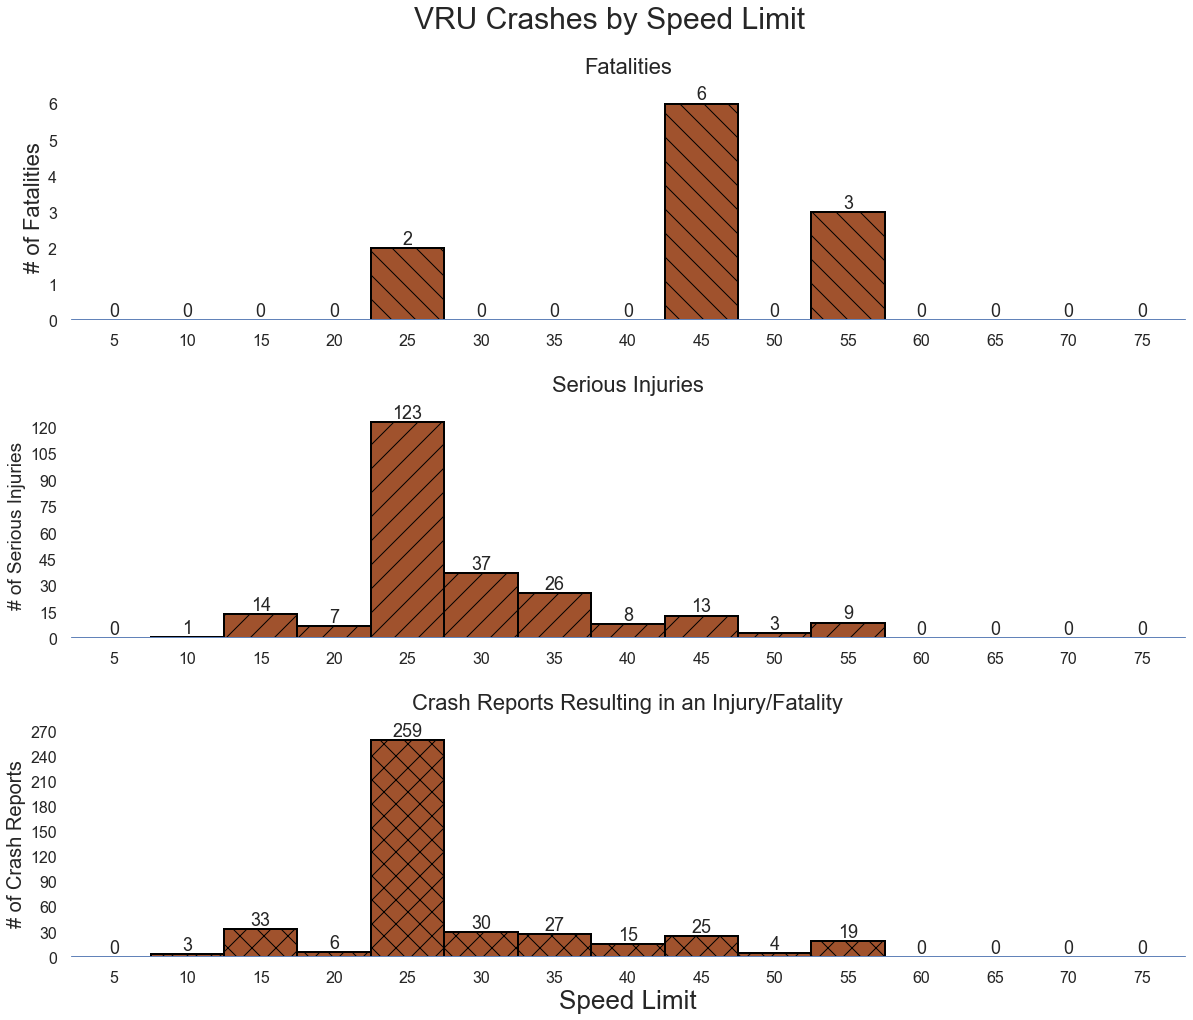

In [74]:
create_posted_speed_fig_vrus("NCR")

### Figure 7: VRU crashes by Location

In [75]:
def create_location_fig_vrus(region):
    from matplotlib.ticker import MaxNLocator
    df = analysis_2022.loc[analysis_2022['RGN']==region]   
    crosswalks = ['Crosswalk','Outside a Crosswalk']
    vru = df.loc[df['VRU']==1]
    vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
    vru_crosswalk_fatalities = []
    vru_crosswalk_serious_injuries = []
    vru_crosswalk_crashes = []

    for i in crosswalks:
        num_vru_crosswalk_fatalities = vru.loc[vru[i]==1]['Num_Fatalities'].sum()
        vru_crosswalk_fatalities.append(num_vru_crosswalk_fatalities)
        num_vru_crosswalk_serious_injuries = vru.loc[vru[i]==1]['Incapacitating Injury'].sum()
        vru_crosswalk_serious_injuries.append(num_vru_crosswalk_serious_injuries)    
        num_vru_crosswalk_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
        vru_crosswalk_crashes.append(num_vru_crosswalk_crashes)

    # set up main figure with three subplots
    plt.style.use('seaborn')
    sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
    fig, ax = plt.subplots(3,1,figsize=(20,15))
    fig.suptitle('VRU Crashes by Crash Location', fontsize=30)

    # subplot data
    ax[0].bar(crosswalks, vru_crosswalk_fatalities, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
    ax[1].bar(crosswalks, vru_crosswalk_serious_injuries, hatch = "/", color = 'sienna', edgecolor = "black", linewidth=2)
    ax[2].bar(crosswalks, vru_crosswalk_crashes, hatch = "x", color = 'sienna', edgecolor = "black", linewidth=2)

    # annotate all plots with bar totals
    rects = ax[0].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[0].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[1].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[1].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    rects = ax[2].patches
    labels = [f"label{i}" for i in range(len(rects))]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        label = '{:,}'.format(int(height))
        ax[2].text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom",fontsize=18)

    # format each subplot
    ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
    #ax[0].set_ylim([0, 10])
    ax[0].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
    ax[0].tick_params(axis='x', which='major', labelsize=22)
    ax[0].tick_params(axis='y', which='major', labelsize=16)
    ax[0].tick_params(axis='both', which='minor', labelsize=8)

    ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
    #ax[1].set_ylim([0, 100])
    ax[1].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
    ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
    ax[1].tick_params(axis='x', which='major', labelsize=22)
    ax[1].tick_params(axis='y', which='major', labelsize=16)
    ax[1].tick_params(axis='both', which='minor', labelsize=8)

    ax[2].set_title("Crash Reports Resulting in an Injury/Fatality",fontsize= 22, pad = 20)
    #ax[2].set_ylim([0, 250])
    ax[2].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
    ax[2].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[2].set_xlabel('Crash Location',fontsize = 26) #xlabel
    ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
    ax[2].tick_params(axis='x', which='major', labelsize=22)
    ax[2].tick_params(axis='y', which='major', labelsize=16)
    ax[2].tick_params(axis='both', which='minor', labelsize=8)

    # set the spacing between subplots
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

    doc_name = './22-23\Drafted Deliverables\Figures/Crosswalk Figures/' + region + ".png"
    
    plt.savefig(doc_name)


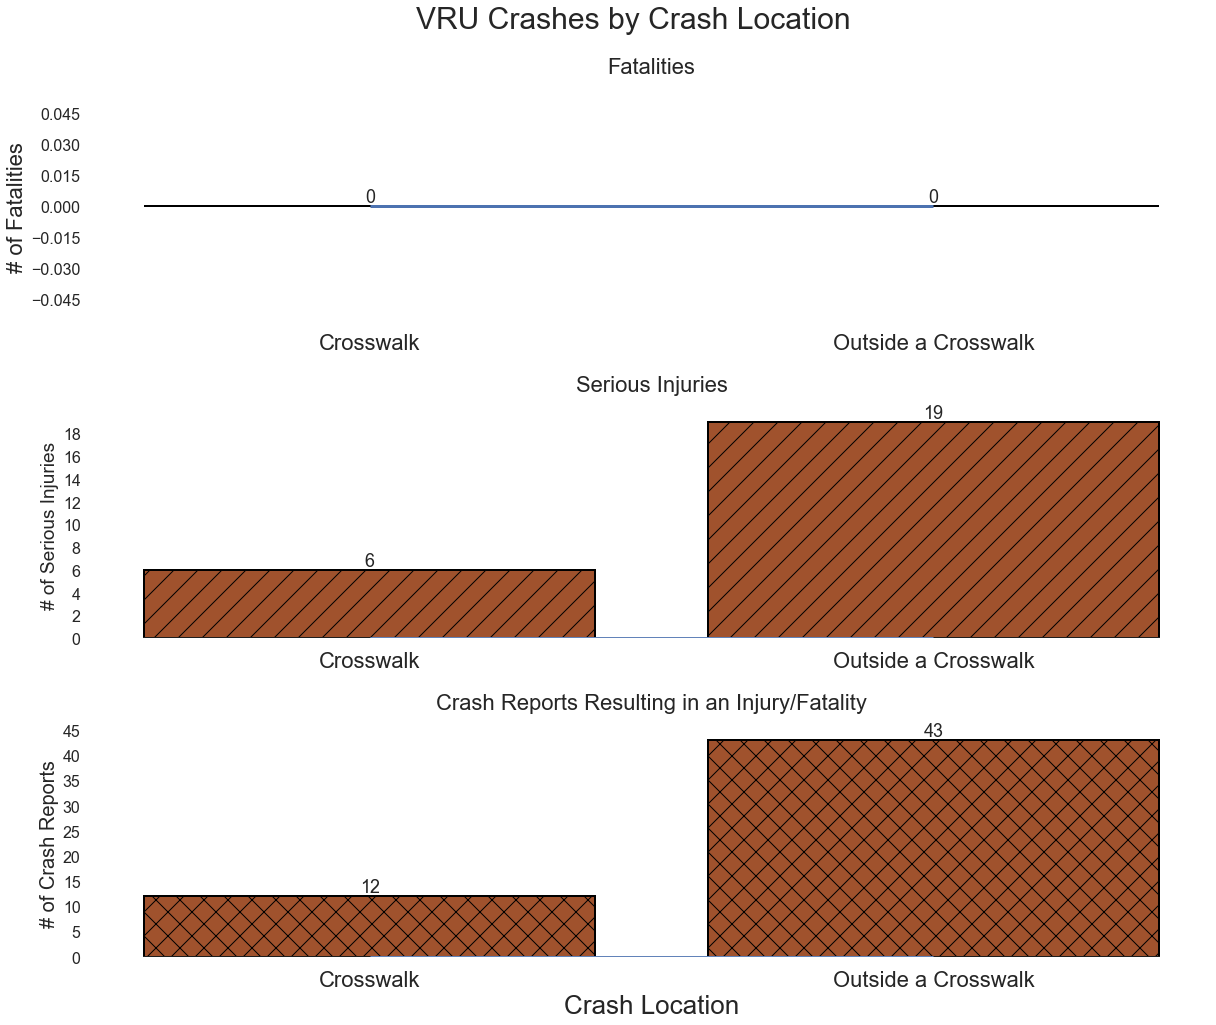

In [76]:
create_location_fig_vrus("NCR")

# Create final document

In [77]:
doc_name = './22-23/Drafted Deliverables/NPS TSP Regional Briefing Draft 22-23 - Testing.docx'
doc = docx.Document(doc_name)
styles = doc.styles
for s in styles:
    print(s)
print(styles)

_ParagraphStyle('Normal') id: 2406950816064
_ParagraphStyle('Heading 1') id: 2406950960096
_ParagraphStyle('Heading 2') id: 2406950985792
_ParagraphStyle('Heading 3') id: 2406950988528
_ParagraphStyle('Heading 6') id: 2406950989776
_ParagraphStyle('Heading 7') id: 2406950989488
_ParagraphStyle('Heading 8') id: 2406951066880
_ParagraphStyle('Heading 9') id: 2406951065296
_TableStyle('Normal Table') id: 2406951066784
_ParagraphStyle('toc 1') id: 2406951196176
_ParagraphStyle('toc 2') id: 2406951196368
_ParagraphStyle('toc 3') id: 2406951196560
_ParagraphStyle('Header') id: 2406951196608
_ParagraphStyle('Footer') id: 2406951197472
_TableStyle('Table Grid1') id: 2406951197520
_TableStyle('Table Grid') id: 2406951197760
_ParagraphStyle('List Paragraph') id: 2406949271584
_ParagraphStyle('annotation text') id: 2406951253424
_ParagraphStyle('annotation subject') id: 2406951253808
_ParagraphStyle('footnote text') id: 2406951254192
_ParagraphStyle('Normal (Web)') id: 2406951254960
_TableStyle('

In [213]:
def add_regional_information(region):
    df = make_source_table(region)
    doc_name = './22-23/Drafted Deliverables/NPS TSP Regional Briefing Draft 22-23 - blank.docx'
    doc = docx.Document(doc_name)
    doc.add_heading("Overview of Region")
    
    doc.add_heading("Available Data", 2)
    #doc.add_paragraph(" ")
    doc.add_paragraph("Table 1. Overview of Data Sources", style="Caption")
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 6")
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
            
    doc.add_heading("Data Quality", 2)
    
    #doc.add_heading("Completeness of crash reports by field", 3)
    #doc.add_paragraph("Below is a table of CDS and IMARS crash report completeness, broken down by region. Reports are labeled as incomplete if they only contain a crash table with core crash elements (e.g. coordinates, crash classification, etc.). For CDS crashes, this means vehicle and passenger data tables are not populated. The NCR was an outlier as compared to other regions, with around 8% of reports failing to include vehicle or passenger data tables. For IMARS crashes, this means crash details, vehicle, and passenger data tables are not populated. IMARS reports have generally been less complete across each region. ")
    #doc.add_paragraph("Table 2. Regional CDS Crash Reports", style="Caption")
    #df = make_data_quality_table_cds(region)
    #t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 1")
    #for j in range(df.shape[-1]):
    #    t.cell(0,j).text = df.columns[j]
    #for i in range(df.shape[0]):
    #    for j in range(df.shape[-1]):
    #        t.cell(i+1,j).text = str(df.values[i,j])
    #doc.add_paragraph(" ")
    #doc.add_paragraph("Table 3. Regional IMARS Crash Reports", style="Caption")
    #df = make_data_quality_table_imars(region)
    #t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 6")
    #for j in range(df.shape[-1]):
    #    t.cell(0,j).text = df.columns[j]
    #for i in range(df.shape[0]):
    #    for j in range(df.shape[-1]):
    #        t.cell(i+1,j).text = str(df.values[i,j]) 
    #doc.add_paragraph(" ")
    
    doc.add_heading("Crash Report Completeness by Year", 3)
    #doc.add_paragraph(" ")
    make_yearly_crash_fig(region)
    doc.add_paragraph("Figure 1. Annual Regional Serious Injuries by Data System and Georeference Quality", style="Caption")
    doc.add_picture('./22-23\Drafted Deliverables\Figures/Yearly injury/' + region + ".png", width = 5943600, height = 3447288)
    doc.add_paragraph(" ")
    doc.add_paragraph("Figure 2. Annual Regional Fatalities by Data System and Georeference Quality", style="Caption")
    doc.add_picture('./22-23\Drafted Deliverables\Figures/Yearly fatality/' + region + ".png", width = 5943600, height = 3447288)
    doc.add_paragraph(" ")
    
    #doc.add_heading("Completeness of crash report by park", 3)
    #doc.add_paragraph(" ")
    #doc.add_paragraph("Add figure showing trends over time across CDS and IMARS. Repeat for all crashes, crashes with injuries, and crashes with fatalities")
    #doc.add_paragraph(" ")

    doc.add_heading("Regional Trends", 2)
    
    doc.add_heading("Park-Level Crashes", 3)
    #doc.add_paragraph(" ")
    df = create_park_table(region)
    doc.add_paragraph("Table 4. Crash Outcomes by Park (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 1")
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc.add_paragraph(" ")
    
    doc.add_heading("Crashes by Speed Limit", 3)
    doc.add_paragraph("Figure 3. All Crashes by Speed Limit (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    create_posted_speed_fig(region)
    doc.add_picture('./22-23\Drafted Deliverables\Figures/Posted Speed Figures/' + region + ".png", width = 5943600, height = 4828270)
    doc.add_paragraph(" ")
    doc.add_paragraph("Figure 4. All Crashes Resulting in an Injury or Fatality by Speed Limit (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    create_inj_or_fatal_fig(region)
    doc.add_picture('./22-23\Drafted Deliverables\Figures/Injury or Fatal Figures/' + region + ".png", width = 5943600, height = 4828270)
    doc.add_paragraph(" ")
    
    doc.add_heading("Crashes Involving Wildlife", 3)
    #doc.add_paragraph(" ")
    df = create_wildlife_crashes_table(region)
    doc.add_paragraph("Table 5. Crashes Involving Wildlife, Regional and National (1990-2021, data from STARS, CDS, IMARS) ", style="Caption")
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 6")
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc.add_paragraph(" ")
    doc.add_paragraph("Figure 5. Wildlife Crashes by Speed Limit (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    create_posted_speed_fig_animals(region)
    doc.add_picture('./22-23\Drafted Deliverables\Figures/Wildlife Figures/' + region + ".png", width = 5943600, height = 4828270)
    doc.add_paragraph(" ")
    doc.add_paragraph("Table 6. Wildlife Crash Outcomes by Park (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    df = create_wildlife_crashes_table_park(region)
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 1")
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc.add_paragraph("Table 7. Wildlife Crash Outcomes by Type of Animal (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    df = create_wildlife_crashes_table_alltypes(region)
    t = doc.add_table(df.shape[0]+1, df.shape[1], style="Grid Table 5 Dark Accent 6")
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])
    doc.add_paragraph(" ")
    
    doc.add_heading("Crashes Involving Vulnerable Road Users", 3)
    doc.add_paragraph("Figure 6. Vulnerable Road User Crashes by Speed Limit (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    create_posted_speed_fig_vrus(region)
    doc.add_picture('./22-23\Drafted Deliverables\Figures/VRU Figures/' + region + ".png", width = 5943600, height = 4828270)
    doc.add_paragraph(" ")
    doc.add_paragraph("Figure 7. Vulnerable Road User Crashes by Location (1990-2021, data from STARS, CDS, IMARS)", style="Caption")
    create_location_fig_vrus(region)
    doc.add_picture('./22-23\Drafted Deliverables\Figures/Crosswalk Figures/' + region + ".png", width = 5943600, height = 4828270)
    doc.add_paragraph(" ")

    #doc.add_heading("Wish List Items")
    #doc.add_paragraph("Section to be completed for final briefing")

    doc_name_new = './22-23/Drafted Deliverables/NPS TSP Regional Briefing Draft 22-23 - ' + region + ".docx"

    doc.save(doc_name_new)

In [ ]:
add_regional_information("NCR")

<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


SER


<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


NER


<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


MWR


<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1
<ipython-input-75-281922000617>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,1,figsize=(20,15))


IMR


<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


NCR


<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


PWR


<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


AKR


<ipython-input-49-c77326561c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = 1


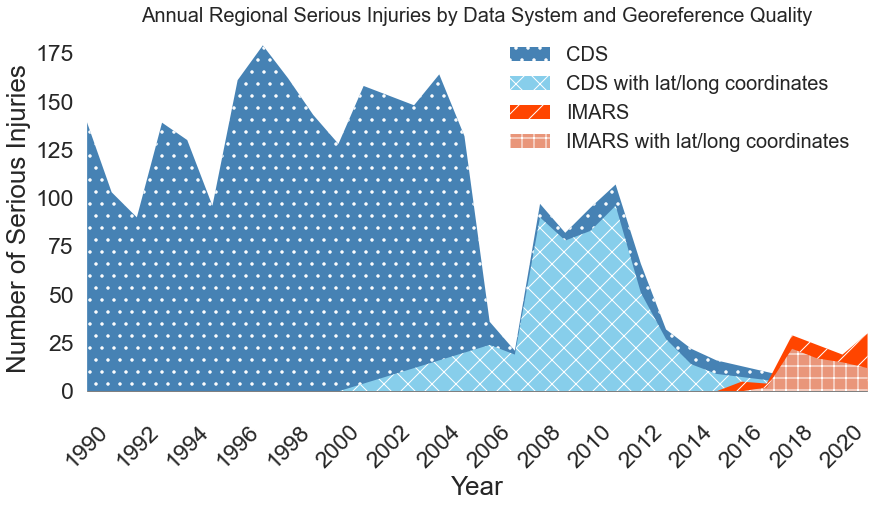

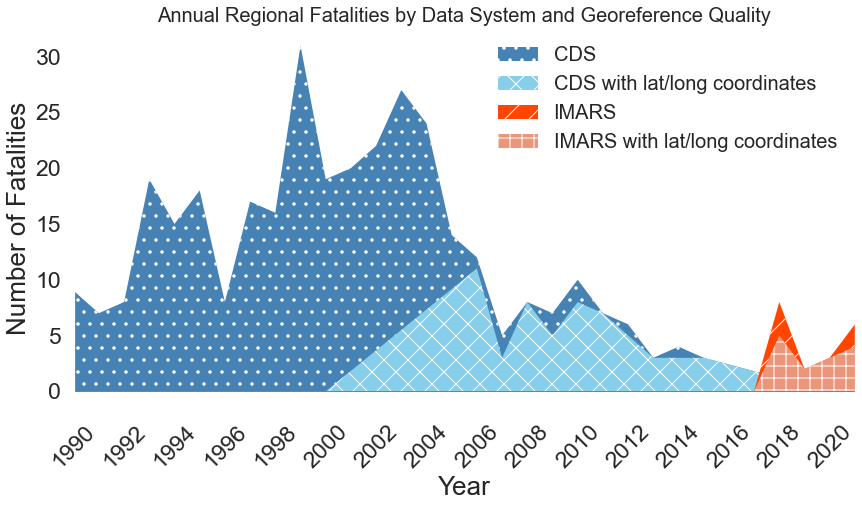

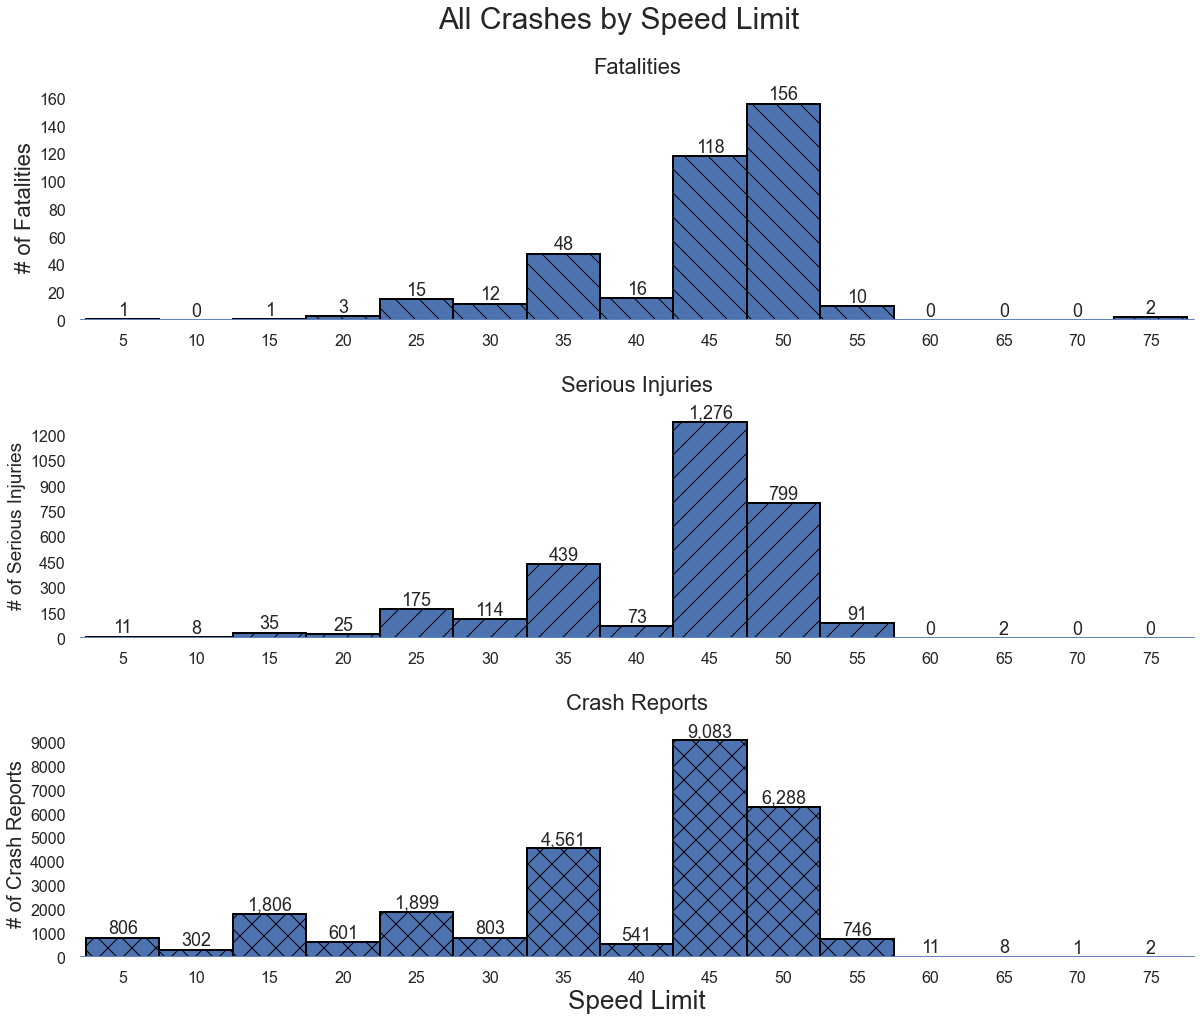

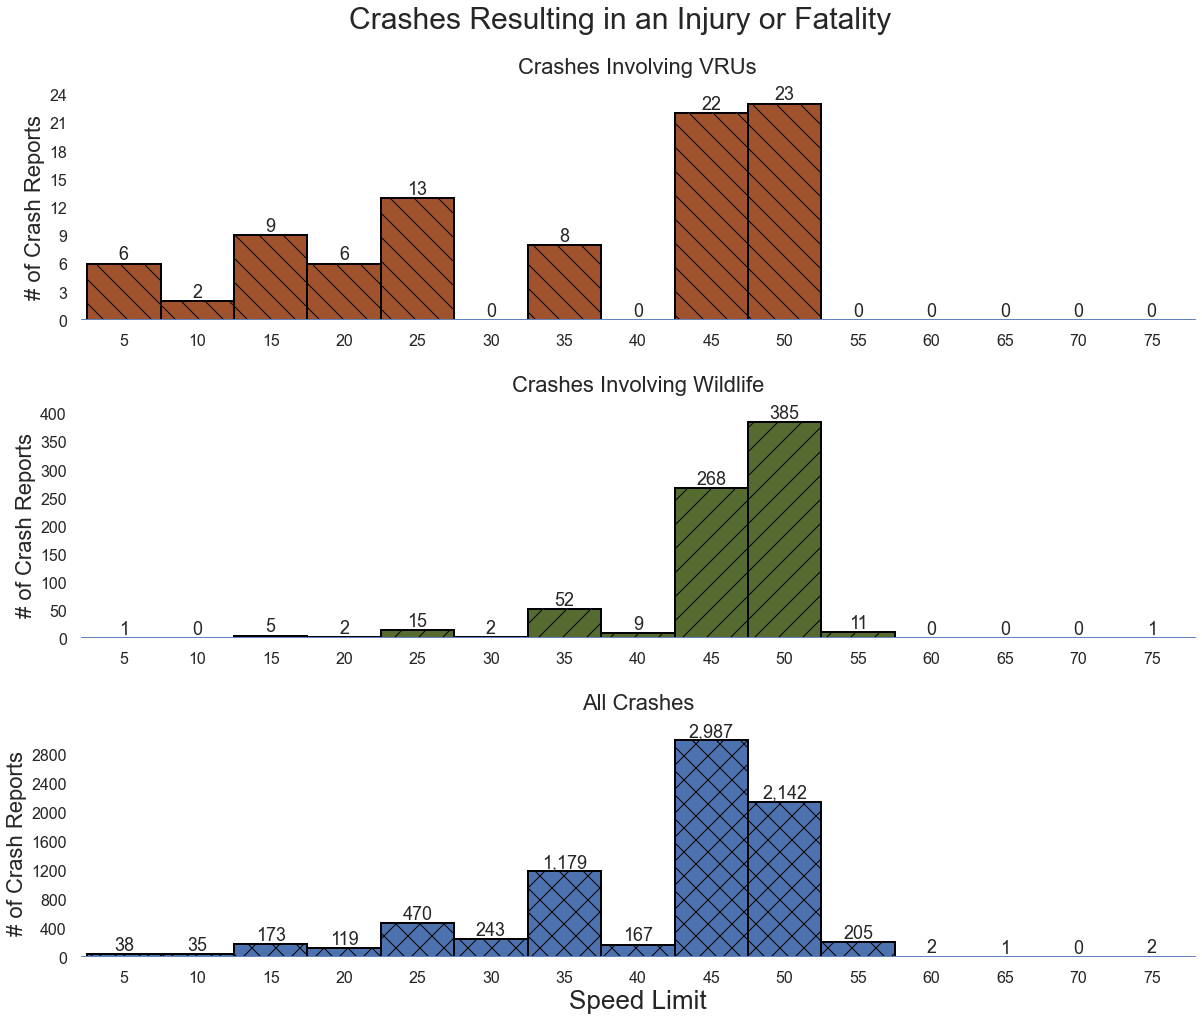

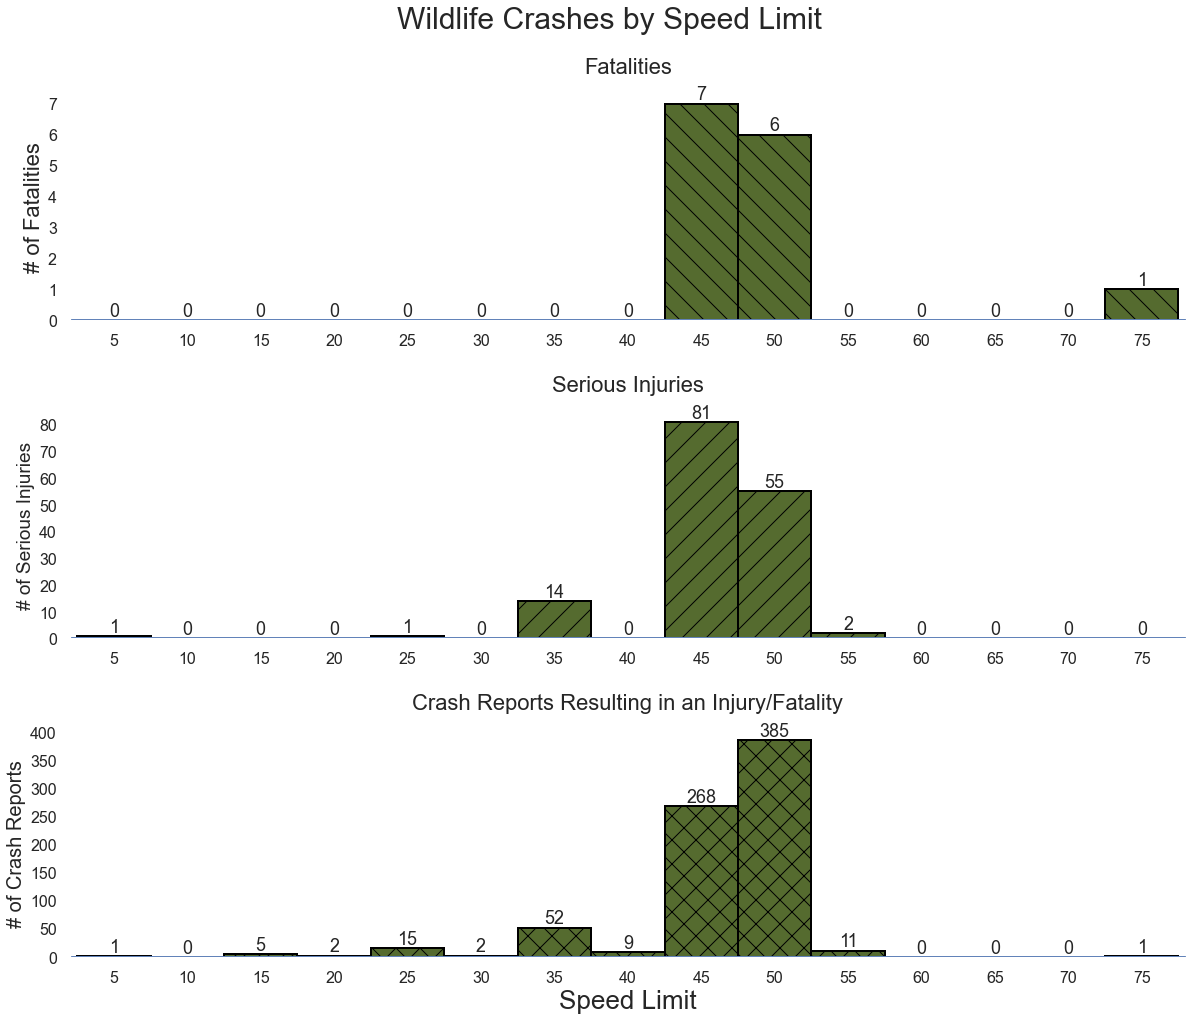

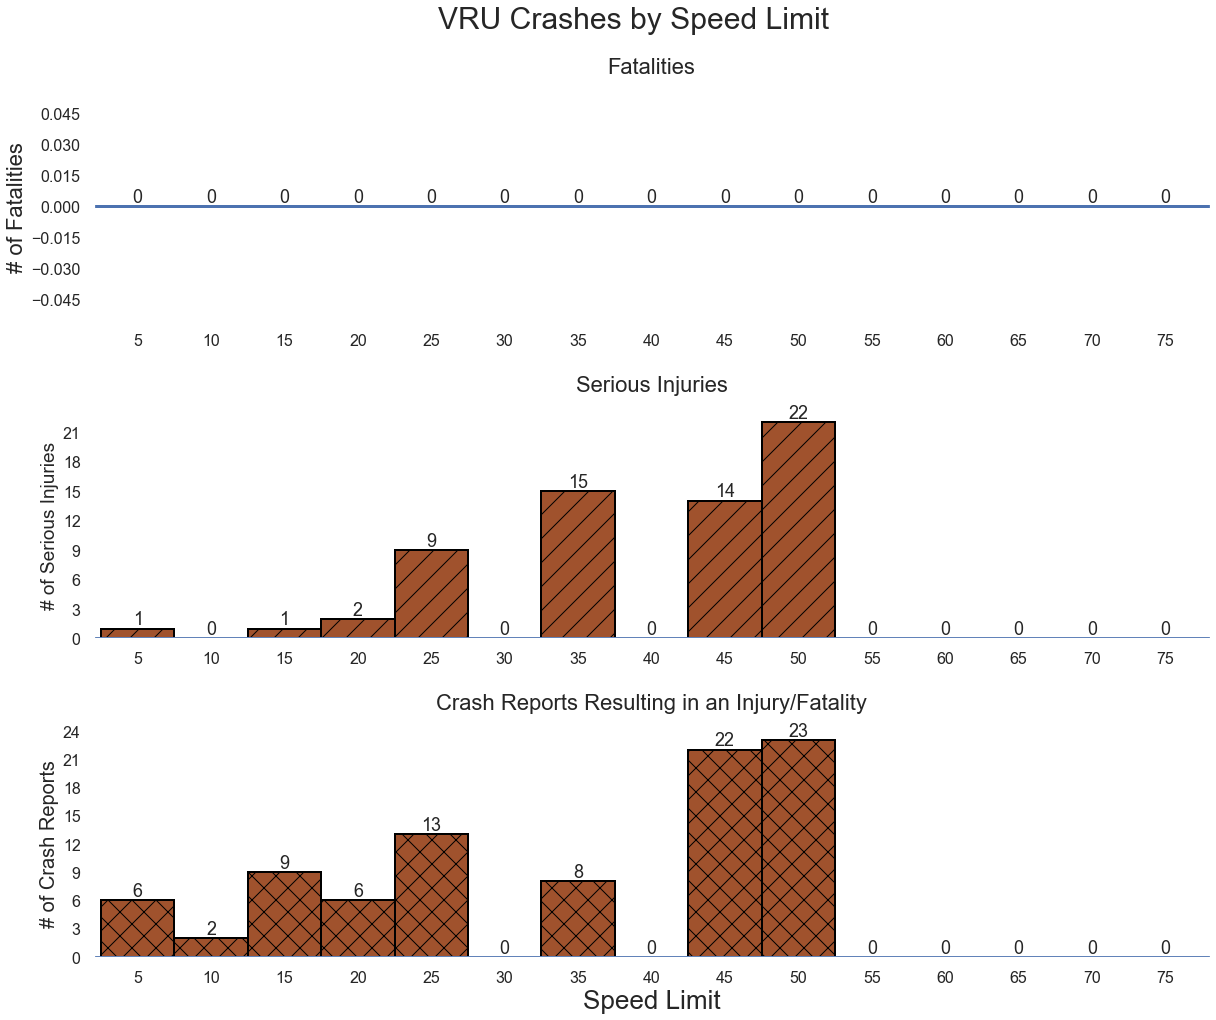

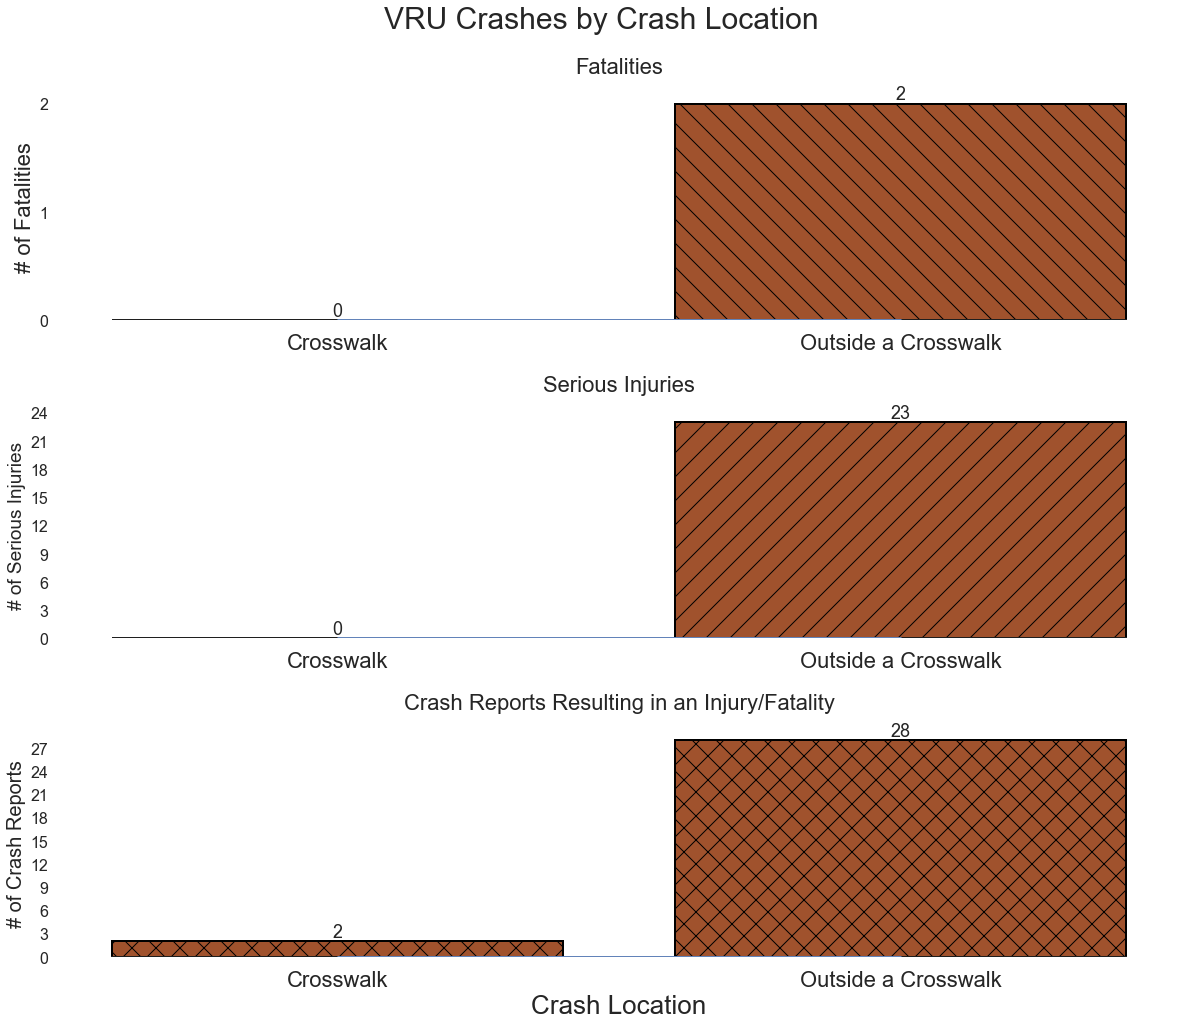

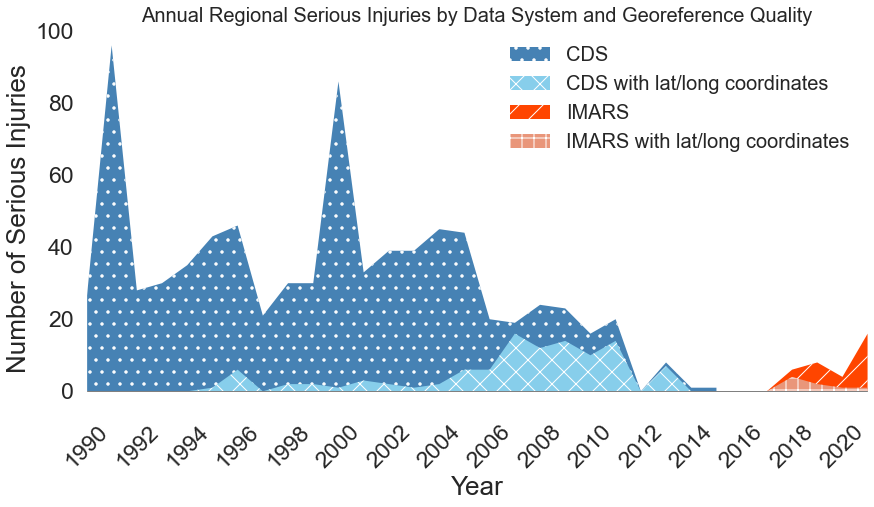

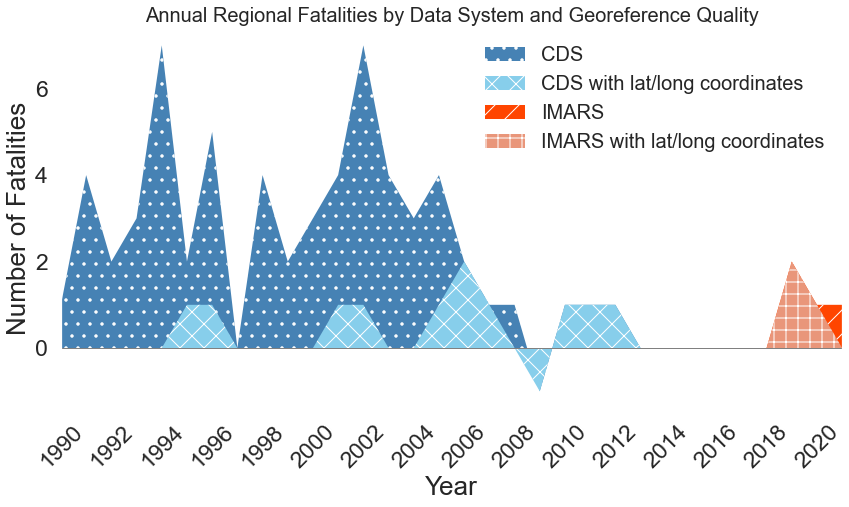

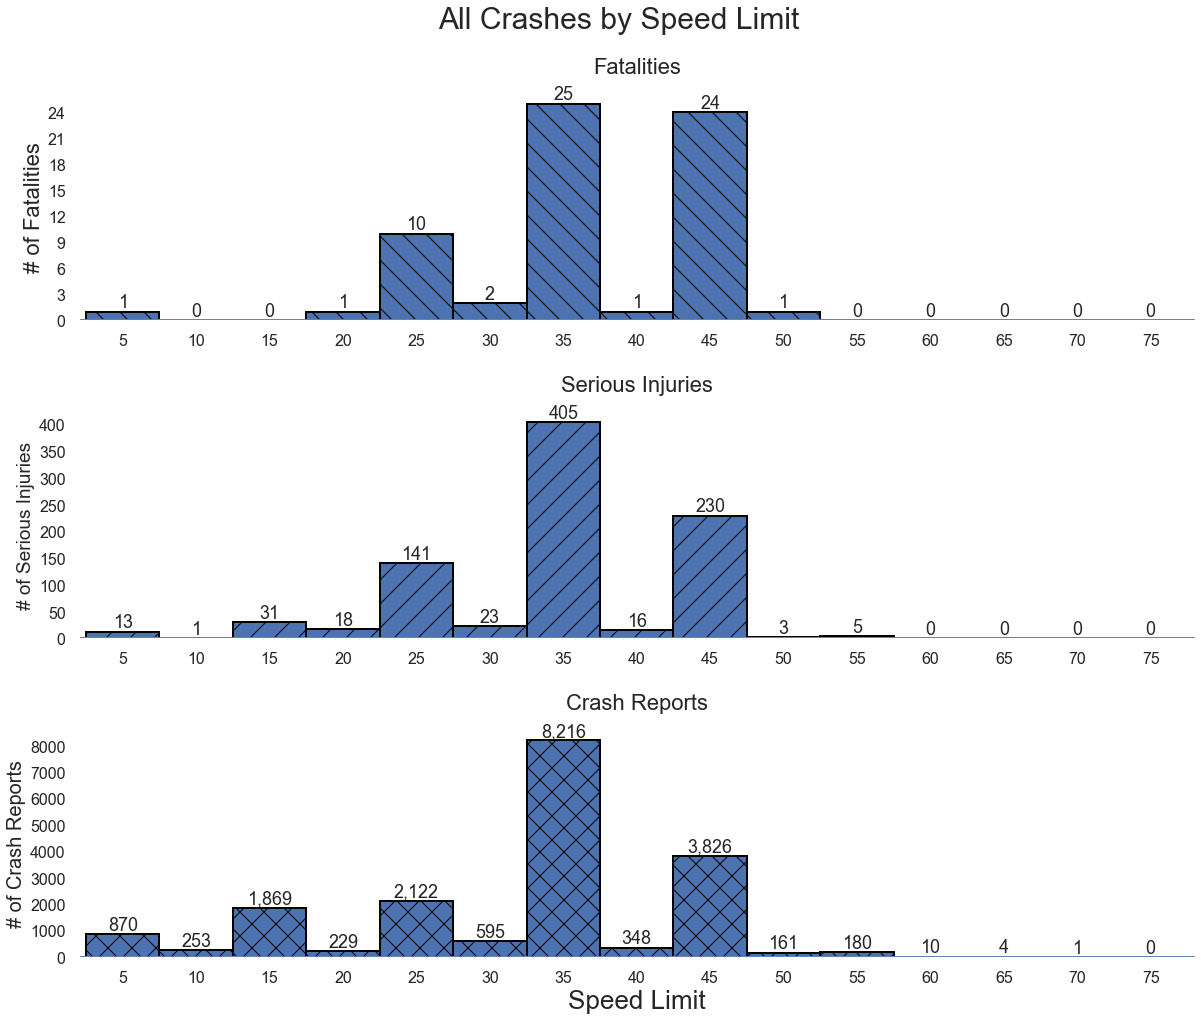

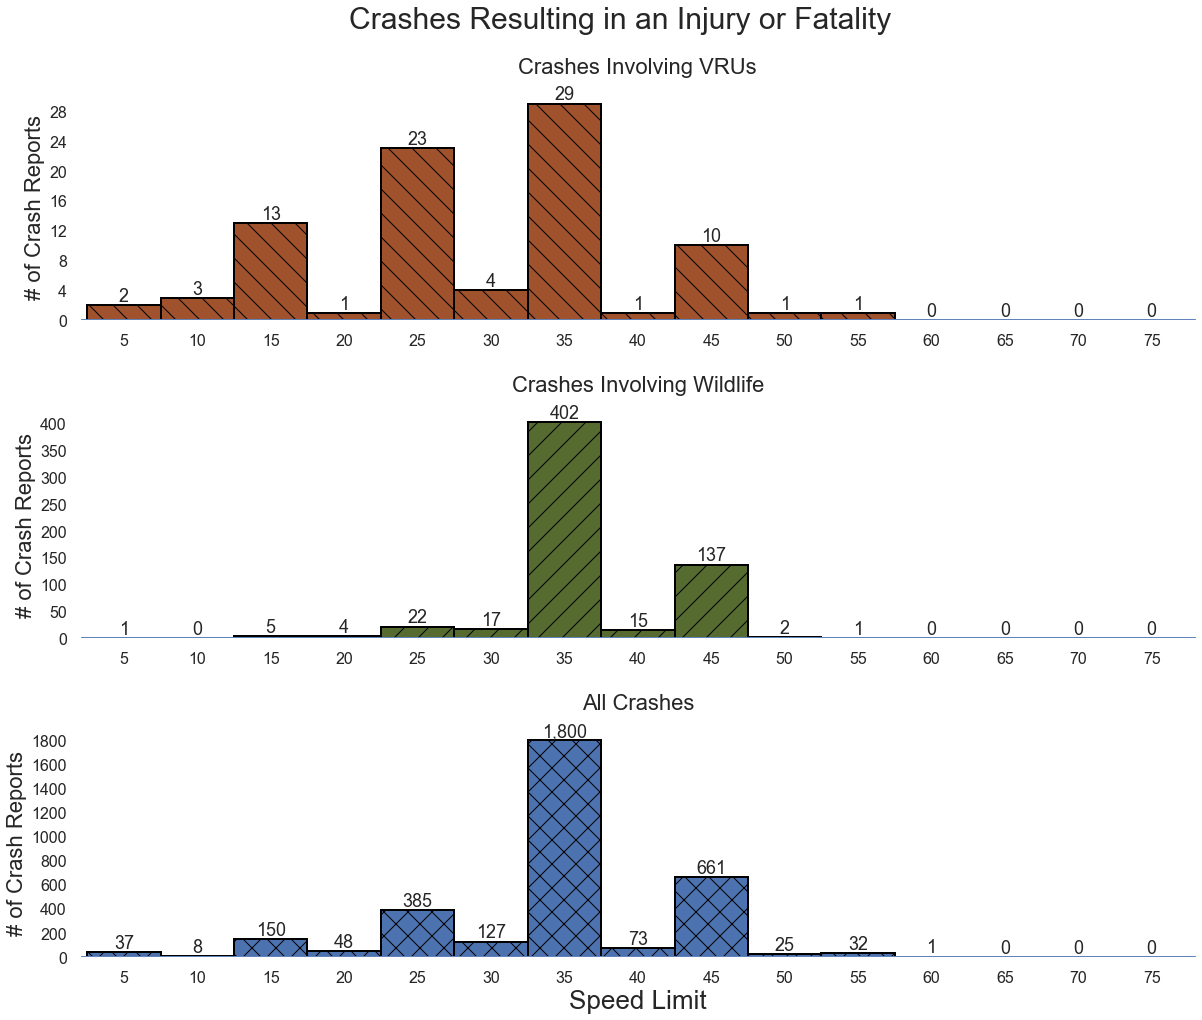

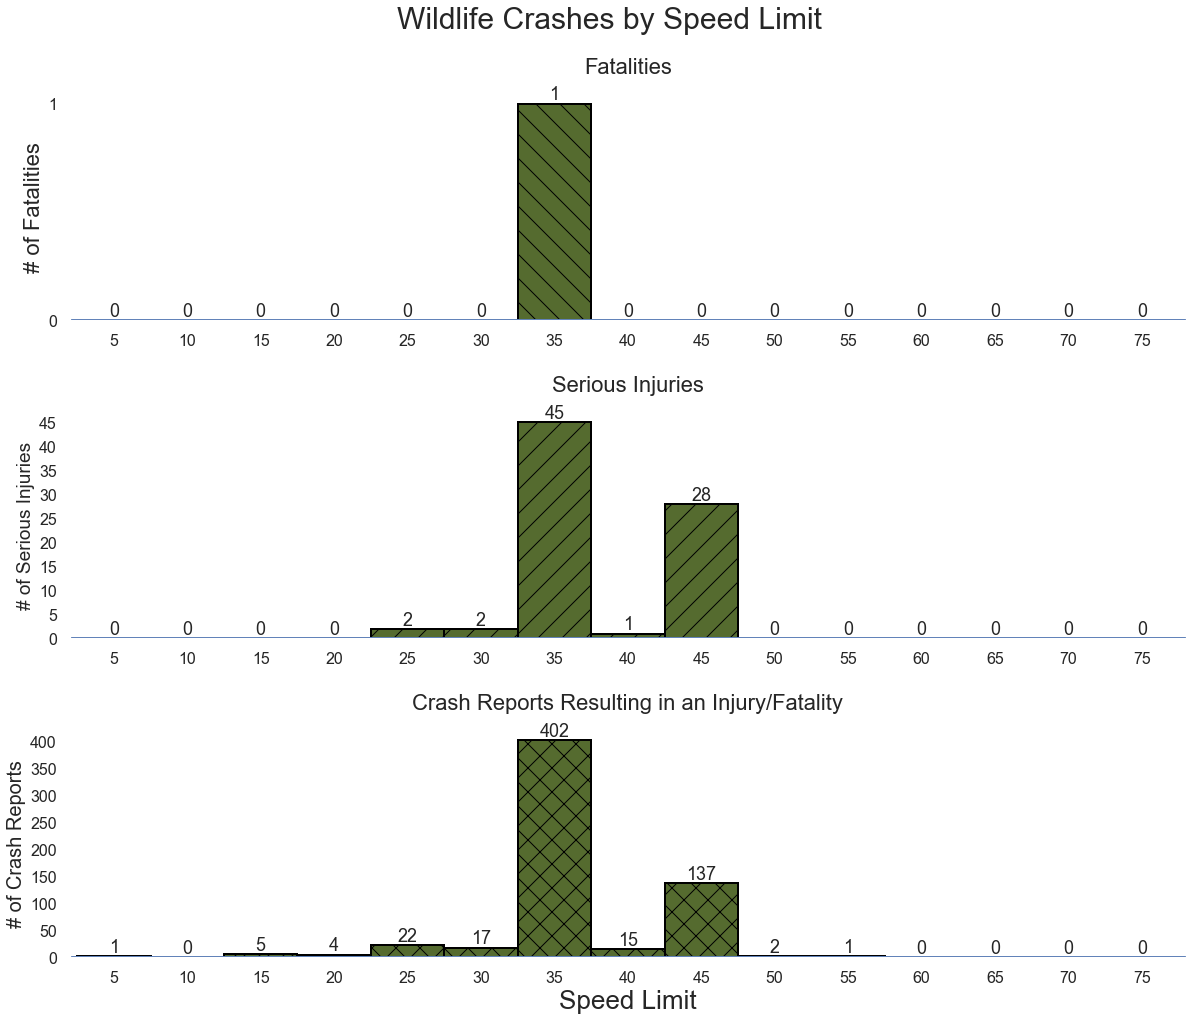

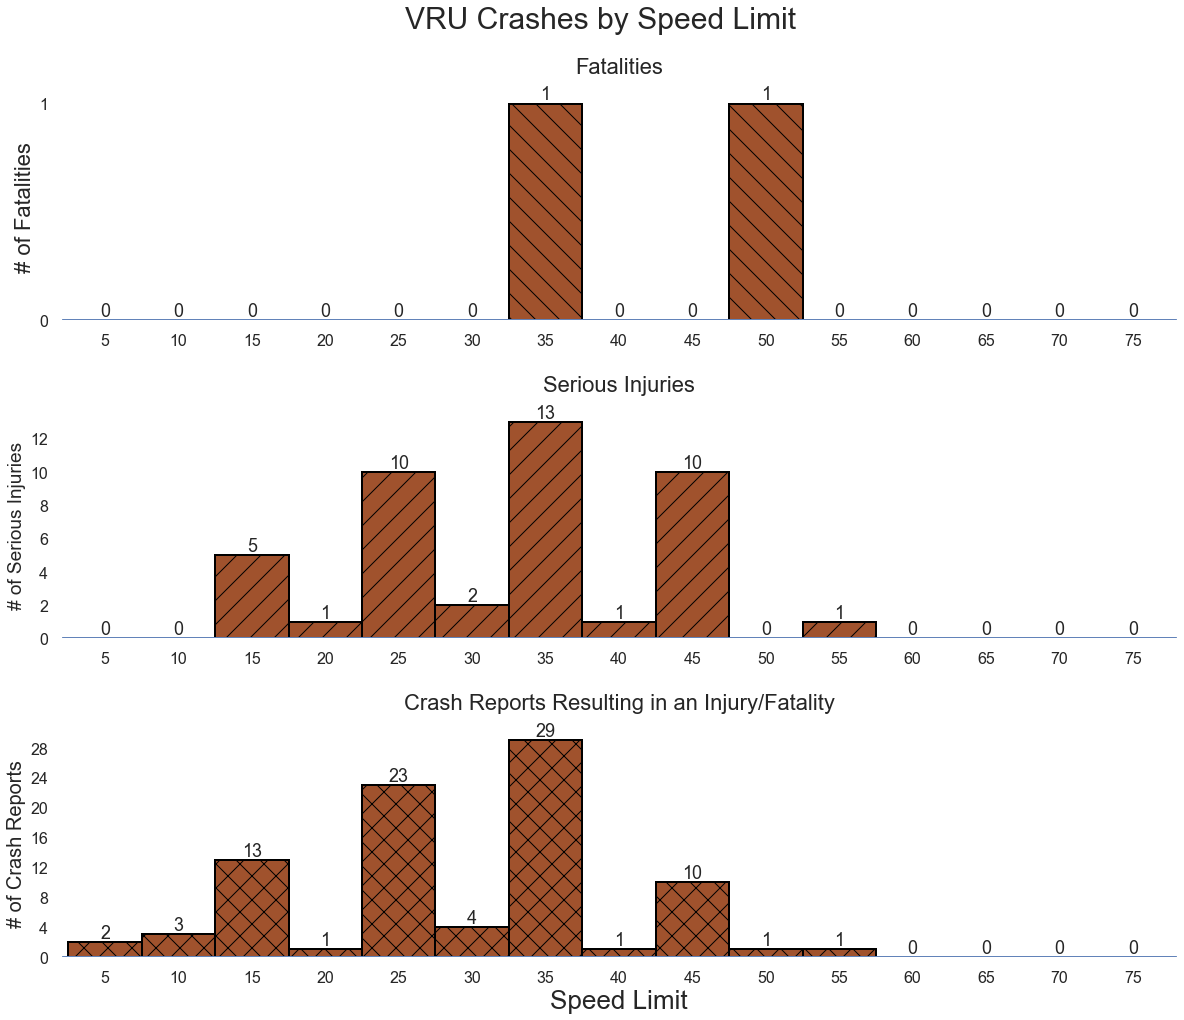

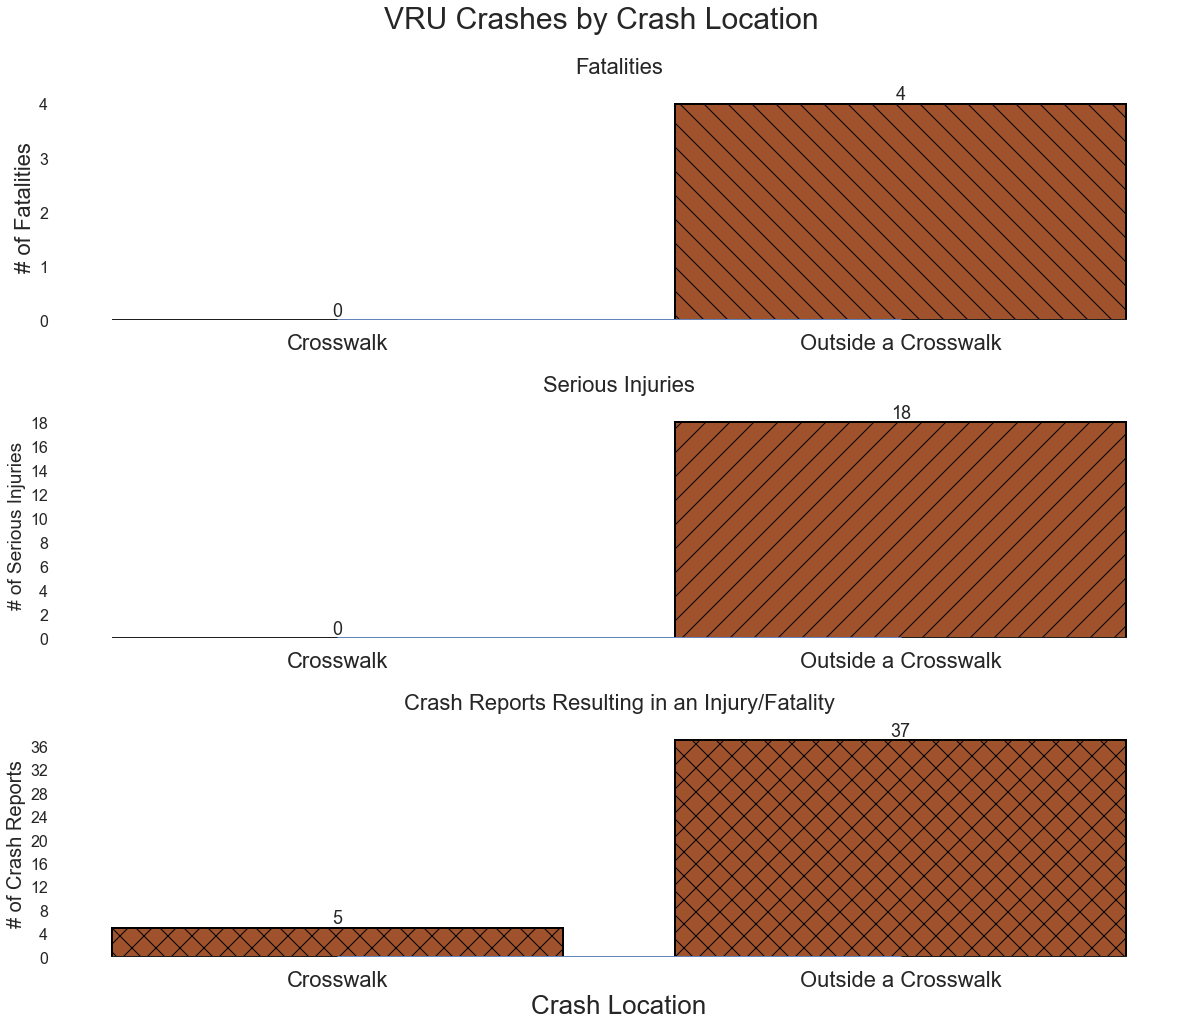

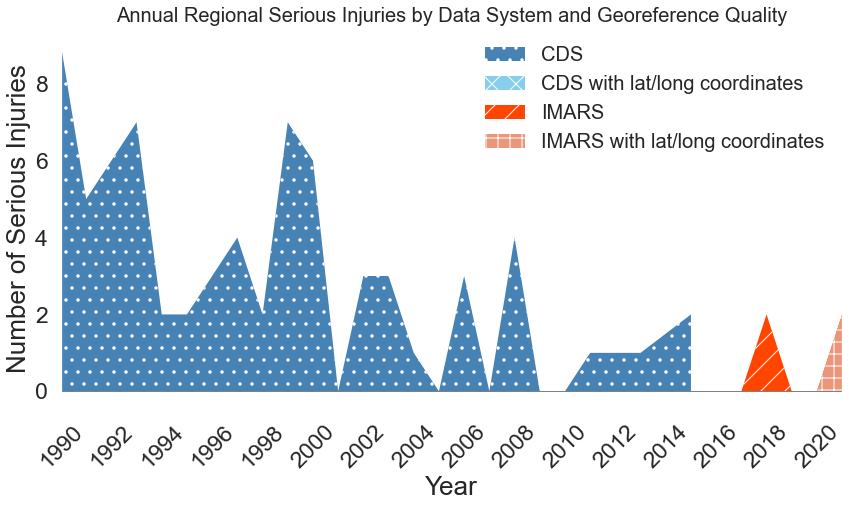

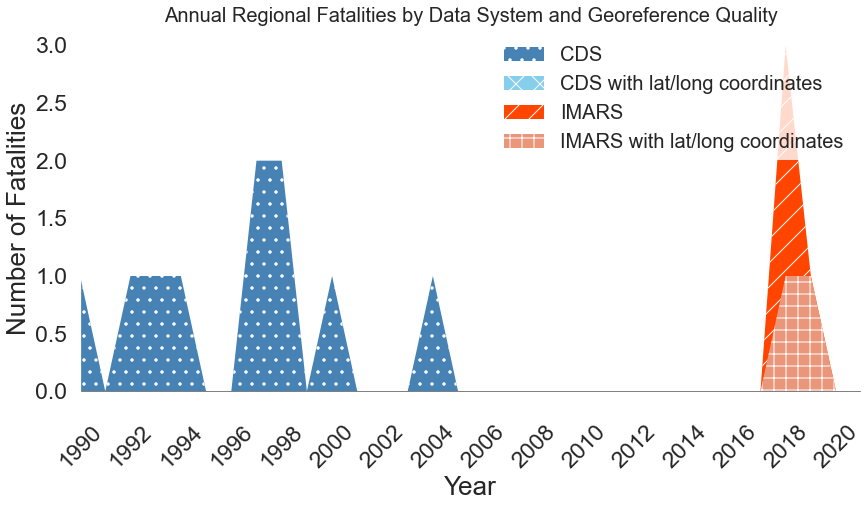

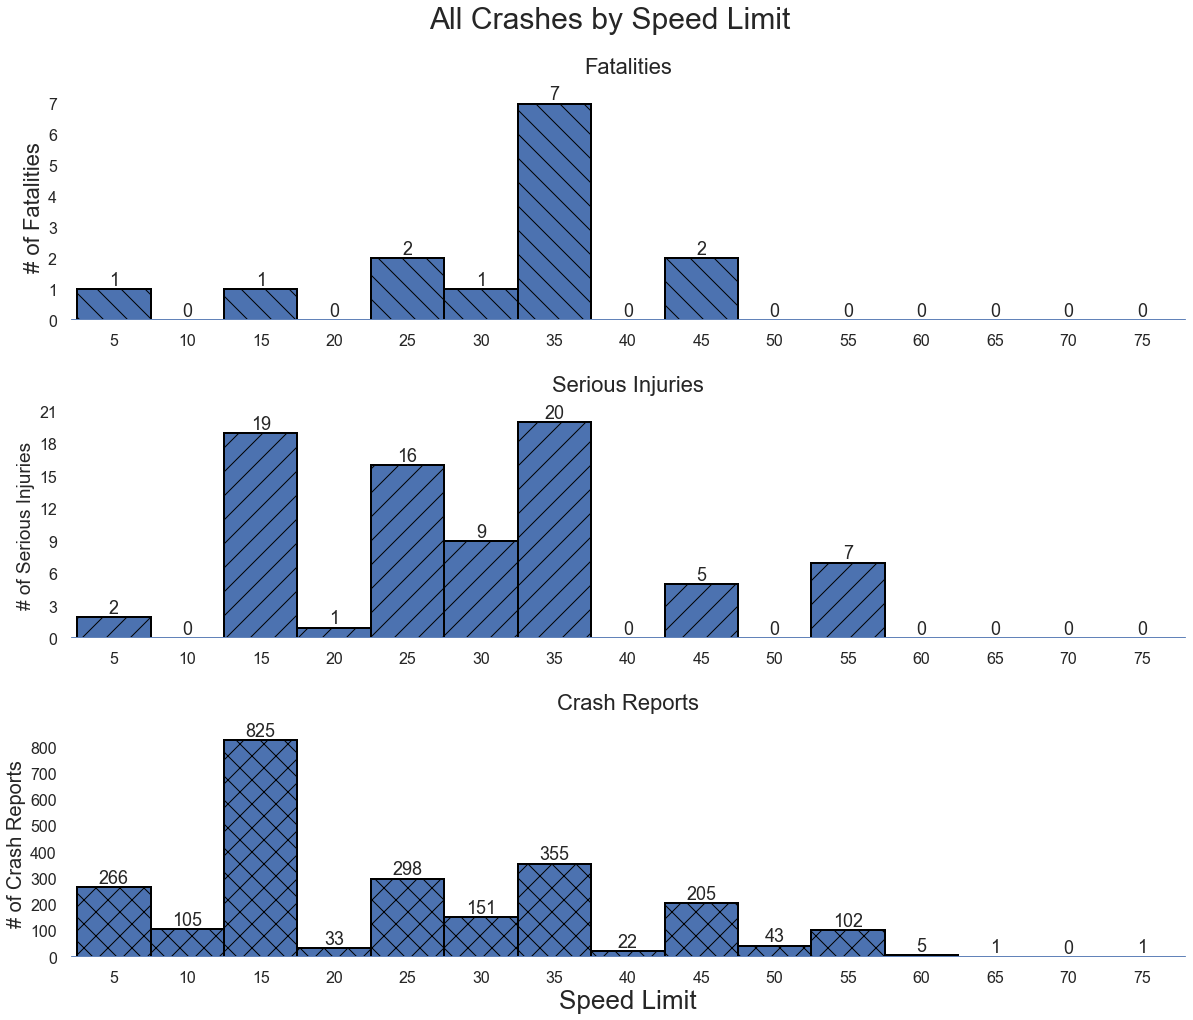

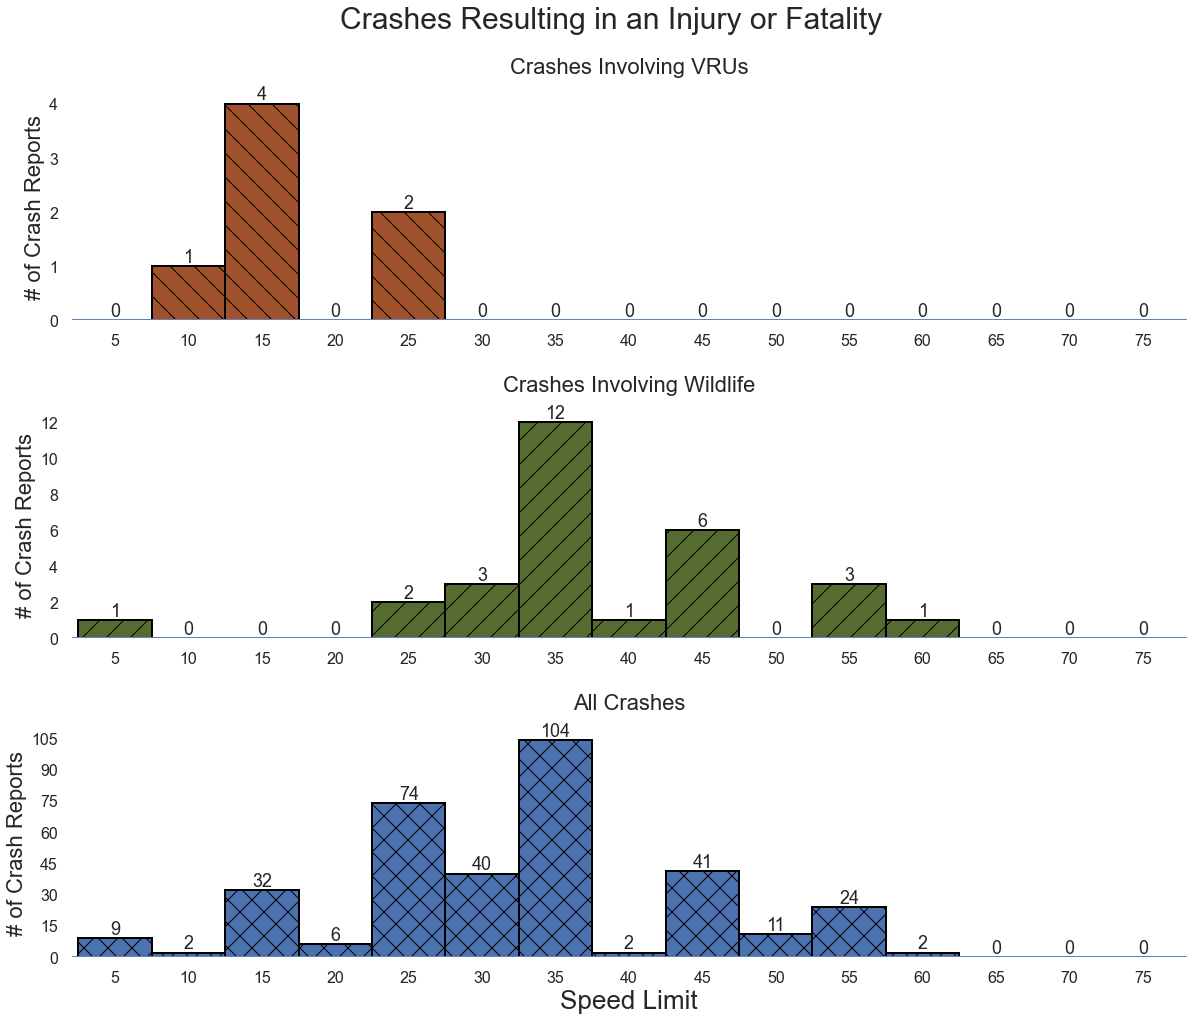

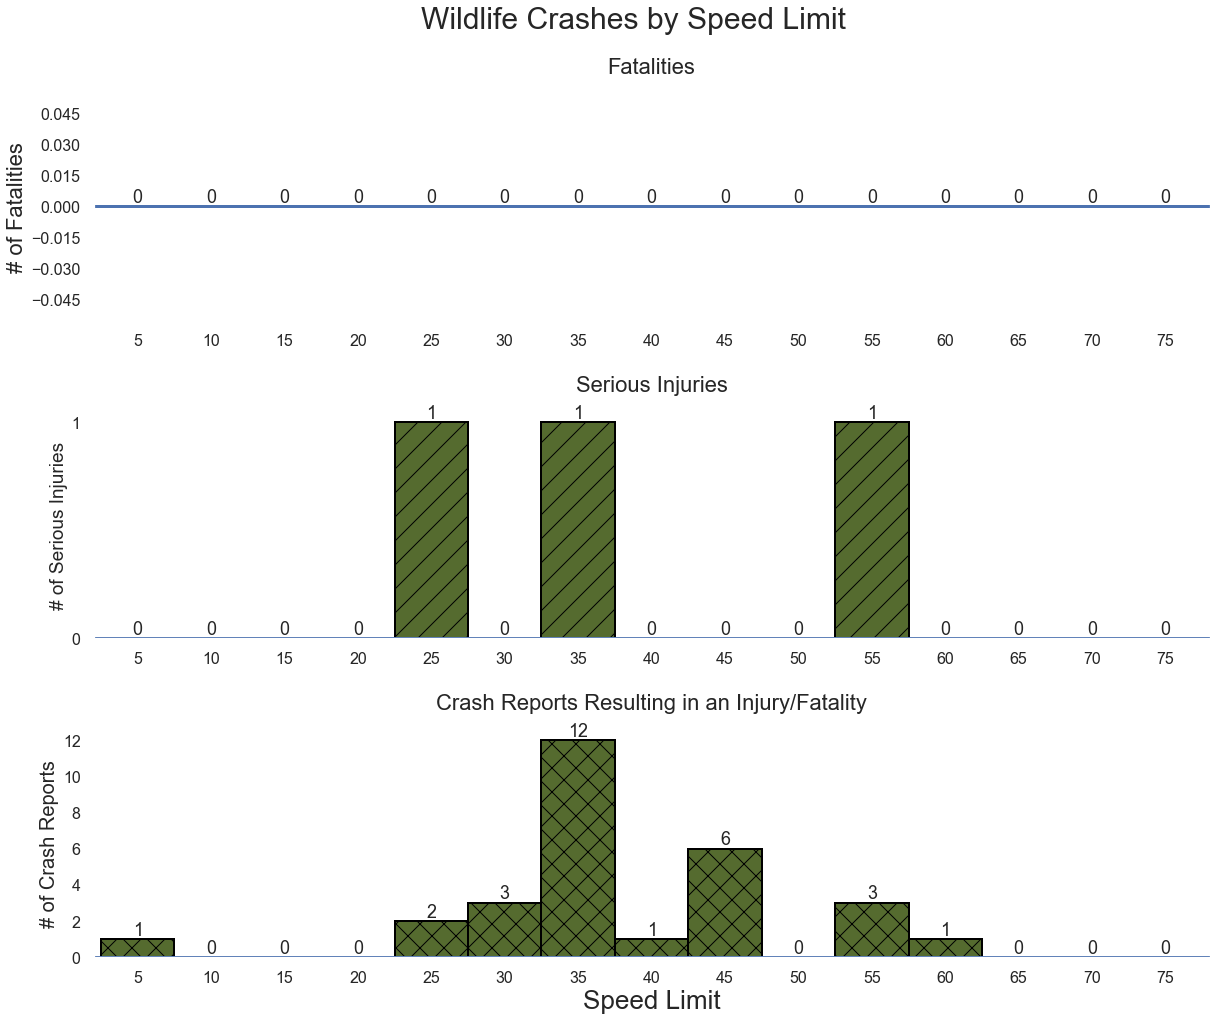

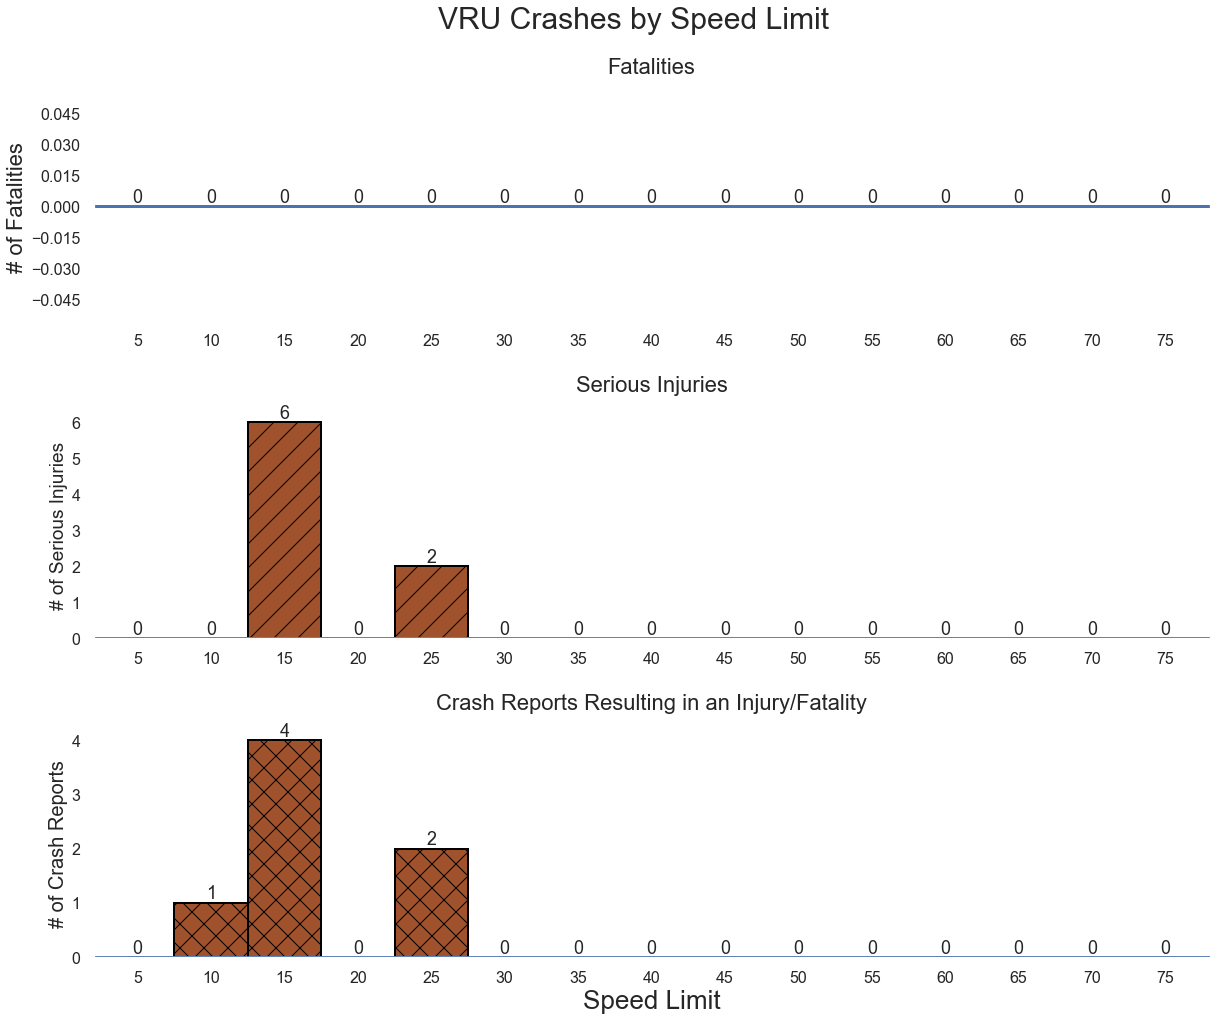

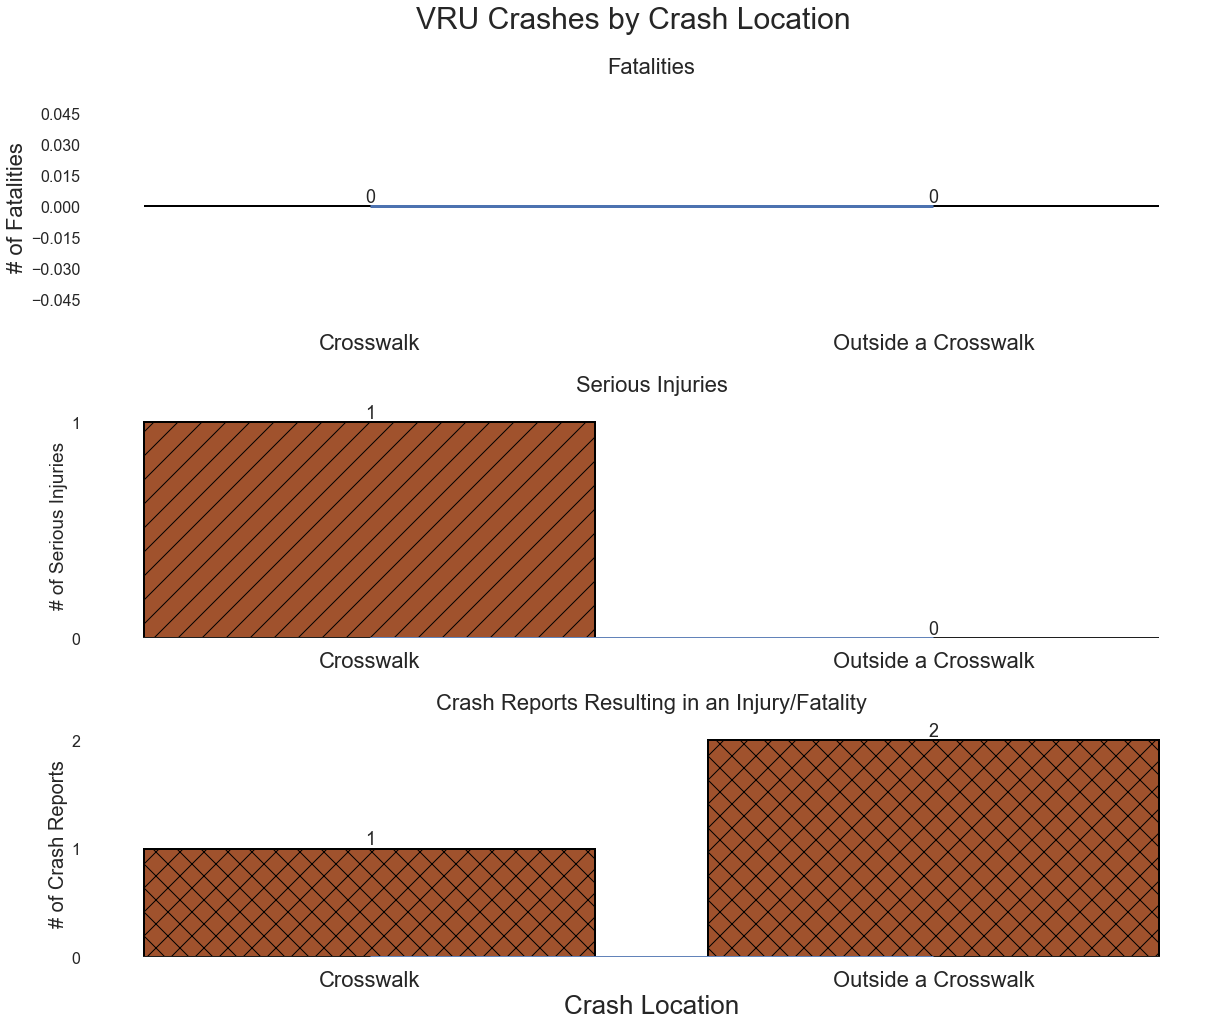

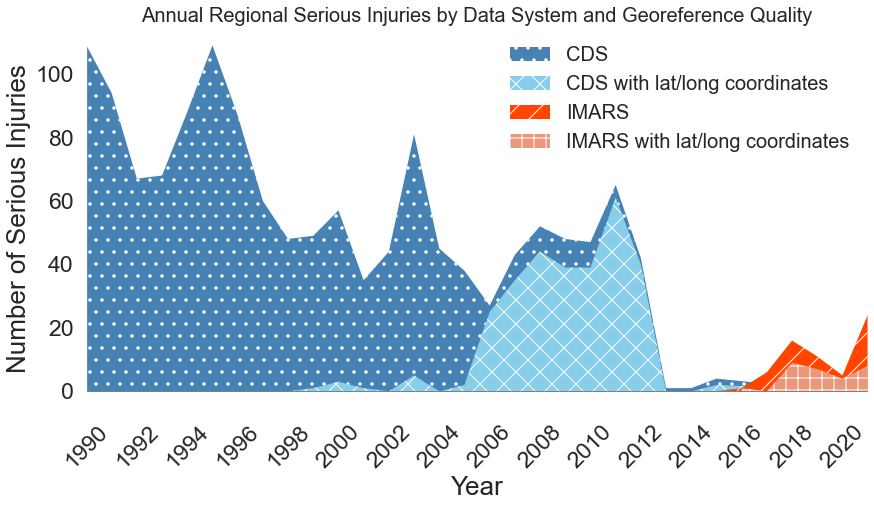

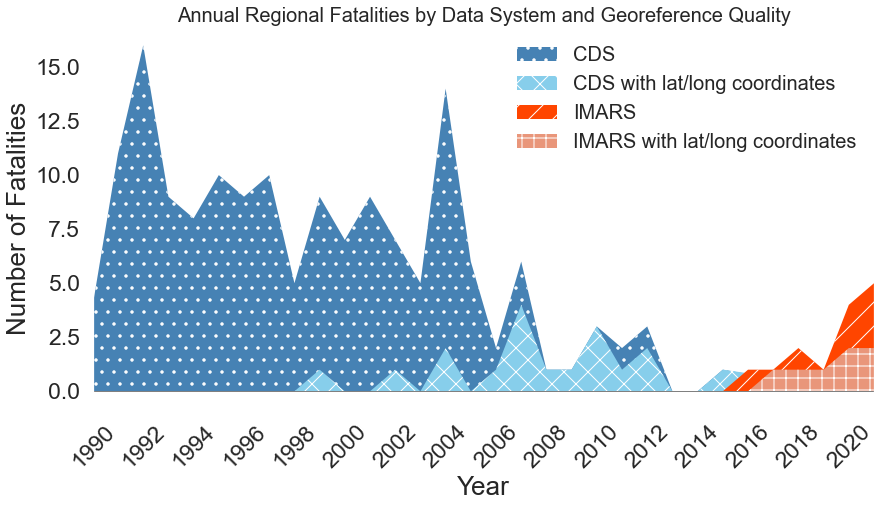

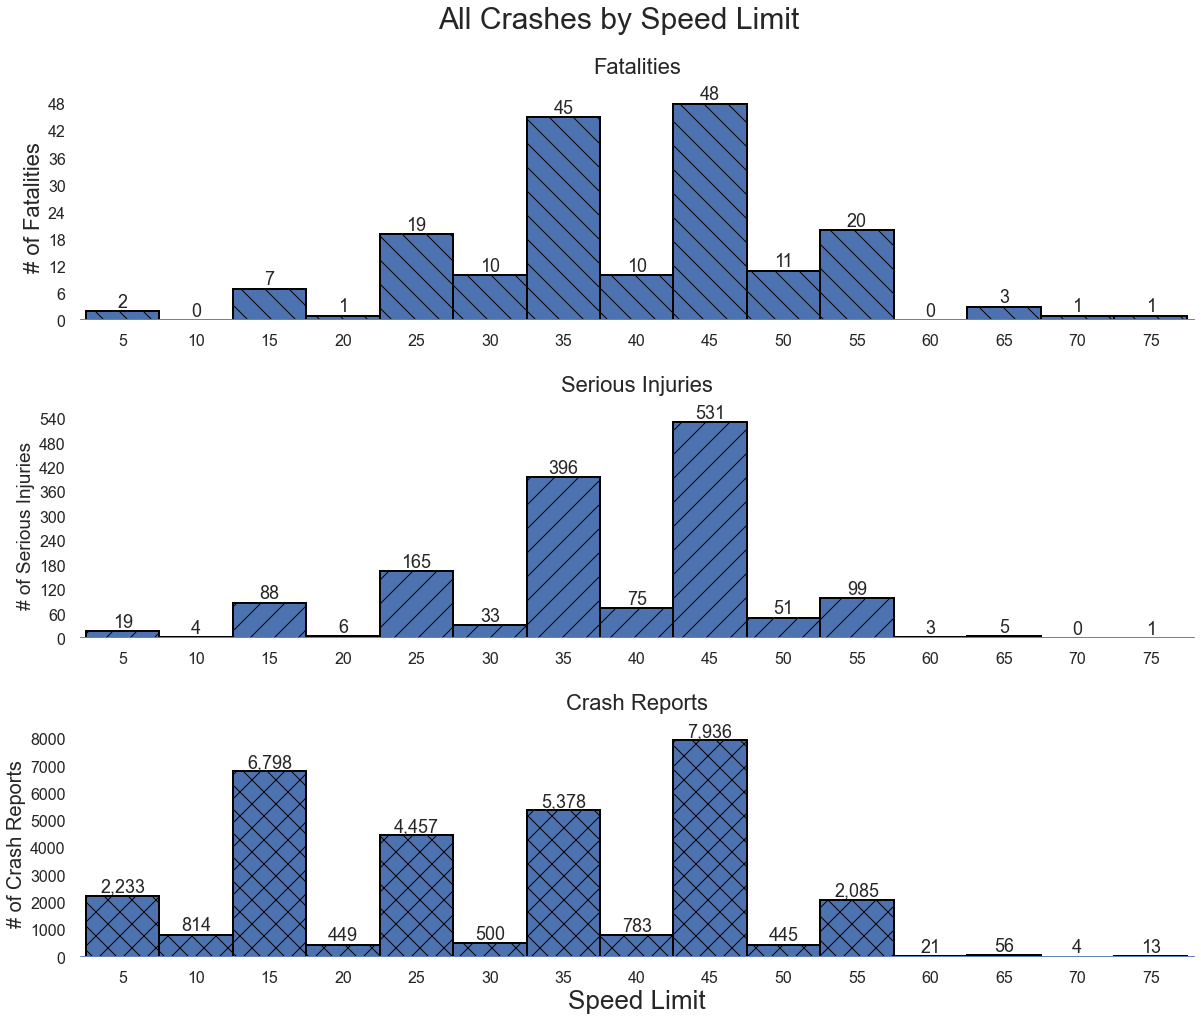

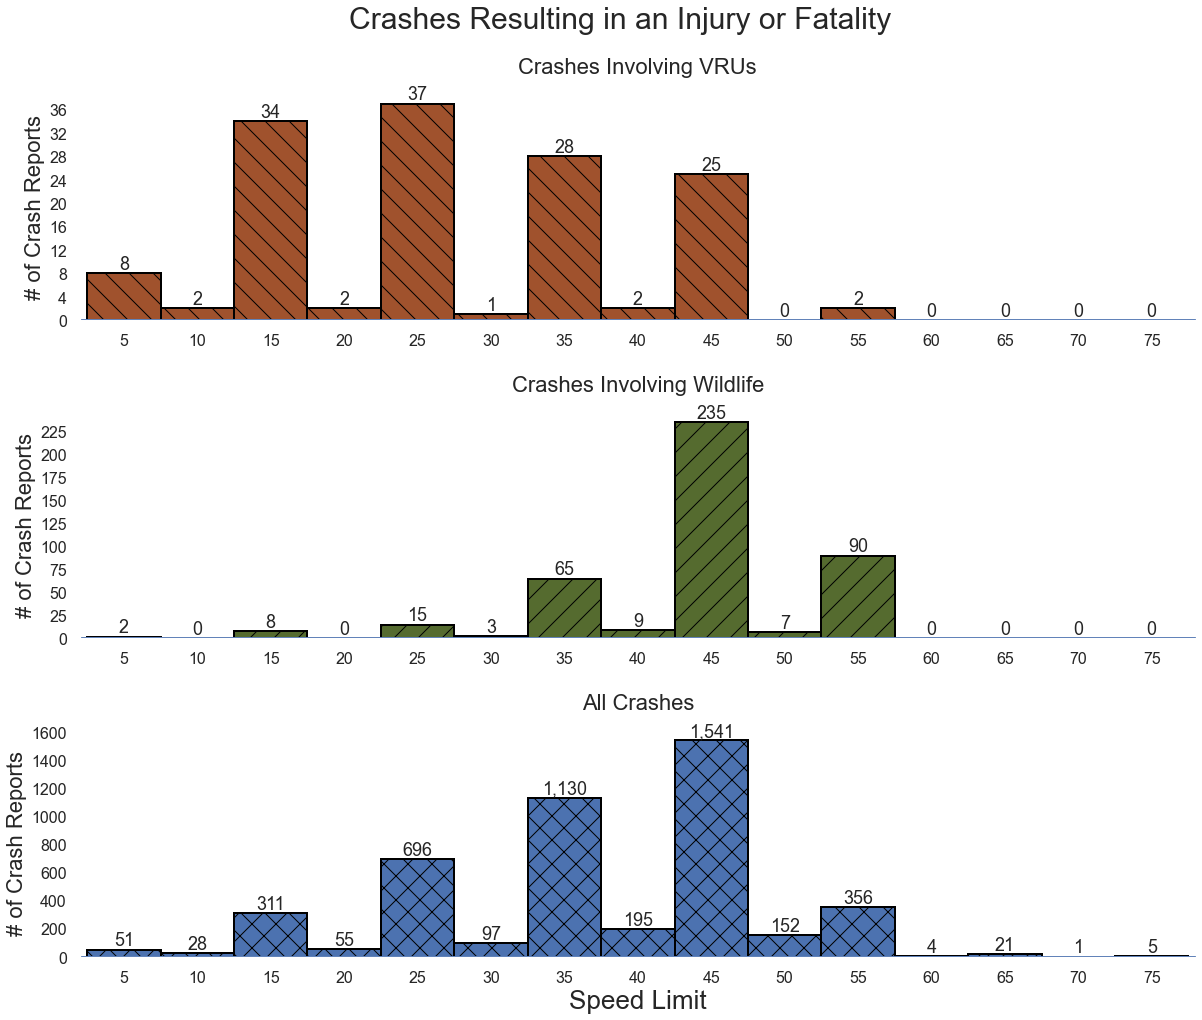

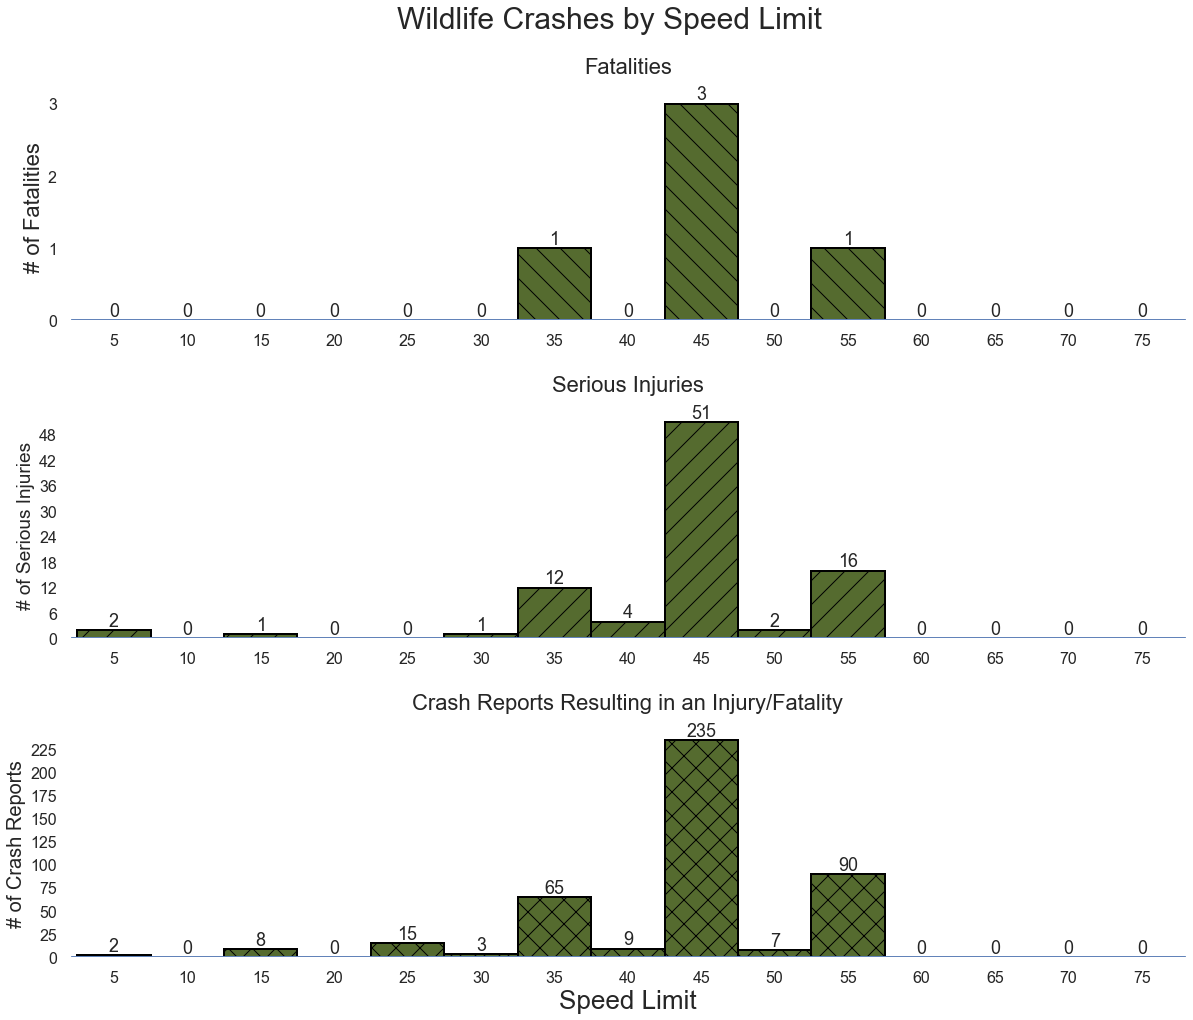

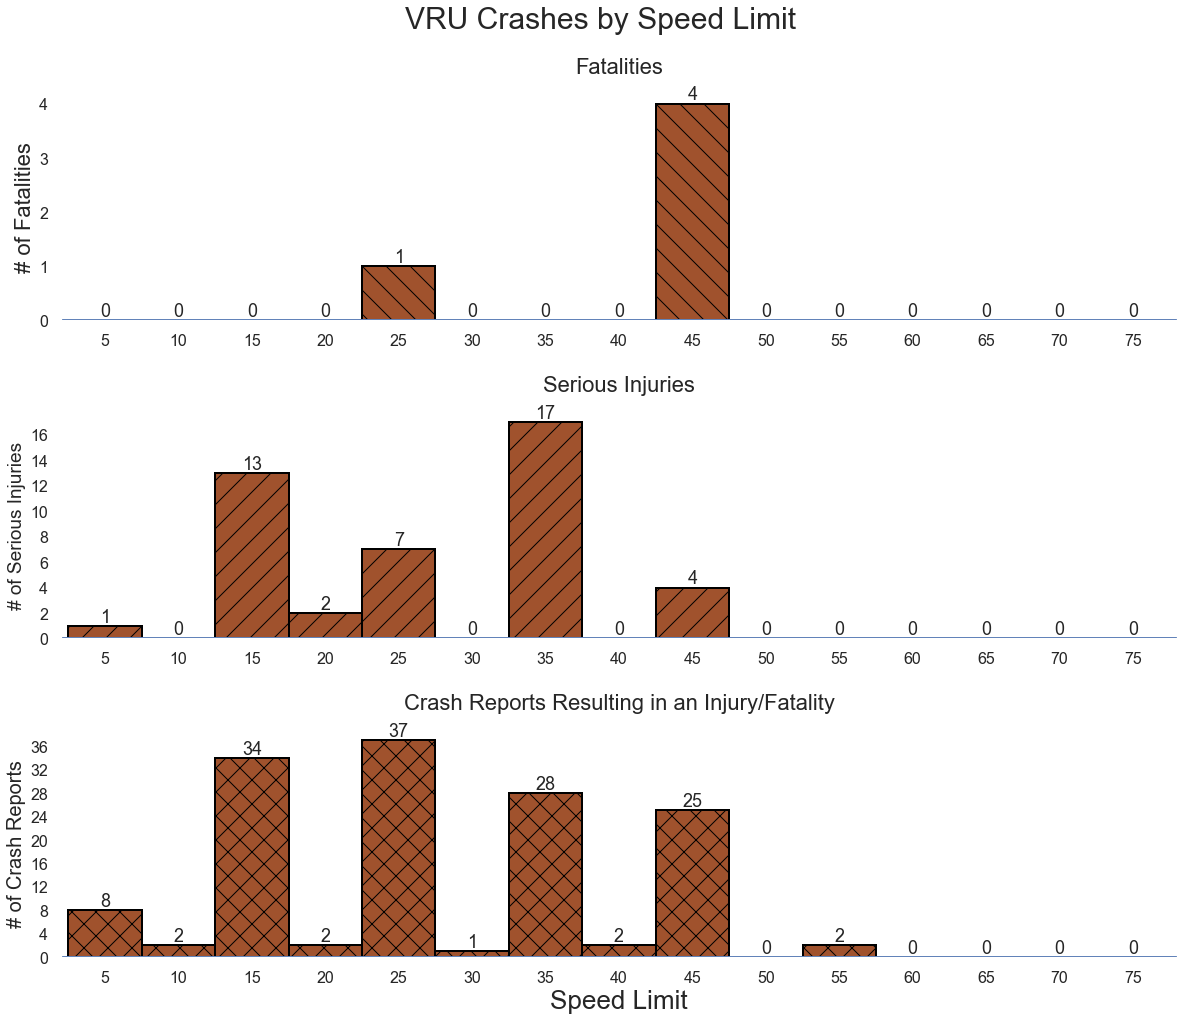

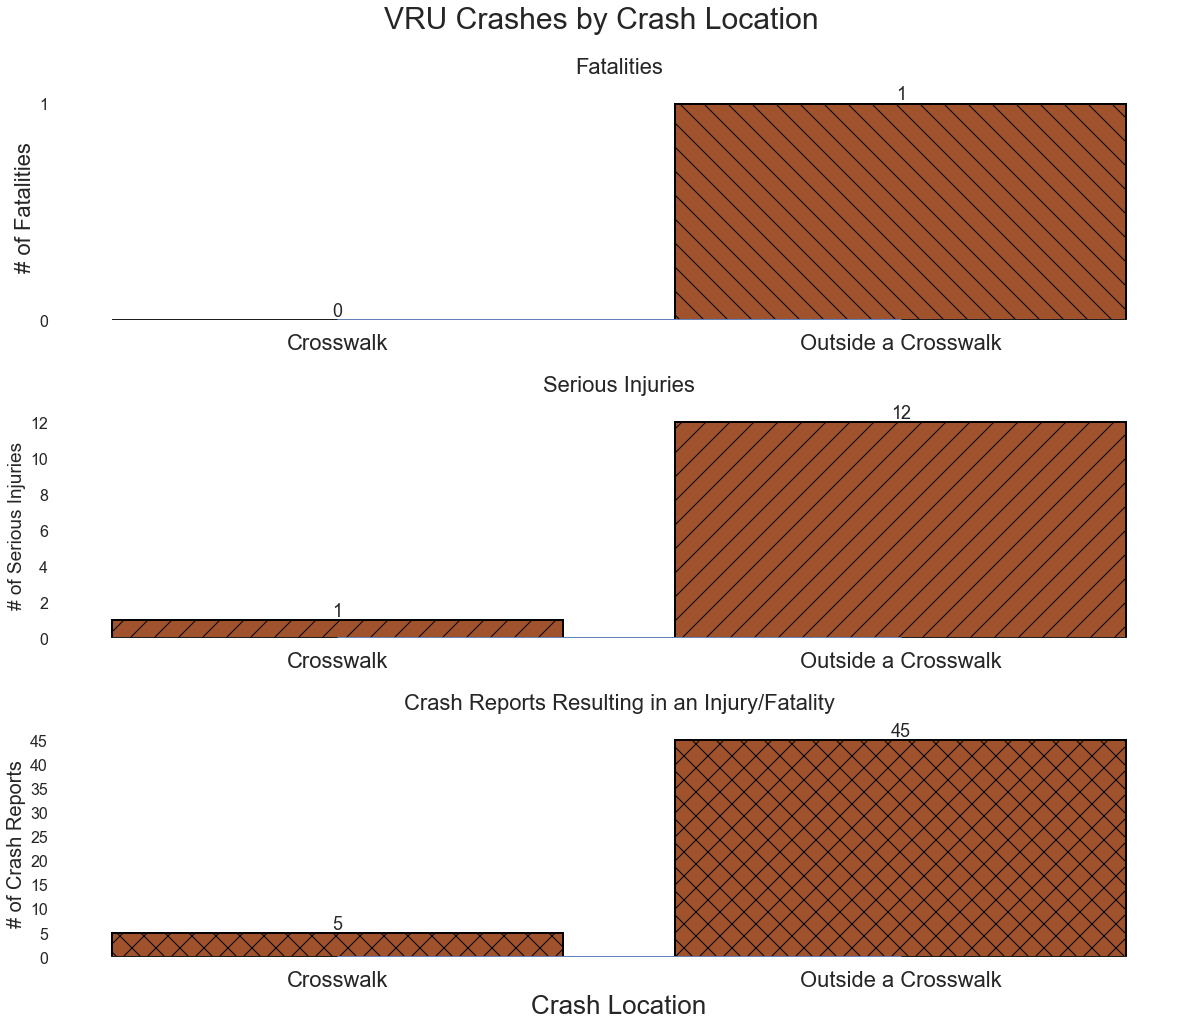

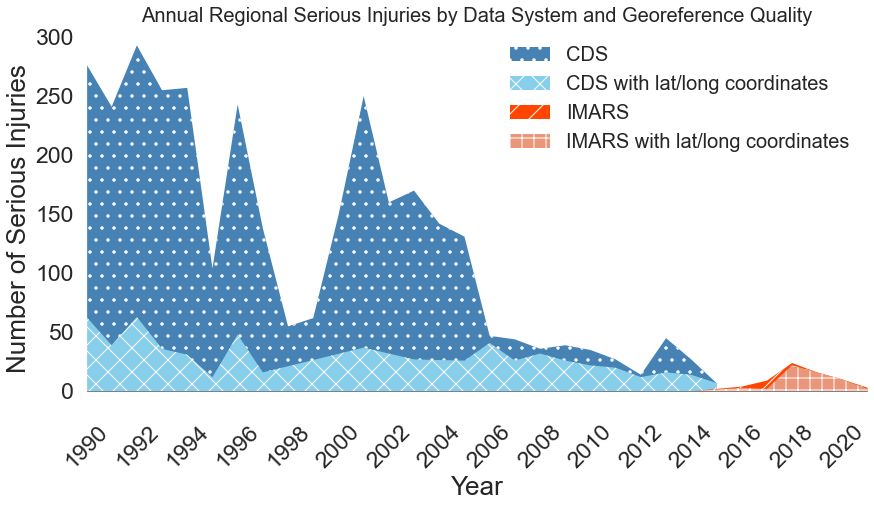

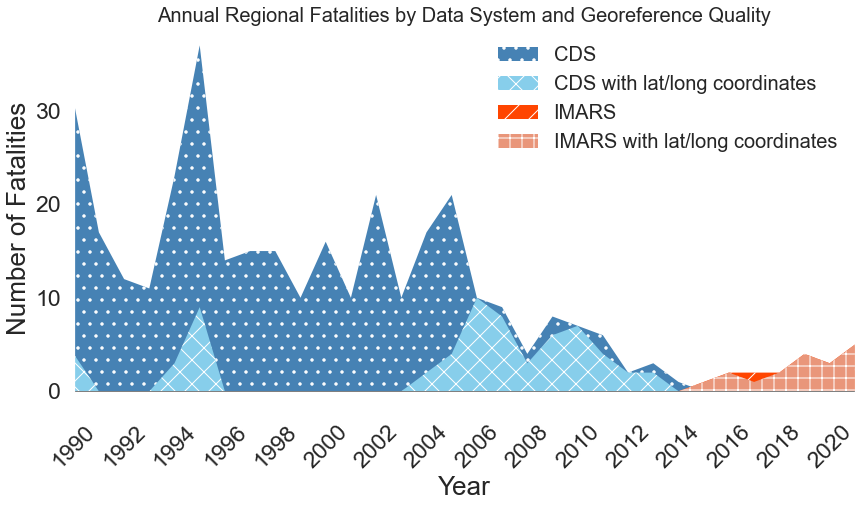

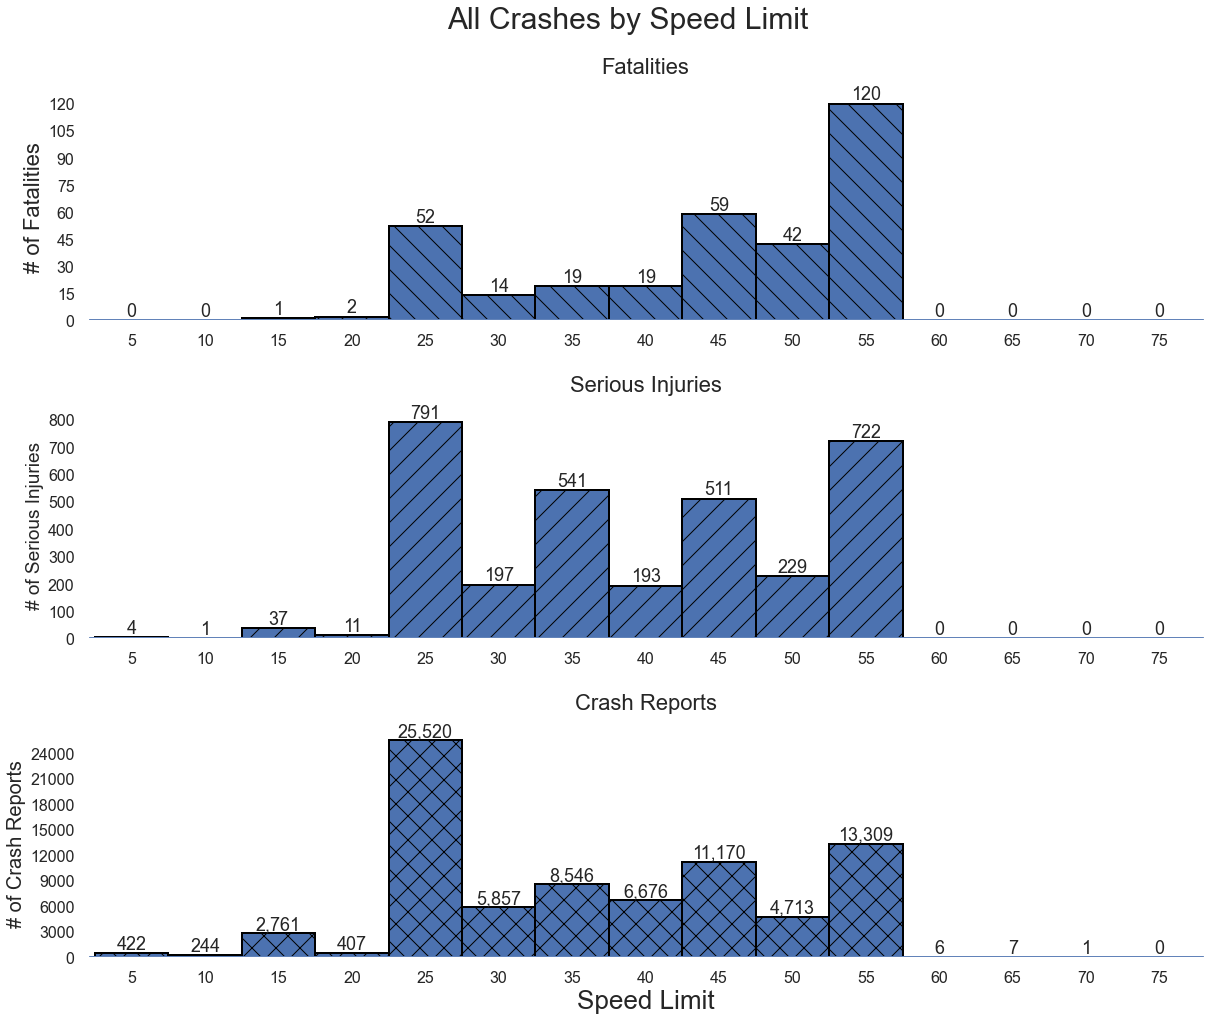

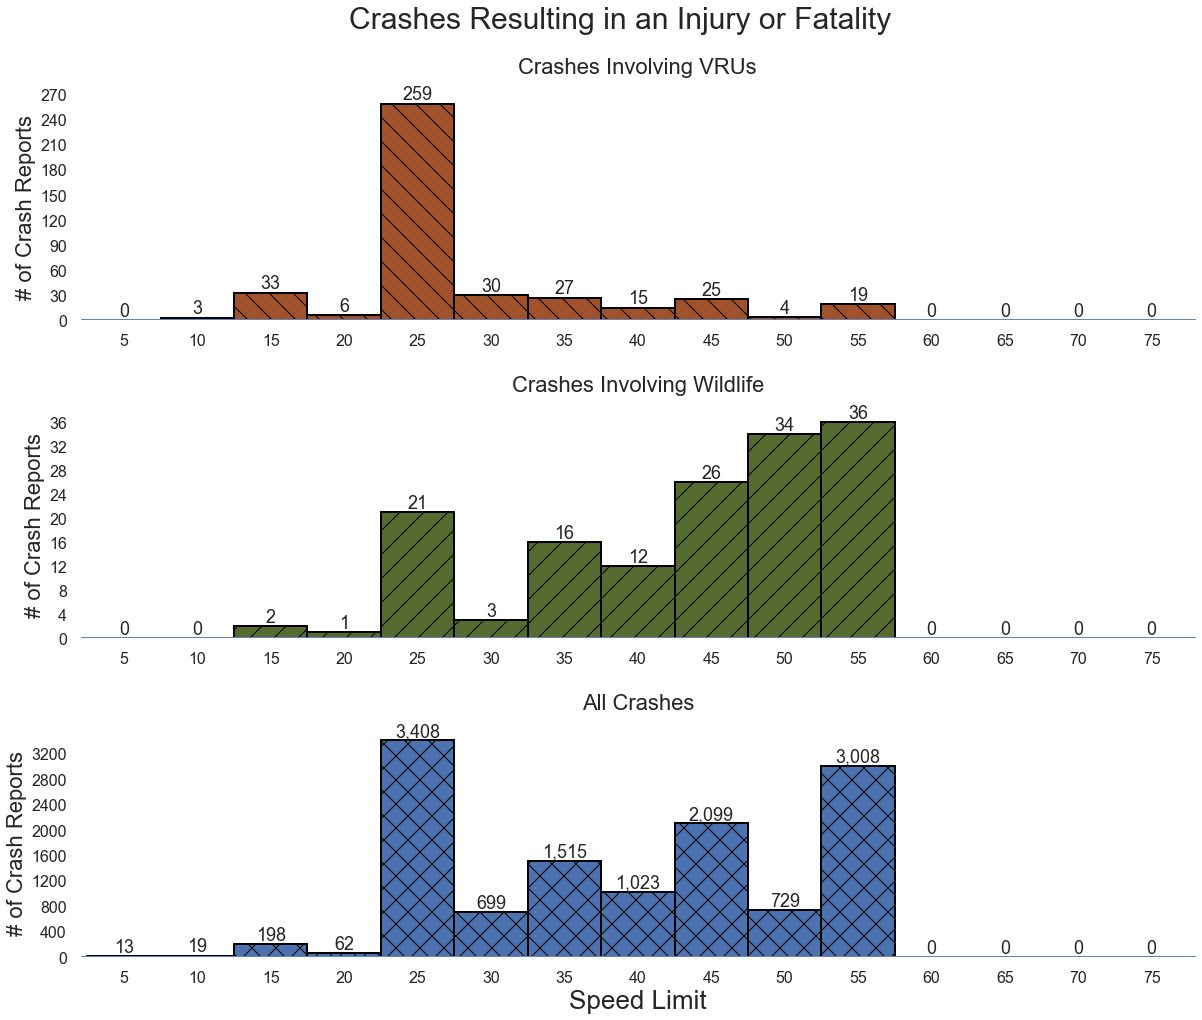

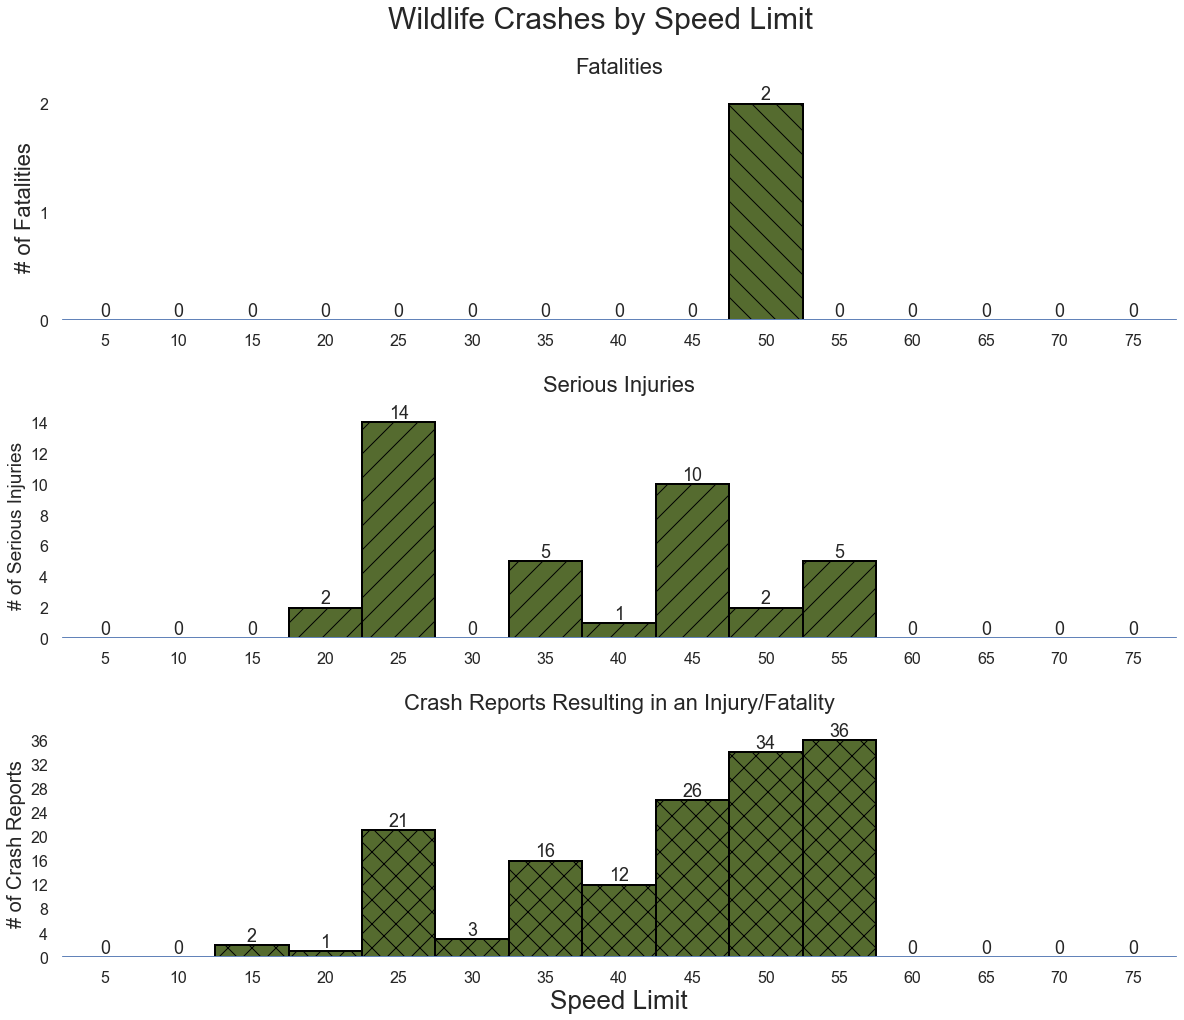

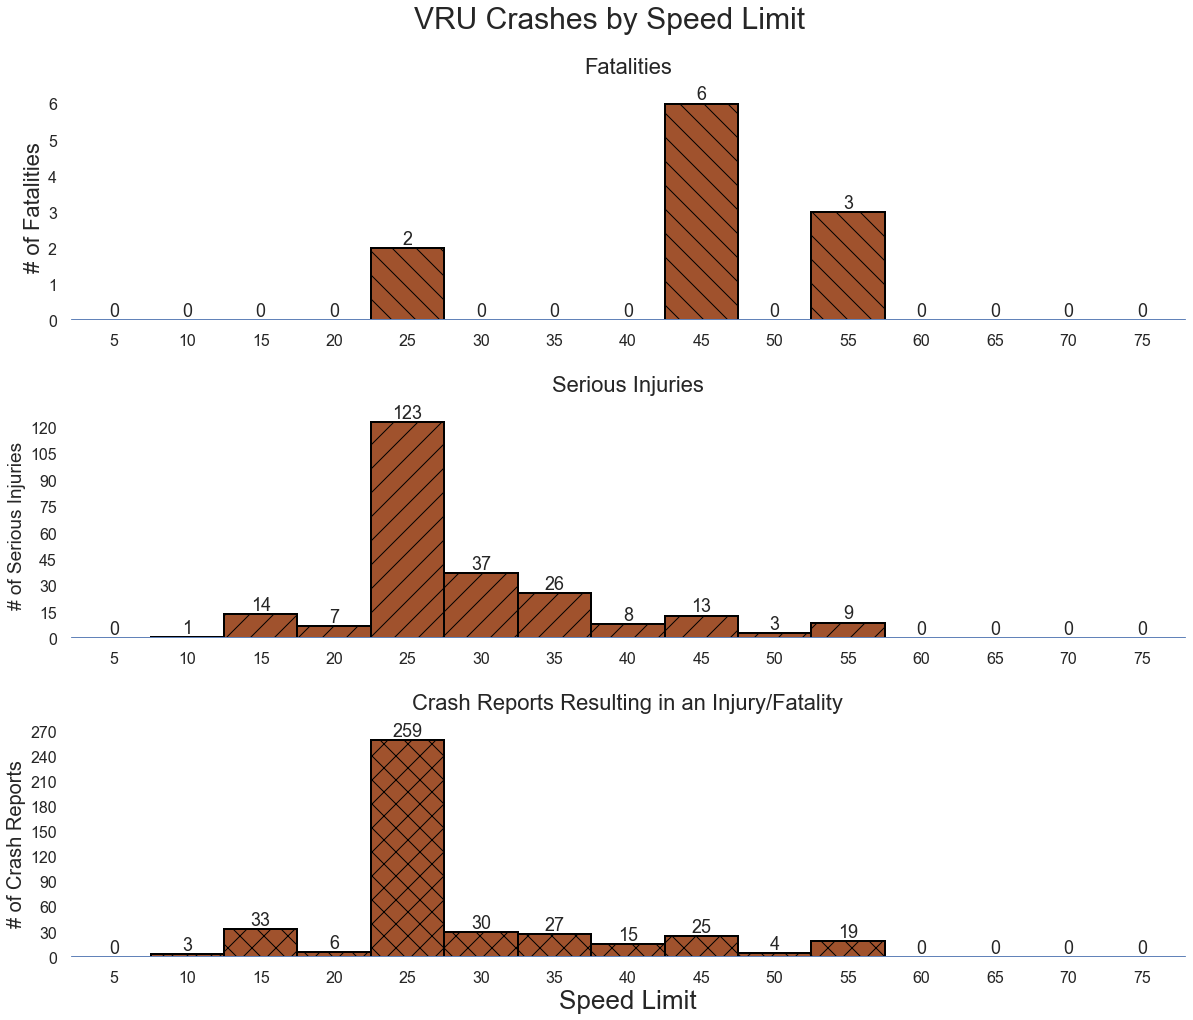

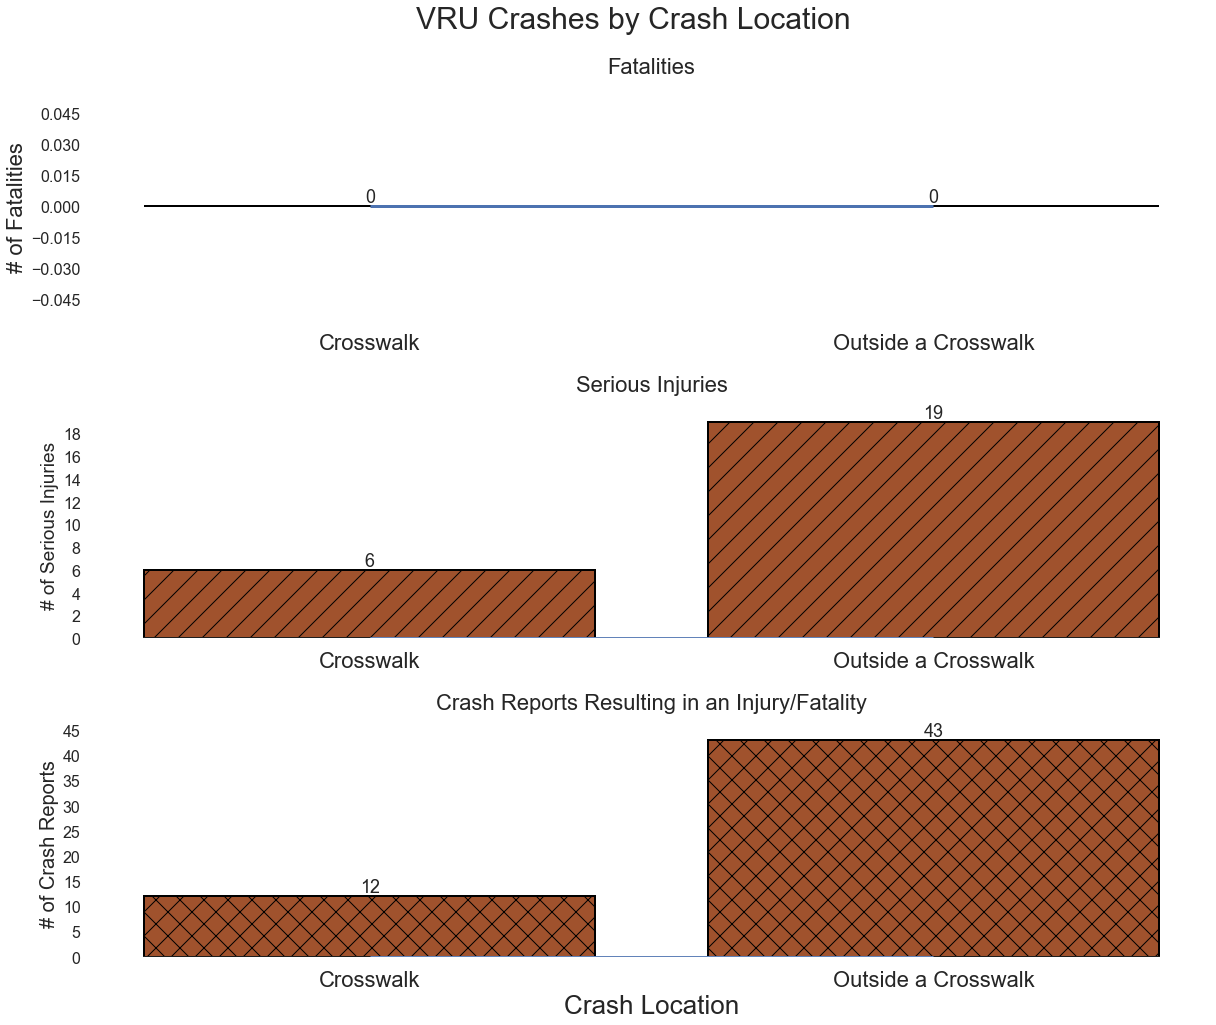

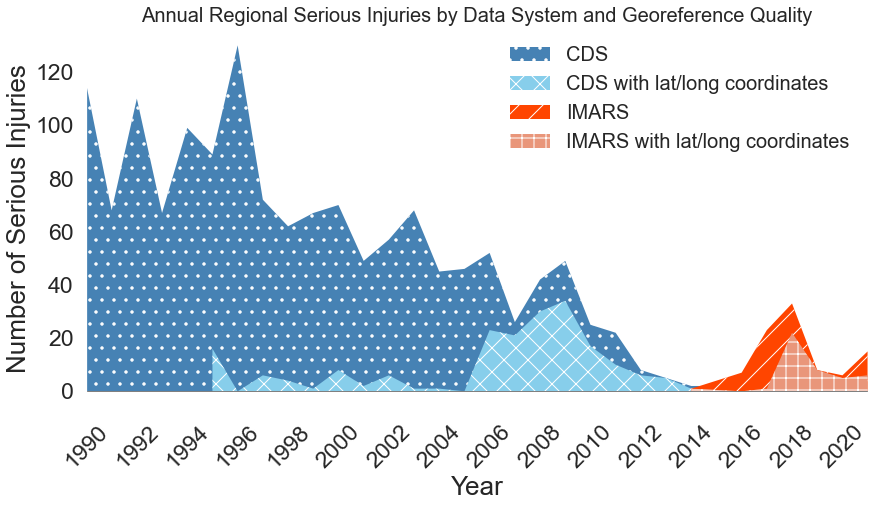

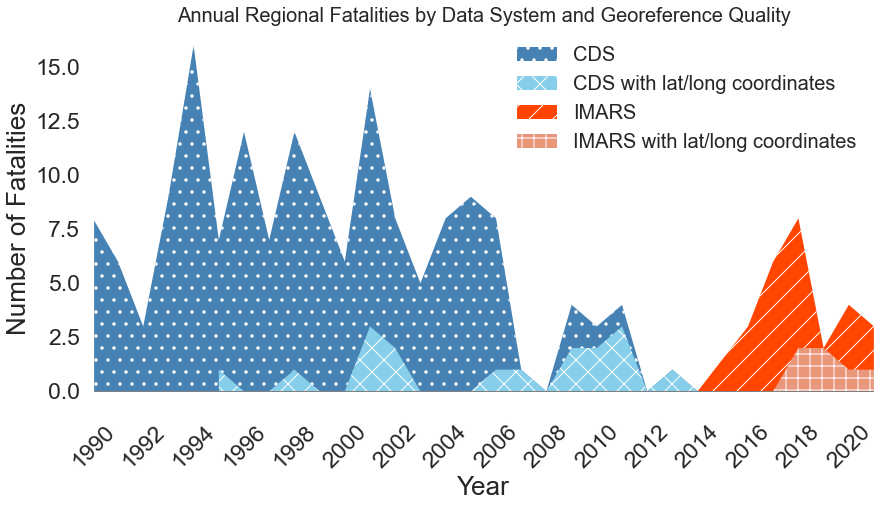

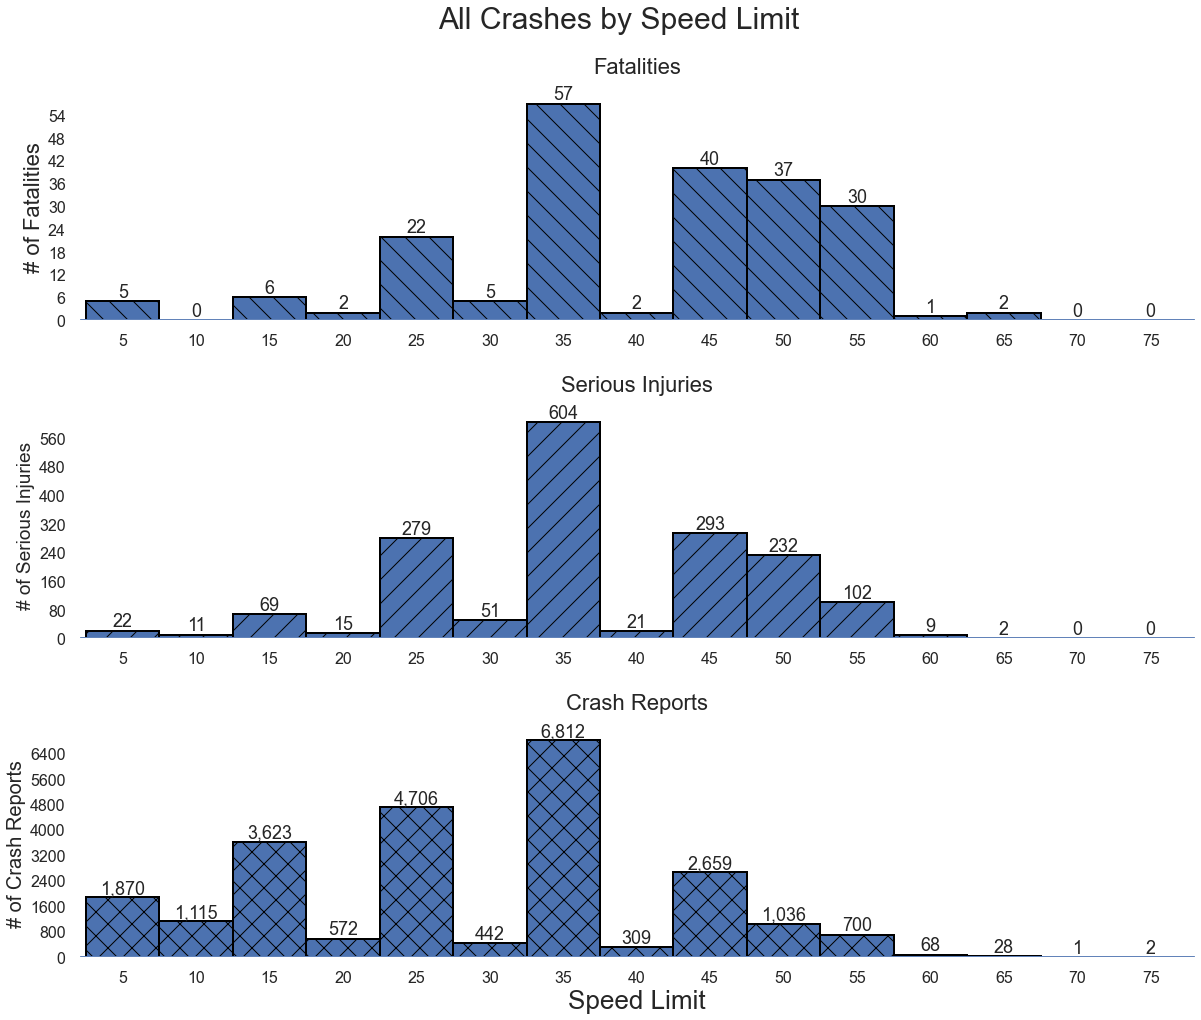

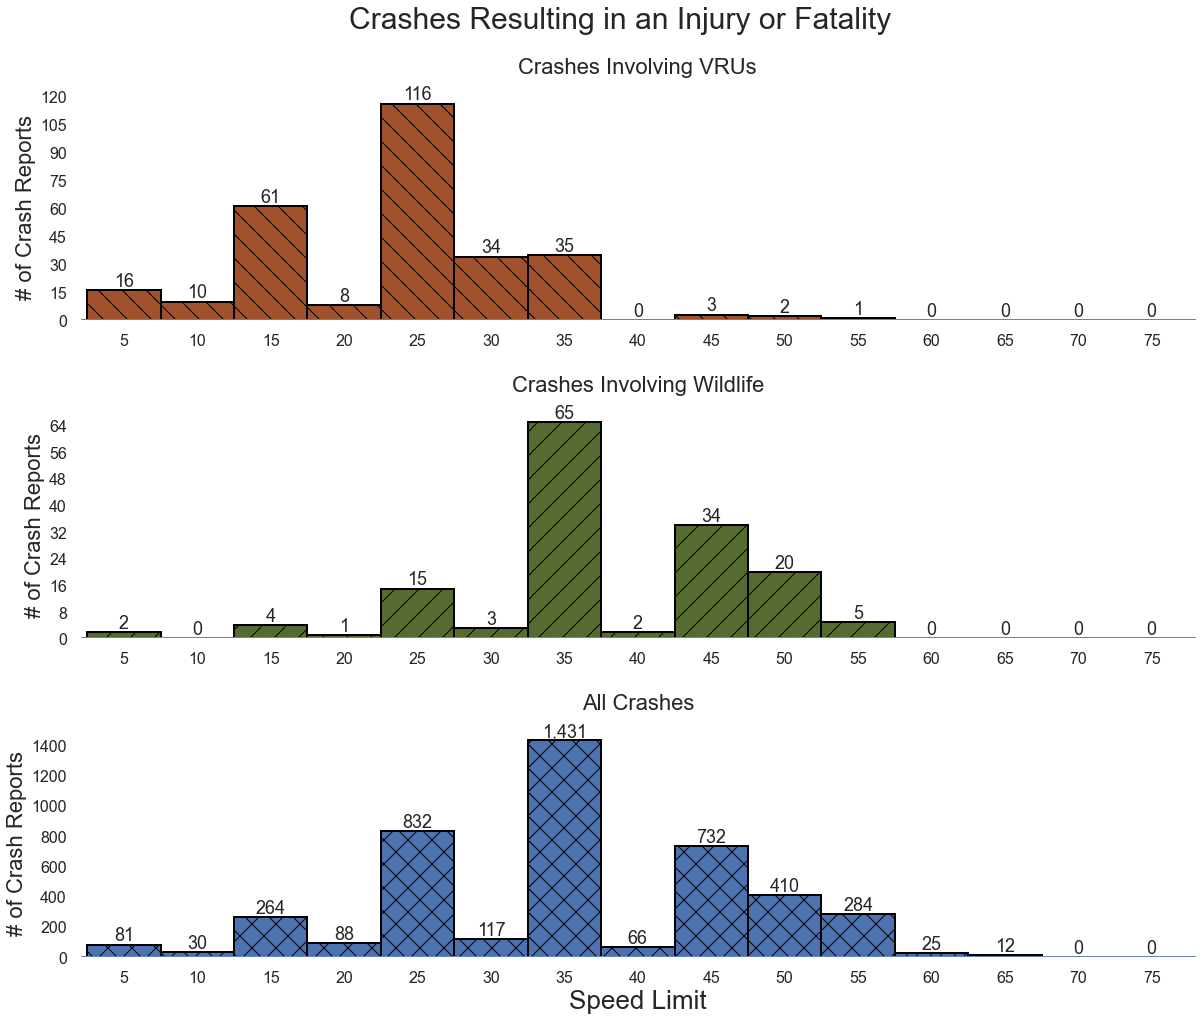

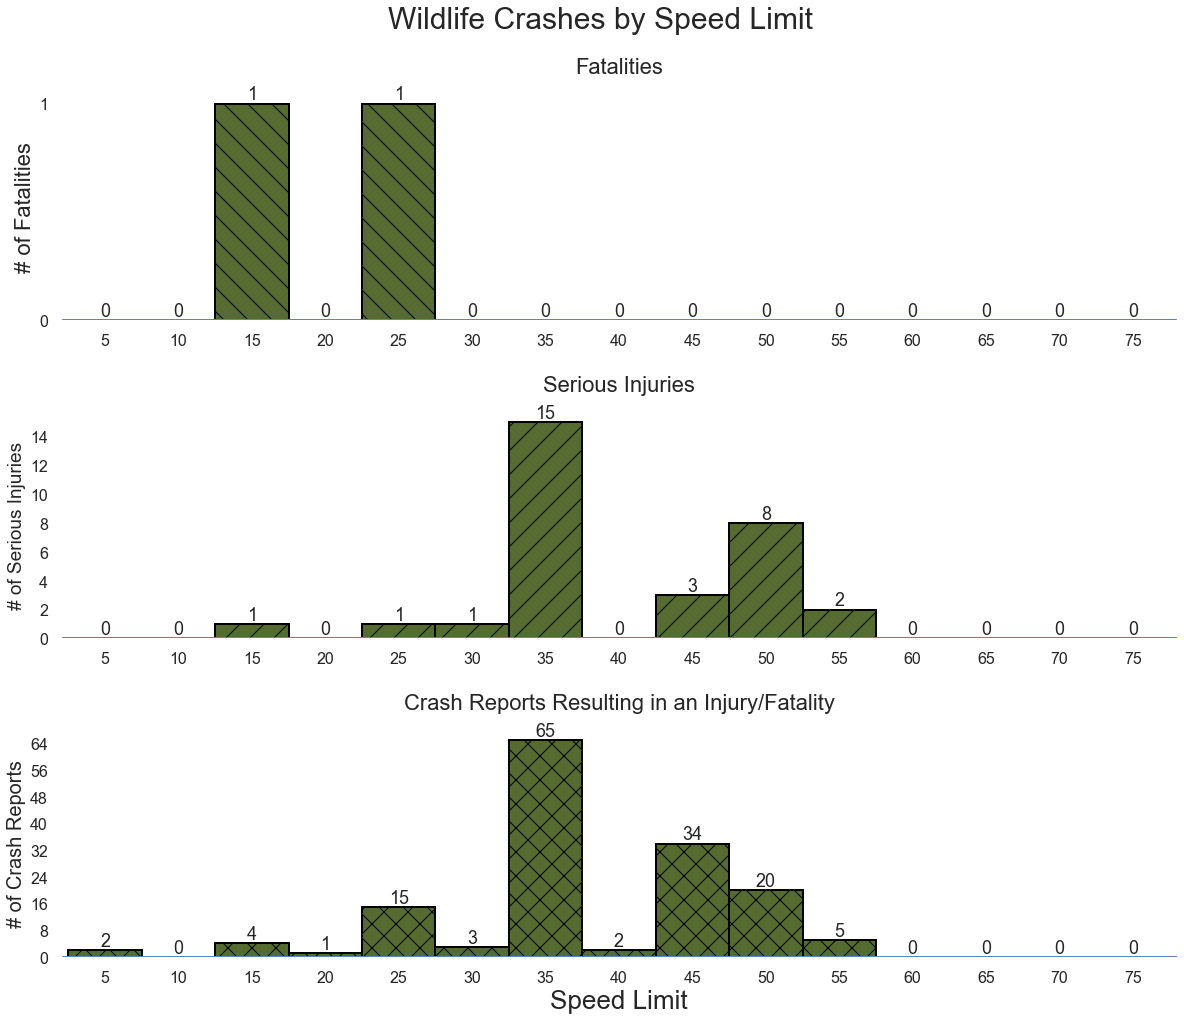

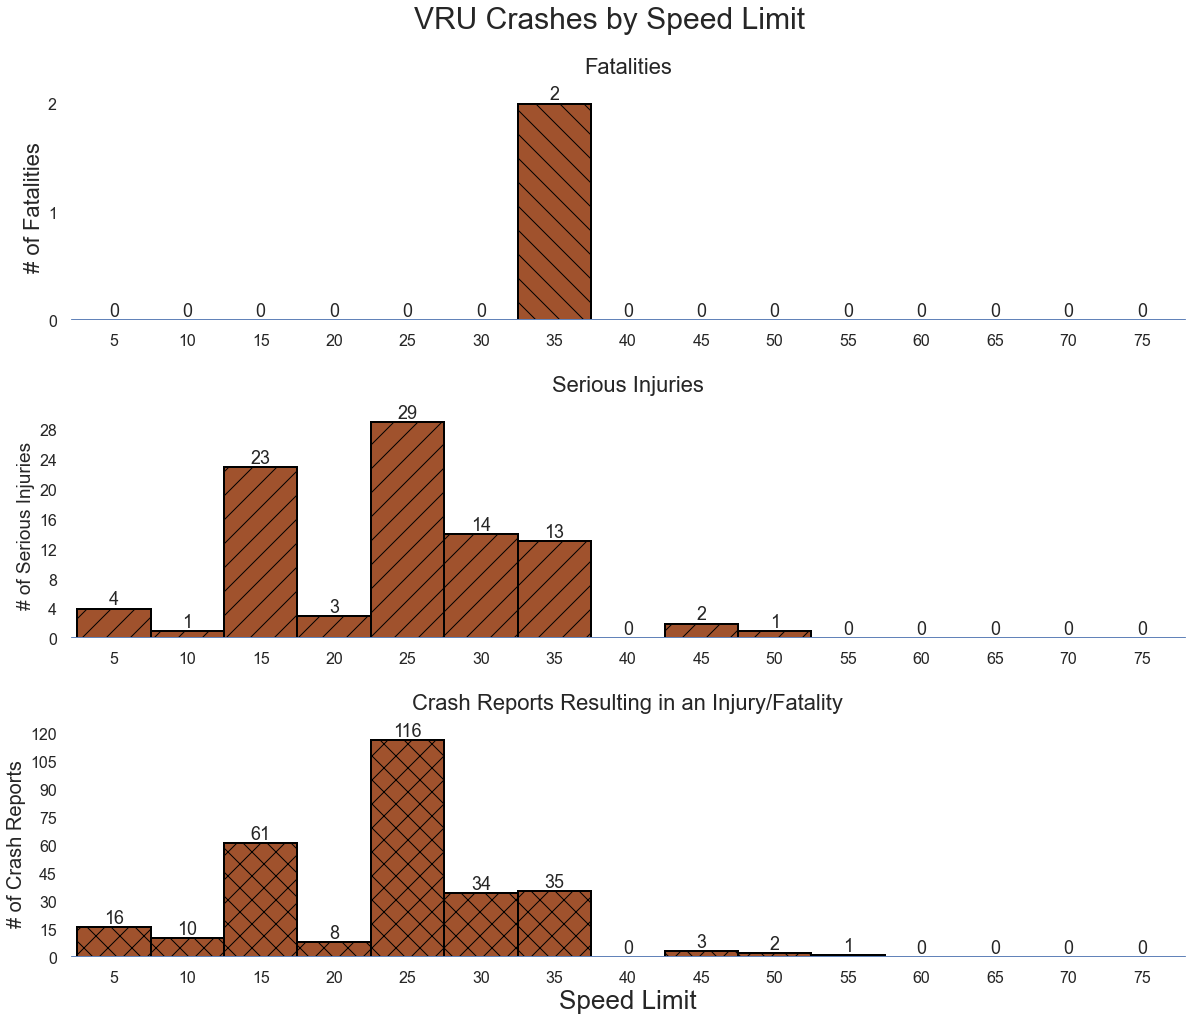

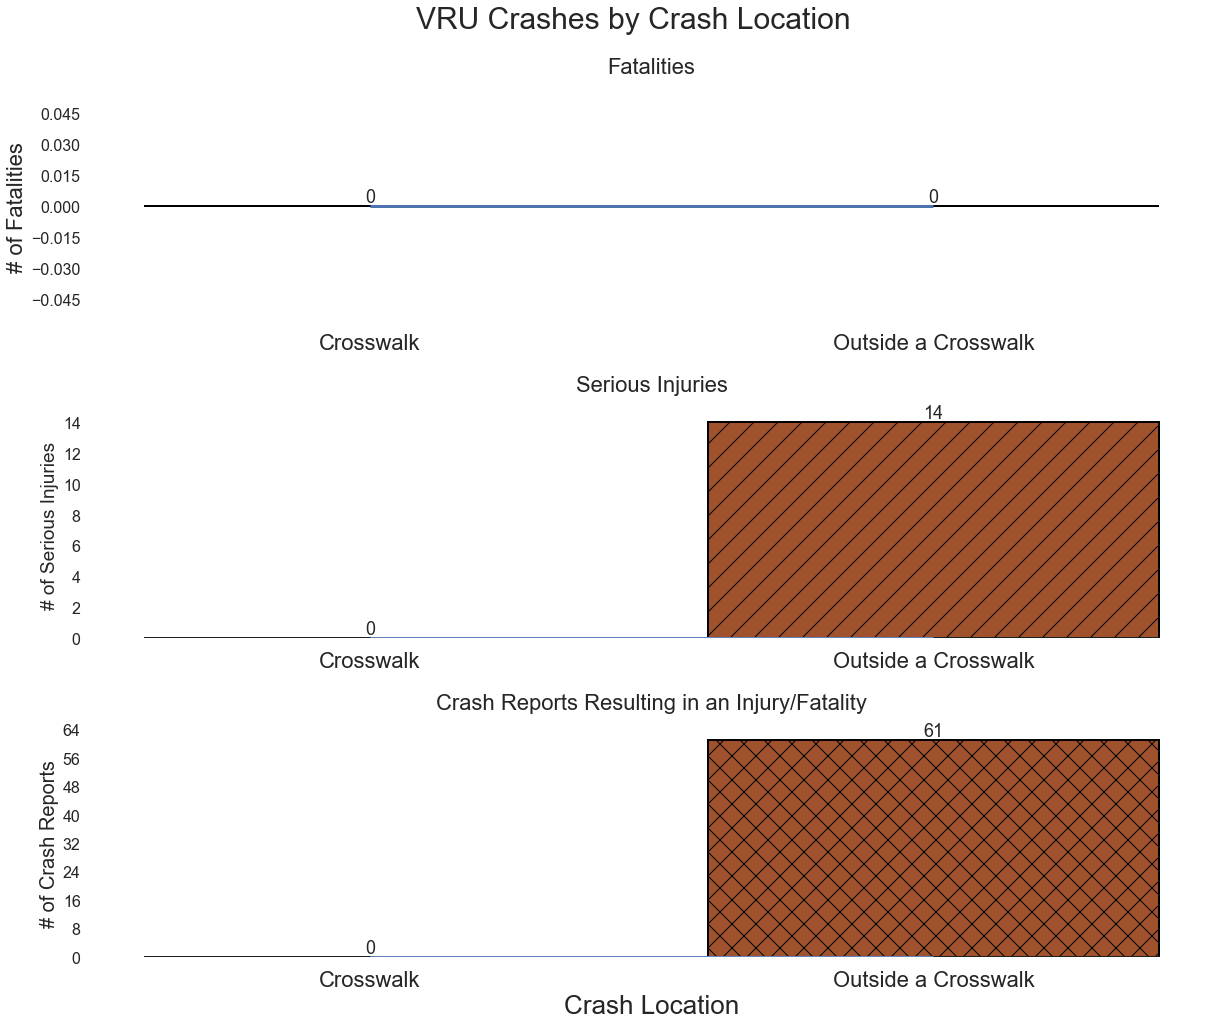

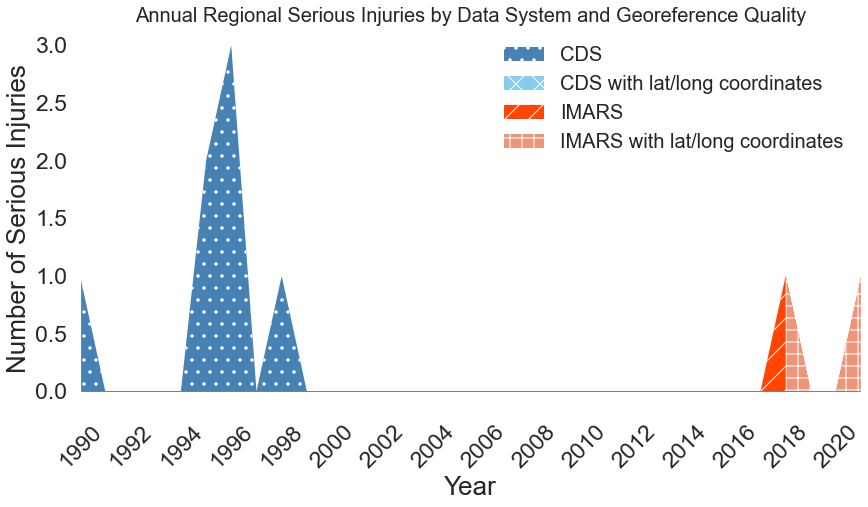

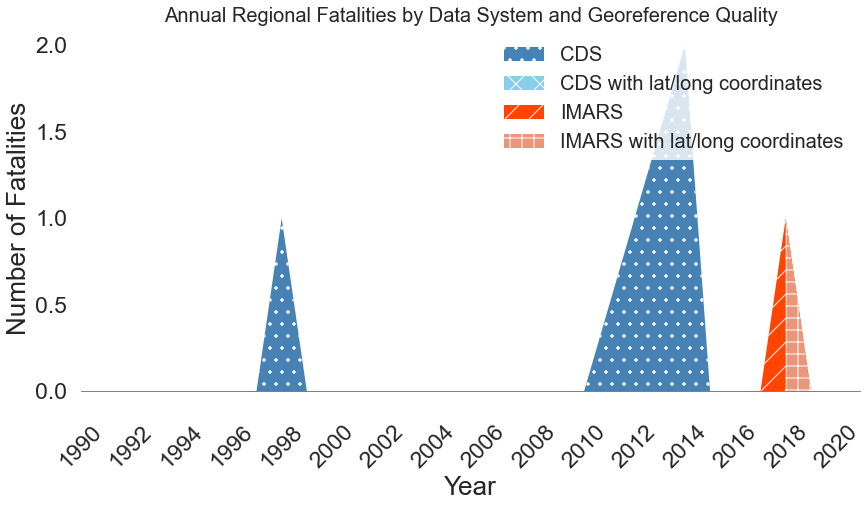

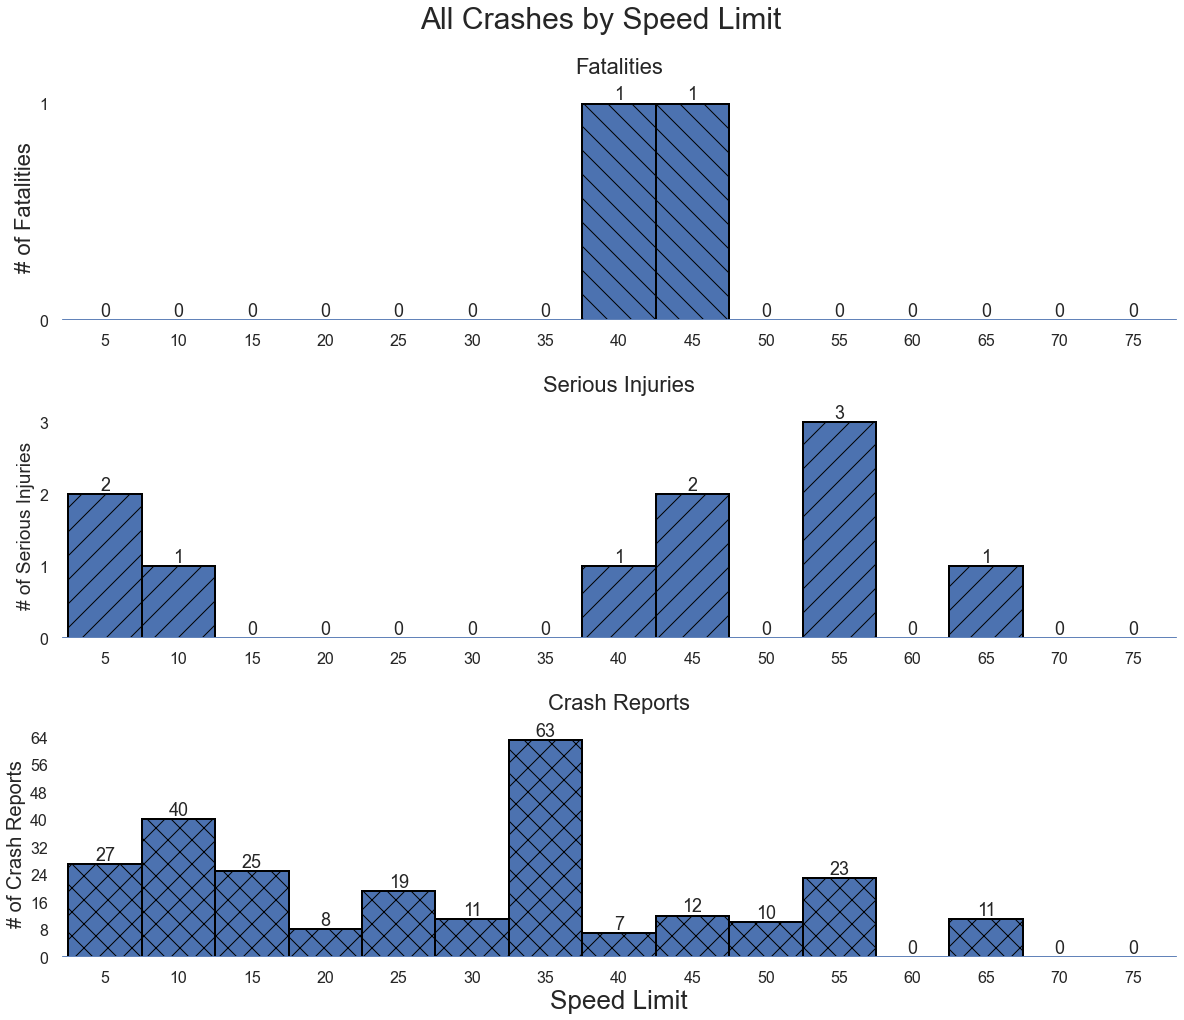

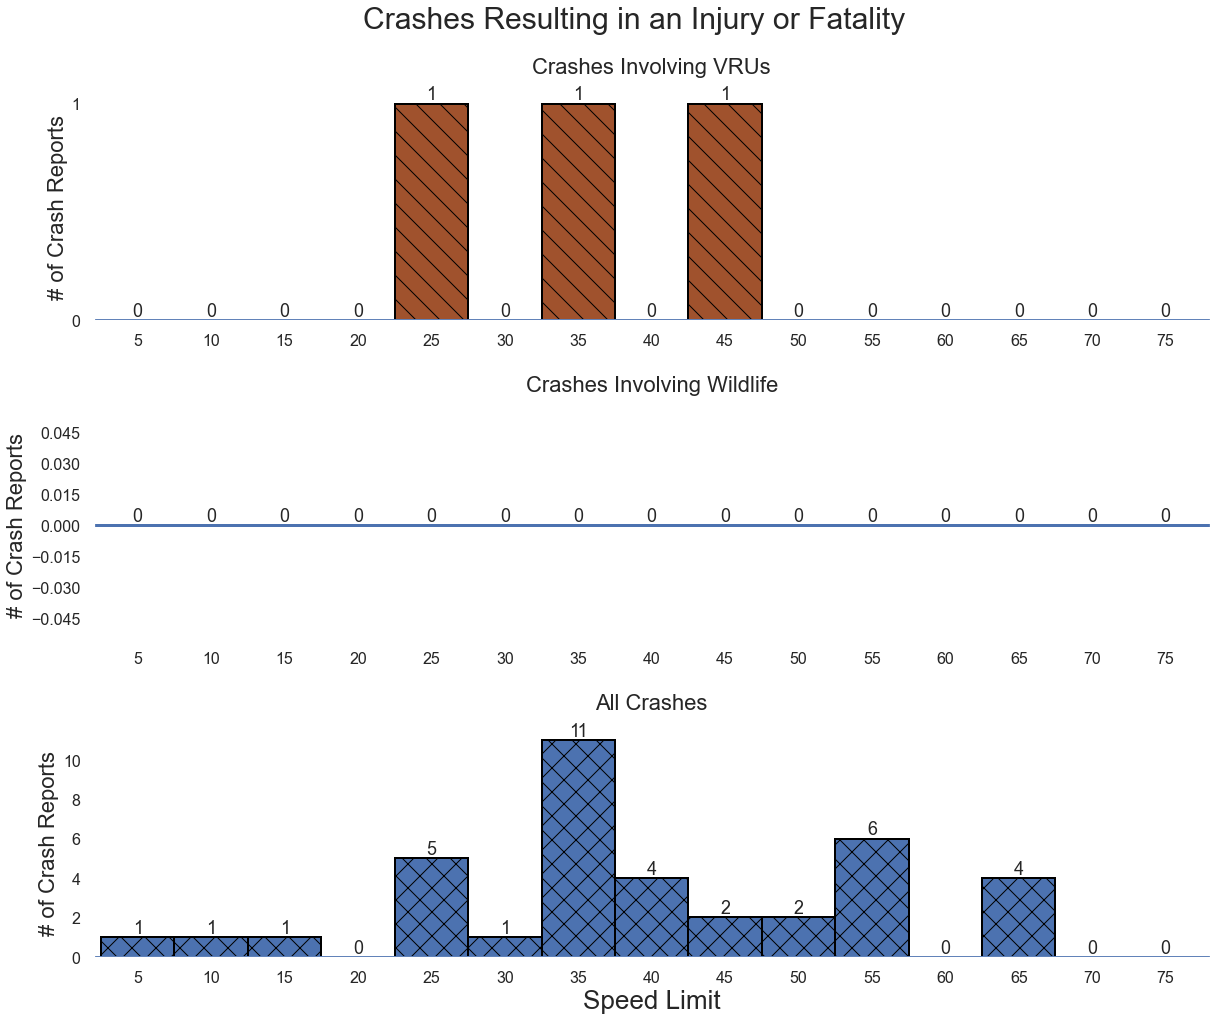

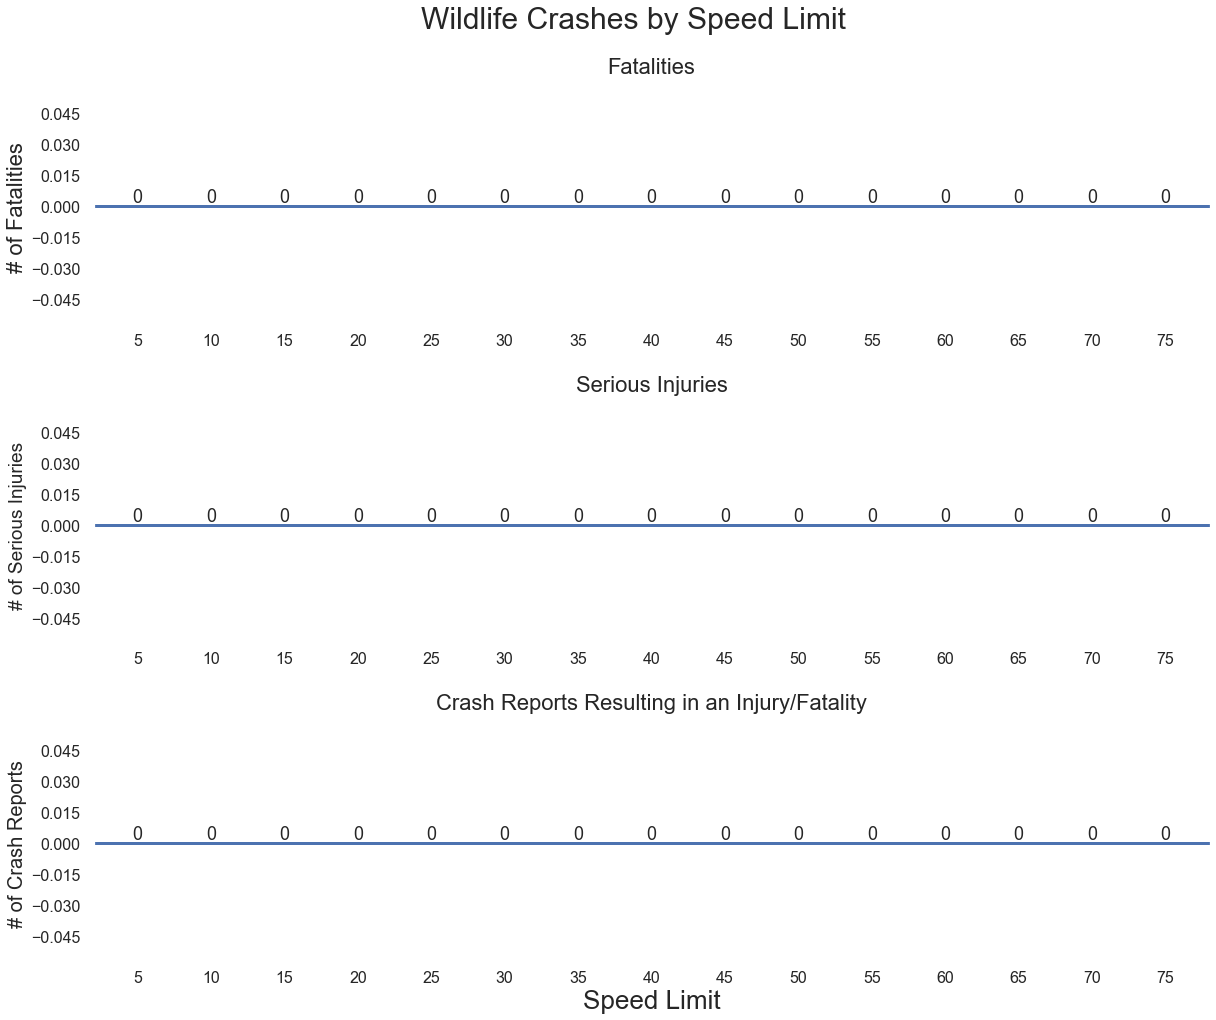

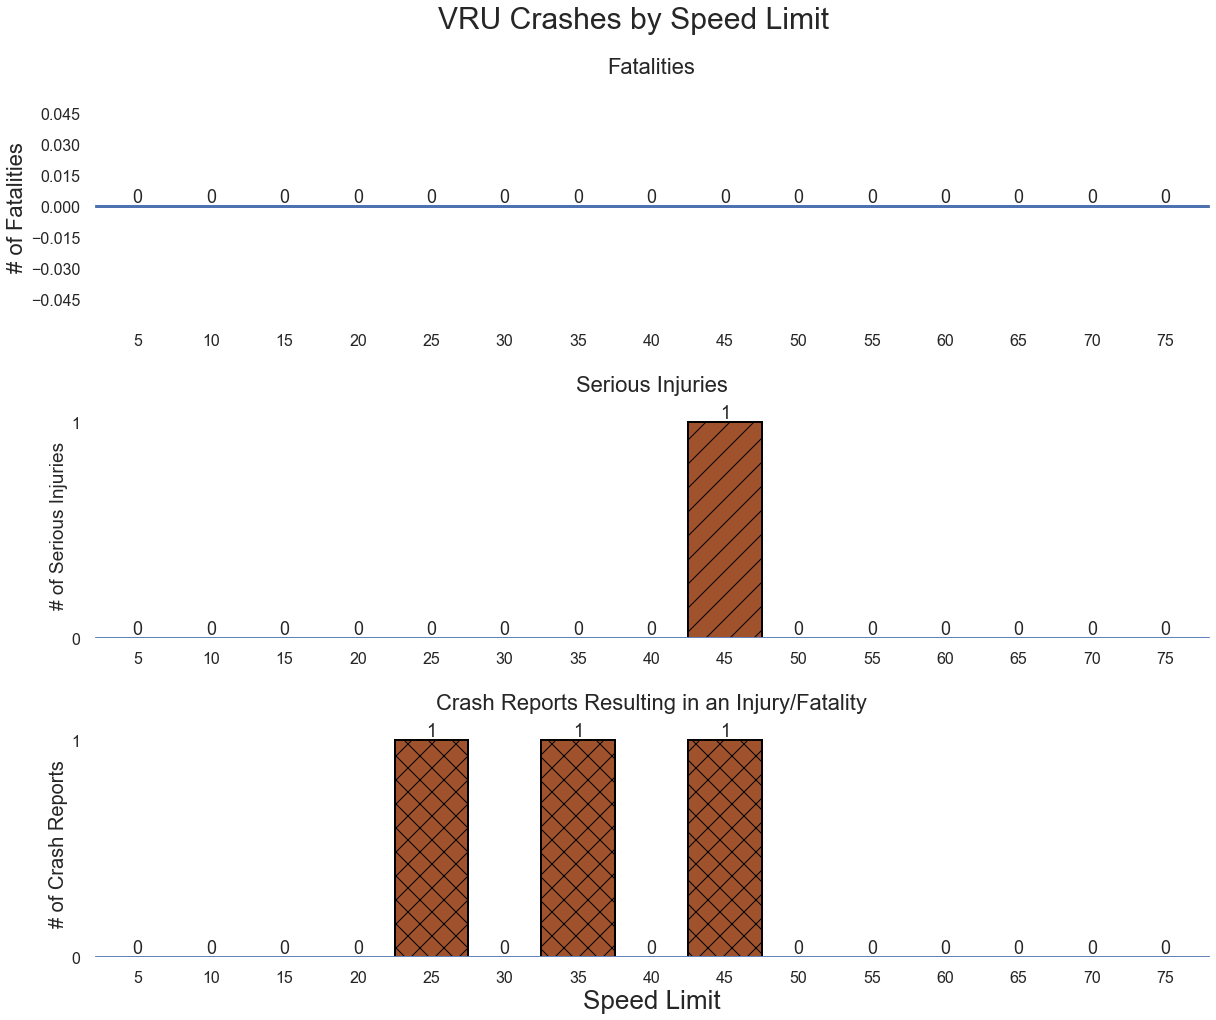

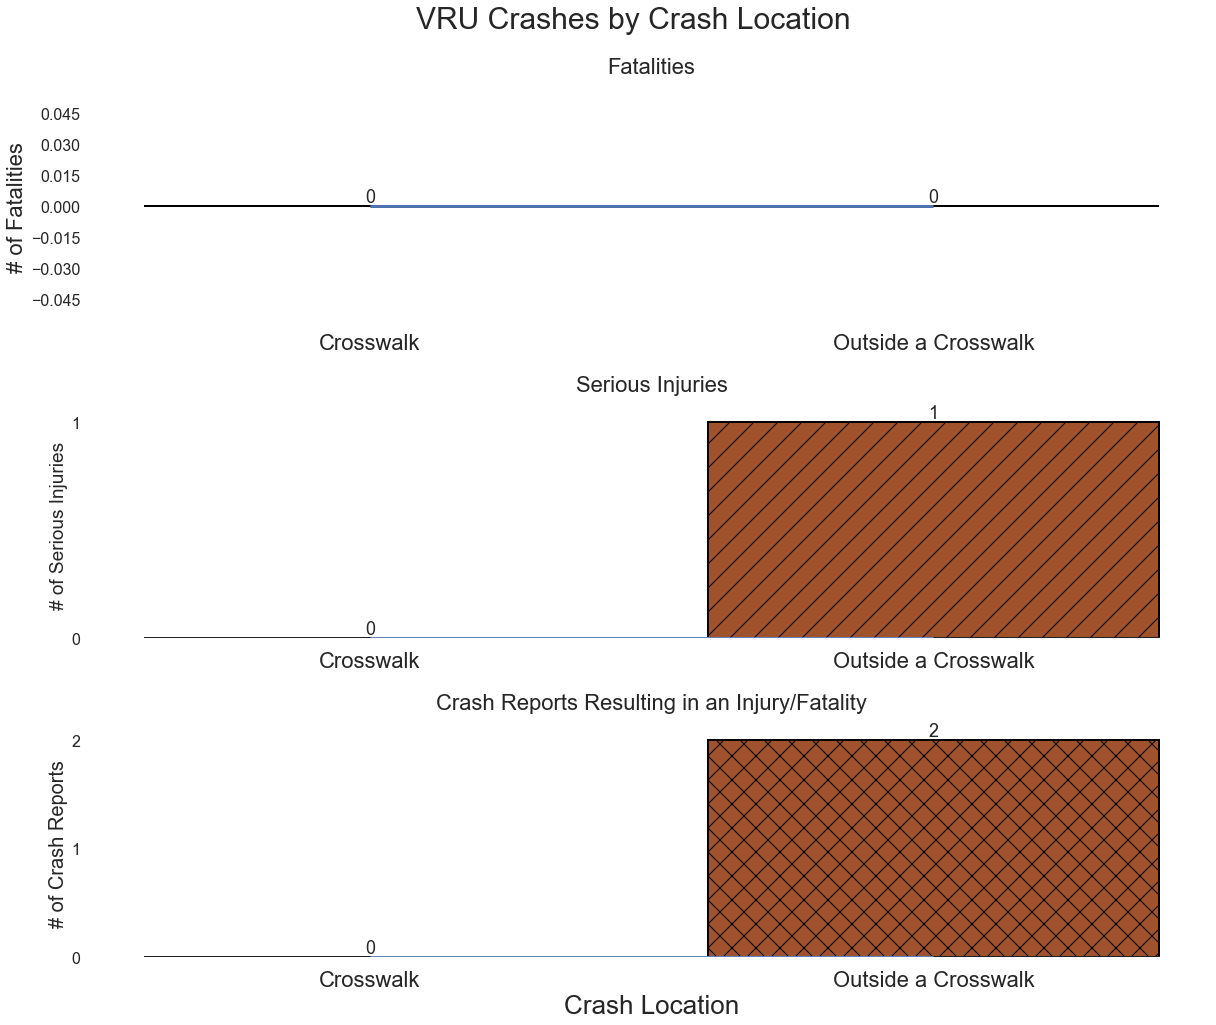

In [131]:
for x in analysis_2022.RGN.unique():
    print(x)
    add_regional_information(x)

In [120]:
for x in analysis_2022.RGN.unique():
    print(x)

SER
NER
MWR
IMR
NCR
PWR
AKR
